<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Qichen(Lead), Paritosh, Rawal, Yan, Zen, Wen-Hsuan

## Submission Instructions:

1. Submit the PDF version of `theory.ipynb` to HW3:PDF. The `theory.ipynb` should include **ALL the writeup answers AND ALL the screenshots of code** specifically required in questions **from Q1 to Q7**. This section will be manually Graded.

2. Submit `q2.ipynb`, `q3.ipynb`, `q5.ipynb` to HW3:Code. Please do not submit other jupyter notebooks as they will not be autograded. Submitting them may cause running time out. (`q5.ipynb` is optional for extra credits)

**The Appendix section at the end of this file would help you on questions P1 and P2.**

## Q1 Theory Questions  (45 points)

### Q1.1 (4 Points WriteUp)
Prove that softmax is invariant to translation, that is 
$$softmax(x) = softmax(x + c) \qquad \forall c \in \mathbb{R}$$
Softmax is defined as below, for each index $i$ in a vector $x$.
$$softmax(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}} $$
Often we use $c = − \max x_i$. Why is that a good idea? (Tip: consider the range of values that numerator will have with $c = 0$ and $c = − \max x_i$)

In order to prove the above, we simply evaluate the function after translation
$$softmax(x_i + c) = \frac{e^{x_i + c}}{\sum_j e^{x_j + c}} = \frac{e^{x_i}e^c}{\sum_j e^{x_j}e^c} = \frac{e^{x_i}e^c}{e^c\sum_j e^{x_j}} = \frac{e^{x_i}}{\sum_j e^{x_j}} = softmax(x_i)$$
With $c = -\max x_i$ we have that $e^{x_i + c} \in [0, 1]$. Wheras, if $c = 0$ then the value of $e^{x_i}$ can be arbitrarily large. If some $e^{x_i}$ are very large and other $e^{x_j}$ are very small, a loss of precision can occur easily occur when computing the denominator.

### Q1.2

Softmax can be written as a three step processes, with $s_i = e^{x_i}$ , $S=\sum_i s_i$ and $softmax(x_i)= \frac{1}{S} s_i$.

#### Q1.2.1 (1 point WriteUp)
As $x \in \mathbb{R}^d$, what are the properties of $softmax(x)$, namely what is the range of each element? What is the sum over all elements?

The range of each $softmax(x_i)$ is $[0,1]$ and the sum of the elements is 1.

#### Q1.2.2 (1 point WriteUp)
One could say that ”softmax takes an arbitrary real valued vector $x$ and turns it into a ___”. Please think about a short phrase to fill in ___.

Probability distribution over a discrete number of outcomes.

#### Q1.2.3 (1 point WriteUp)
Can you see the role of each step in the multi-step process now? Explain them.

The first step $s_i = e^{x_i}$ transforms the vector $x$ so all its elements are non-negative, the second step $S=\sum_i s_i$ computes a normalization value so the sum of all the outputs will be 1, and $softmax(x_i)= \frac{1}{S} s_i$ gives the probability mass for a particular $i$.

### Q1.3 (3 points WriteUp)
Show that multi-layer neural networks without a non-linear activation function are equivalent to linear regression.

The fully connected neural network operation without a non-linearity can by represented y = Wx + b.
Two of these operations in succession can be written $y = W_2(W_1 x + b_1) + b_2$. We observe that this can be rewritten $y = W_2W_1x + W_2b_1 + b_2$ where $W_2W_1$ is just another matrix and $W_2b_1 + b_2$ is a column vector. Therefore the two successive operations can be done in one operation $y = Wx + b$ where $W = W_1W_2, b = W_2b_1 + b_2$. We can continue with induction to show that any number of layers without a non-linearity can just be represented in the form y = Wx + b. For any particular $y_i$ this is the same as linear regression with weights in row $i$ of matrix $W$.

### Q1.4 (4 points WriteUp) 
Given the sigmoid activation function $\sigma(x) = \frac{1}{1+e^{-x}}$ , derive the gradient of the sigmoid function and show that it can be written as a function of $\sigma(x)$ (without having access to $x$ directly)

We first compute the derivative of $\sigma(x)$.
$$ \sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x)\frac{e^{-x}}{1 + e^{-x}} = \sigma(x)\frac{e^{-x}}{e^{-x}(e^x + 1)} = \sigma(x)\frac{1}{(e^x + 1)} = \sigma(x)\sigma(-x)$$

### Q1.5 (12 points WriteUp)

Given $y = W x + b$ (or $y_j = \sum_{i=1}^d  x_{i} W_{ji} + b_j$), and the gradient of some loss $J$ with respect $y$, show how to get $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial x}$ and $\frac{\partial J}{\partial b}$. Be sure to do the derivatives with scalars and re-form the matrix form afterwards. Here are some notional suggestions.
$$ \frac{\partial J}{\partial y} = \delta \in \mathbb{R}^{k \times 1} \quad W \in \mathbb{R}^{k \times d} \quad x \in \mathbb{R}^{d \times 1} \quad b \in \mathbb{R}^{k \times 1}$$
    

We know from the chain rule $\frac{\partial J}{\partial W} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial W}$. We know $y_j = \sum_{i=1}^d  x_{i} W_{ji} + b_j$, allowing us to compute $\frac{\partial y_j}{\partial W_{ik}}$; this will be $x_k$ if $i = j$ and 0 otherwise. This means that $\frac{\partial y_j}{\partial W}$ is a matrix that is all 0 except for column $j$ which is equal to $x$ (dimensions $d \times k$). Then we can compose $\frac{\partial y}{\partial W}$ by appending $\frac{\partial y_j}{\partial W}$ for all $j$ along an additional dimension. This will be a $k \times d \times k$ tensor. Without knowing $J$ specifically, we cannot derive $\frac{\partial J}{\partial y}$ so we will just use $\frac{\partial J}{\partial y} = \delta^T$ (this is the derivative, not the gradient). Therefore we have $\frac{\partial J}{\partial W} = \delta^T \frac{\partial y}{\partial W}$ where $\frac{\partial y}{\partial W}$ is as found before. This is the derivative of $J$ with respect to $W$, the gradient is simply the transpose so $\frac{\partial y}{\partial W}^T \delta$


Again with the chain rule we have $\frac{\partial J}{\partial x} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial x}$. Let us look at $y_j = \sum_{i=1}^d  x_{i} W_{ji} + b_j$ but now take the derivative with respect to $x$. We can see that this derivative is the vector $W_j$. From there we can assemble $\frac{\partial y}{\partial x}$ by stacking $\frac{\partial y_j}{\partial x} = W_j$ which gives us the original matrix $W$. Then we have $\frac{\partial J}{\partial x} = \frac{\partial J}{\partial y}W = \delta^T W$. Again, the gradient is the transpose so $W^T \delta$


Finally we use the chain rule to get $\frac{\partial J}{\partial b} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial b}$. Then for every $\frac{\partial y_j}{\partial b_i}$ we can see that it is equal to $1$ if $i = j$, otherwise 0. Then to get $\frac{\partial y_j}{\partial b}$ we compose $\frac{\partial y_j}{\partial b_i}$ into a vector of length $k$. Then all these $\frac{\partial y_j}{\partial b}$ are stacked into a matrix of size $k \times k$ to get $\frac{\partial y}{\partial b}$. We can see that this matrix is diagonal, in fact $I_{k \times k}$. This gives us $\frac{\partial J}{\partial b} = \frac{\partial J}{\partial y}I_{k \times k} =\delta^T I_{k \times k} = \delta^T$. Again, the gradient is the transpose of the derivative so $\delta$

### Q1.6 (15 points WriteUp)

We will find the derivatives for Conv layers now. Since most Deep Learning frameworks such as Pytorch, Tensorflow use cross-correlation in their respective "convolution" functions ([Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d) and [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/nn/convolution)), we will continue this abuse of notation. So the operation performed with the Conv Layer weights will be cross-correlation.
    
The input, $x$ is of shape $M\times N$ with C channels. This will be *convolved* (actually cross-correlation) with $D$ number of $K\times K$ filters, each with a bias term. The stride is 1 and there will be no padding. We know the gradient of some loss $J$ with respect to the output $y$, which will have $D$ channels. Show how to get $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial x}$ and $\frac{\partial J}{\partial b}$.

The dimensions and notation are as follows:
$$
    \frac{\partial J}{\partial y} = \delta \in \mathbb{R}^{D\times M_o \times N_o}
    \quad
    M_o = M-K+1
    \quad
    N_o = N-K+1
$$
$$
    x \in \mathbb{R}^{C\times M \times N}
    \quad
    W \in \mathbb{R}^{D\times C \times K \times K}
    \quad
    b \in \mathbb{R}^{D}
$$

$x_{c, i, j}:$ The element at the $i^{th}$ row, the $j^{th}$ column and the $c^{th}$ channel of the input

$y_{c, i, j}:$ The element at the $i^{th}$ row, the $j^{th}$ column and the $c^{th}$ channel of the output

$W_{d, c, i, j}:$ The element at the $i^{th}$ row, the $j^{th}$ column, the $c^{th}$ channel of the kernel of the $d^{th}$ filter

*For this question, you may compute the derivatives with scalars only. You don't need to re-form the matrix*
    

We know from the chain rule that $\frac{\partial J}{\partial W} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial W}$. We first seek to compute $\frac{\partial y}{\partial W_{d, c, i, j}}$. We can write $y_{d, i, j} = b_d + \sum_{c=1}^C \sum_{i'=1}^{K} \sum_{j'=1}^{K} x_{c, i + i' - 1, j + j' - 1} W_{d, c, i', j'}$. From here we can see that $\frac{\partial y_{d, i, j}}{\partial W_{d, c, n, m}}$ is equal to $x_{c, i + n - 1, j + m - 1}$.

From the chain rule we have that $\frac{\partial J}{\partial x} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial x}$. Again we look to our expression $y = b_d + \sum_{c=1}^C \sum_{i'=1}^{K} \sum_{j'=1}^{K} x_{c, i + i' - 1, j + j' - 1} W_{d, c, i', j'}$. We see that $\frac{\partial y_{d, i, j}}{\partial x_{c, n, m}}$ is equal to $W_{d, c, n - i + 1, m - j + 1}$ if the indices $n - i + 1, m - j + 1 \in [1, K]$ otherwise the value is 0.

Once more from the chain rule we have $\frac{\partial J}{\partial b} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial b}$. Again we look to our expression $y = b_d + \sum_{c=1}^C \sum_{i'=1}^{K} \sum_{j'=1}^{K} x_{c, i + i' - 1, j + j' - 1} W_{d, c, i', j'}$. We see that $\frac{\partial y_{d, i, j}}{\partial b_{d'}}$ is equal to $1$ if $d=d'$ else it is equal to 0.

### Q1.7

When the neural network applies the elementwise activation function (such as sigmoid), the gradient of the activation function scales the back-propagation update. This is directly from the chain rule, $\frac{d}{d x} f(g(x)) = f'(g(x)) g'(x)$.

#### Q1.7.1 (1 point WriteUp)
Consider the sigmoid activation function for deep neural networks. Why might it lead to a "vanishing gradient" problem if it is used for many layers (consider plotting the $\sigma'(x)$ in Q1.4)?

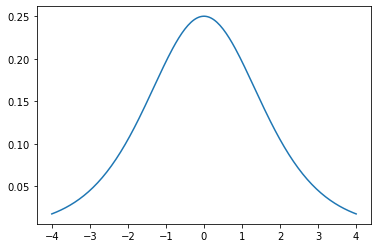

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(x))

x = np.linspace(-4, 4, num=200)
plt.plot(x, sigmoid(x) * sigmoid(-1 * x))
plt.show()

After graphing the derivative of the sigmoid function, we see that its values are capped at 0.25, and in fact is far less than 0.25 for most of its domain. The deeper the network, the more sigmoid derivatives are multiplied in the chain rule computation, which can result in gradients that become extremely small. This is the vanishing gradient problem, because $x^n, x \in [0, 0.25]$ diminishes exponentially with $n$.

#### Q1.7.2 (1 point WriteUp)
Often it is replaced with $\tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$. What are the output ranges of both $\tanh$ and sigmoid? Why might we prefer $\tanh$ ? 

The output range of the $\tanh$ function is -1 to 1. This is double the range of the sigmoid function with is from 0 to 1. We might prefer the $\tanh$ function because of the following question.

#### Q1.7.3 (1 point WriteUp)
Why does $\tanh(x)$ have less of a vanishing gradient problem? (plotting the derivatives helps! for reference: $\tanh'(x) = 1 - \tanh(x)^2$)

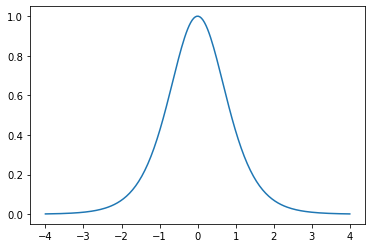

In [3]:
x = np.linspace(-4, 4, num=200)
plt.plot(x, 1 - np.tanh(x)**2)
plt.show()

The effect of this is in the magnitude of its derivative which has a range of 0 to 1 for the $\tanh$ function and only 0 to 0.25 for the sigmoid function. Therefore the gradient vanishes at a slower rate with the use of the tanh function compared to the sigmoid function.

#### Q1.7.4 (1 point WriteUp)
$\tanh$ is a scaled and shifted version of the sigmoid. Show how $\tanh(x)$ can be written in terms of $\sigma(x)$. (*Hint: consider how to make it have the same range*)

$\frac{\tanh(\frac{x}{2}) + 1}{2} = \frac{1}{2}(\frac{1-e^{-2\frac{x}{2}}}{1+e^{-2\frac{x}{2}}} + \frac{1+e^{-2\frac{x}{2}}}{1+e^{-2\frac{x}{2}}}) = \frac{1}{2}(\frac{2}{1+e^{-x}}) = \frac{1}{1+e^{-x}} = sigmoid(x)$

***
## For the following questions, please find the instructions in the corresponding jupyter notebooks.

## Q2 Implement a Fully Connected Network (65 points + 10 Extra Credit)

#### Q2.1.1 (3 points WriteUp)

Depending on the final activation function it could be 0.5 if sigmoid or $\frac{1}{n}$ for all categories if softmax. If there is no final activation function it would just be all 0s. It might not be a good idea to start with this initialization, because for each layer, the gradients for the weights will all be the same. There will be no differentiation among the neurons in the hidden layers and the features they extract.

#### Q2.1.3 (2 points WriteUp)

We initialize with random numbers to get variation in the features extracted by different neurons at initialization. By having the variance depend on the input and output dimensions of the layer, the variance does not decrease in deeper layers of the network (as it does with standard initialization) and therefore the gradients do not vanish deeper in the network.

## Q3 Training Models (20 Points)

### Q3.2 (3 points Code+WriteUp)

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from ipynb.fs.defs.q2 import *

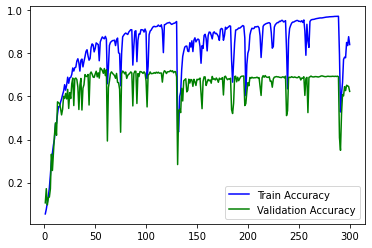

<Figure size 432x288 with 0 Axes>

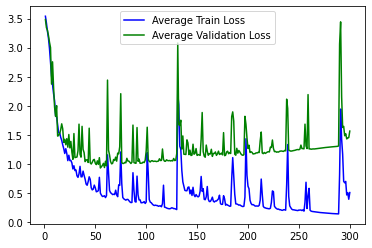

Validation accuracy:  0.6236111111111111
Max validation accuracy:  0.7325
Max validation accuracy index:  54


<Figure size 432x288 with 0 Axes>

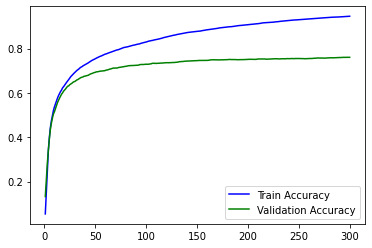

<Figure size 432x288 with 0 Axes>

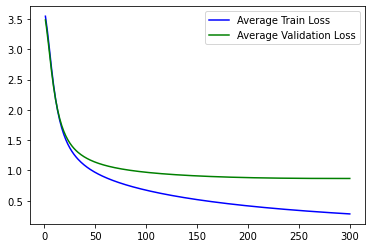

Validation accuracy:  0.7602777777777778
Max validation accuracy:  0.7605555555555555
Max validation accuracy index:  298


<Figure size 432x288 with 0 Axes>

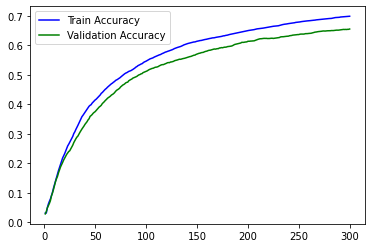

<Figure size 432x288 with 0 Axes>

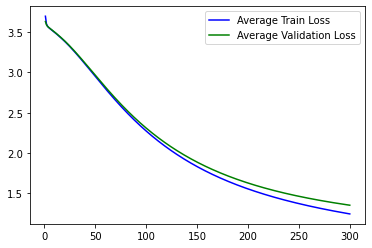

Validation accuracy:  0.6552777777777777
Max validation accuracy:  0.6552777777777777
Max validation accuracy index:  299


{'Wlayer1': array([[-0.08428681,  0.02730588,  0.00485717, ...,  0.01013406,
          0.04354187,  0.05082295],
        [-0.06343903,  0.06070551,  0.02454353, ...,  0.00692893,
         -0.05386878, -0.02873664],
        [-0.01548972, -0.01294396,  0.01284152, ..., -0.08090535,
          0.00275365,  0.00716834],
        ...,
        [-0.04354236, -0.02560319, -0.0122987 , ..., -0.01468987,
         -0.04874088, -0.02678992],
        [-0.09276447, -0.0016649 , -0.06124223, ..., -0.00520028,
         -0.05193506, -0.0094787 ],
        [-0.06629132,  0.0018686 ,  0.04085217, ..., -0.00461992,
         -0.03345002, -0.05212801]]),
 'blayer1': array([-0.03225441,  0.00257486, -0.02727363, -0.00685361,  0.00850728,
        -0.02154977,  0.00391797, -0.01169719, -0.02446704, -0.01102661,
         0.00724271, -0.00241398, -0.00093434,  0.0066108 ,  0.00093969,
        -0.02590728, -0.01566161,  0.00656384,  0.02641912,  0.00767196,
         0.01684069, -0.00561469, -0.01001168, -0.00974961,

<Figure size 432x288 with 0 Axes>

In [4]:
# Please put your code for Q3.2 here
# YOUR CODE HERE
def train_and_plot(learning_rate):
    train_data = scipy.io.loadmat('data/nist36_train.mat')
    valid_data = scipy.io.loadmat('data/nist36_valid.mat')

    train_x, train_y = train_data['train_data'], train_data['train_labels']
    valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

    max_iters = 300
    # pick a batch size, learning rate
    batch_size = 256
    # YOUR CODE HERE
    input_dim = 1024
    output_dim = 36
    hidden_size = 64

    batches = get_random_batches(train_x,train_y,batch_size)
    batch_num = len(batches)

    params = {}

    # initialize layers (named "layer1" and "output") here
    # YOUR CODE HERE
    initialize_weights(input_dim,hidden_size,params,'layer1')
    initialize_weights(hidden_size,output_dim,params,'output')
    
    train_loss = []
    train_acc = []
    valid_loss = []
    valid_acc = []

    # with default settings, you should get loss < 150 and accuracy > 80%
    for itr in range(max_iters):
        total_loss = 0
        total_acc = 0
        for xb,yb in batches:
        
            # training loop can be exactly the same as q2!
            # YOUR CODE HERE
        
            # forward
            # YOUR CODE HERE
            z1 = forward(xb, params, "layer1", activation=sigmoid)
            z2 = forward(z1, params, "output", activation=softmax)
            
            # loss
            # be sure to add loss and accuracy to epoch totals
            # YOUR CODE HERE
            loss, acc = compute_loss_and_acc(yb, z2)
            total_loss += loss
            total_acc += acc
            
            # backward
            # YOUR CODE HERE
            grad = z2
            grad[np.arange(z2.shape[0]), np.argmax(yb, axis=1)] -= 1
            z1_grad = backwards(grad, params, "output", activation_deriv=linear_deriv)
            backwards(z1_grad, params, "layer1", activation_deriv=sigmoid_deriv)

            # apply gradient
            # YOUR CODE HERE
            for layer in ["output", "layer1"]:
                params['W' + layer] -= learning_rate * params["grad_W" + layer]
                params['b' + layer] -= learning_rate * params["grad_b" + layer]
            
        acc = total_acc / len(batches)
        train_loss.append(total_loss / (batch_size * len(batches)))
        train_acc.append(acc)
    
        z1 = forward(valid_x, params, "layer1", activation=sigmoid)
        z2 = forward(z1, params, "output", activation=softmax)
        loss, acc = compute_loss_and_acc(valid_y, z2)
        valid_loss.append(loss / valid_y.shape[0])
        valid_acc.append(acc)

    # run on validation set and report accuracy! should be above 75%
    # YOUR CODE HERE
    epochs = [i + 1 for i in range(max_iters)]
    plt.figure()
    plt.plot(epochs, train_acc, label="Train Accuracy", c='b')
    plt.plot(epochs, valid_acc, label="Validation Accuracy", c='g')
    plt.legend()
    plt.show()
    plt.savefig("figures/3.1accuracylr{}.png".format(learning_rate))
    plt.clf()
    plt.figure()
    plt.plot(epochs, train_loss, label="Average Train Loss", c='b')
    plt.plot(epochs, valid_loss, label="Average Validation Loss", c='g')
    plt.legend()
    plt.show()
    plt.savefig("figures/3.1losslr{}.png".format(learning_rate))

    print('Validation accuracy: ', valid_acc[-1])
    print('Max validation accuracy: ', np.max(valid_acc))
    print('Max validation accuracy index: ', np.argmax(valid_acc))
    
    return params

train_and_plot(0.005)
train_and_plot(0.0005)
train_and_plot(0.00005)

The network trained with 10 times larger than the best learning rate I found had performance that fluctuated a lot throughout training. In addition, thhe network reached its best validation accuracy at about 1/6 through the process, around 50 epochs, much sooner than the lower learning rate networks.

The network trained with the best learning rate achieved a final validation accuracy of 76.0277%. It had a very smooth decrease in loss on both the training and validation sets and a very smooth increase in the accuracy on both sets.

The network trained with 10 times smaller than the best learning rate I found also displayed smooth accuracy and loss curves. However, the loss decreased far slower and the accuracy increased far slower as well. After the total 300 epochs, the accuracy it achieved was only 65.5277%

### Q3.3 (2 points Code+WriteUp)

/home/thomaswei/miniconda3/envs/vision/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


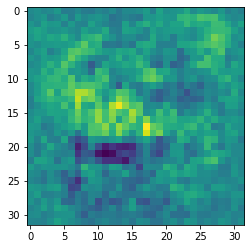

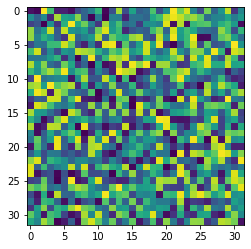

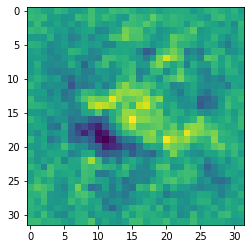

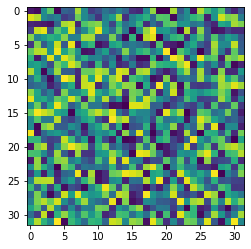

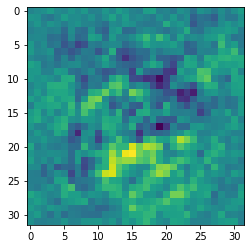

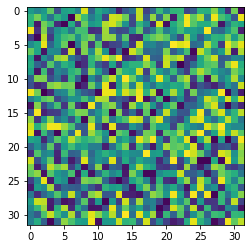

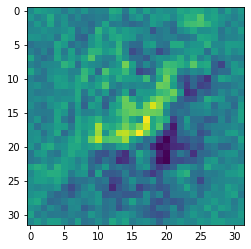

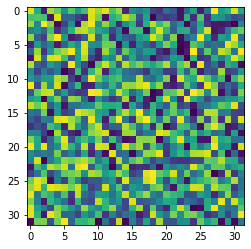

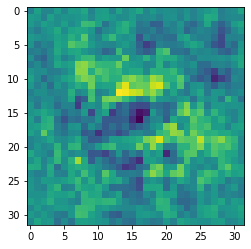

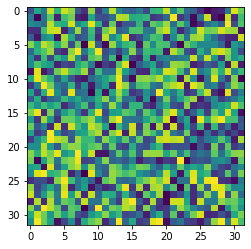

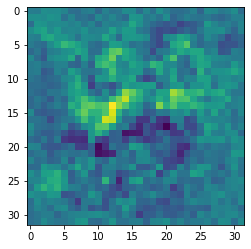

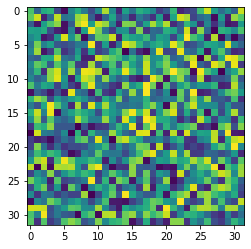

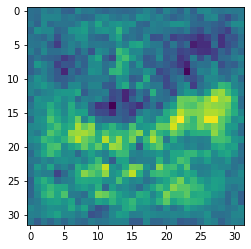

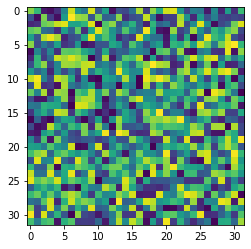

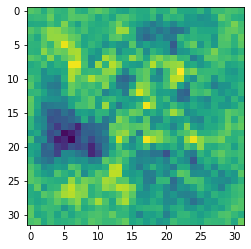

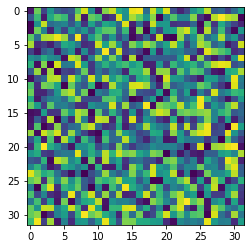

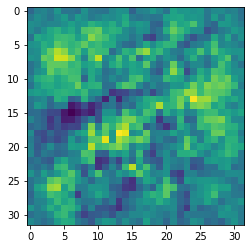

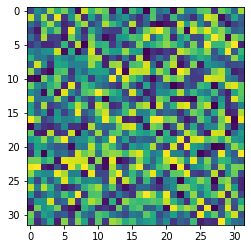

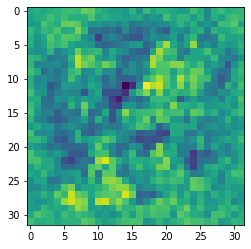

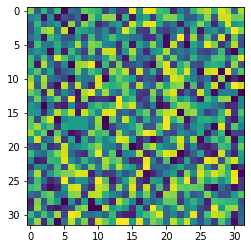

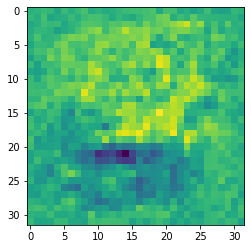

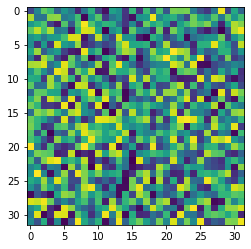

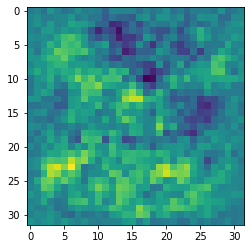

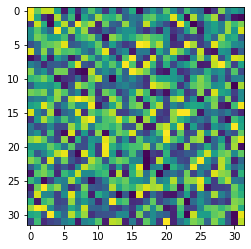

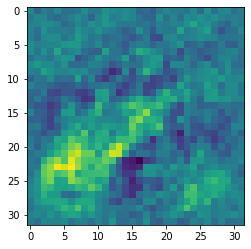

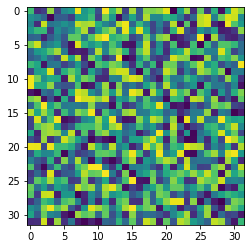

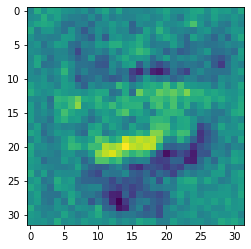

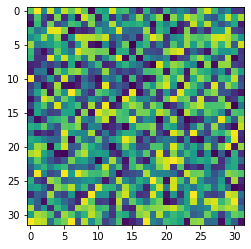

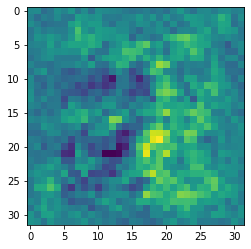

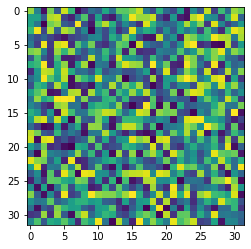

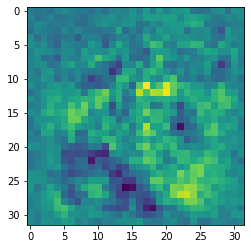

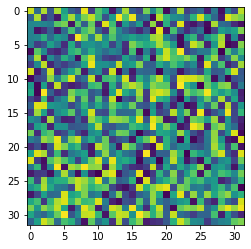

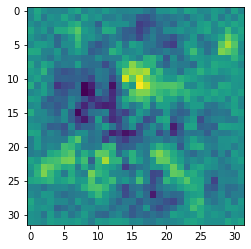

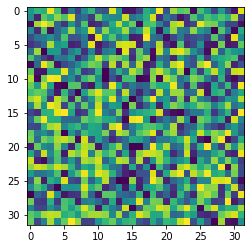

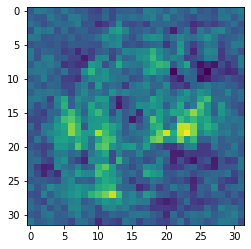

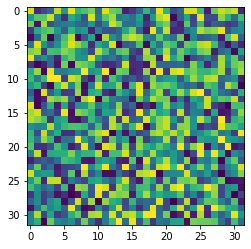

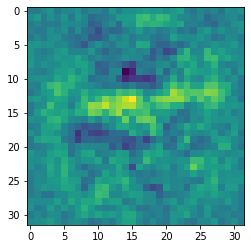

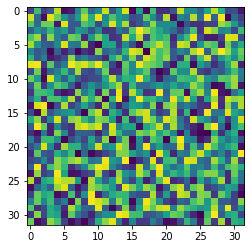

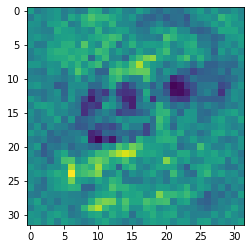

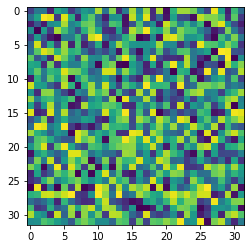

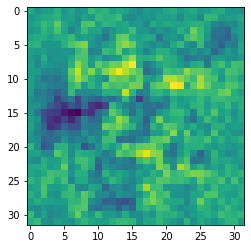

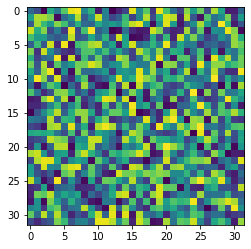

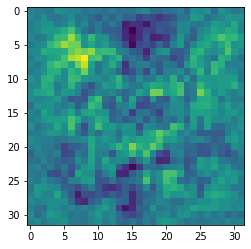

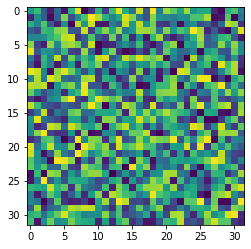

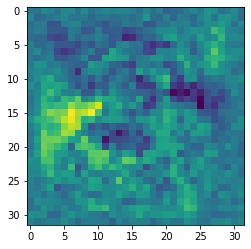

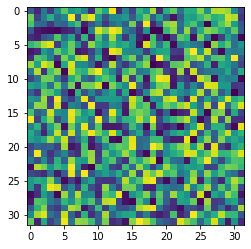

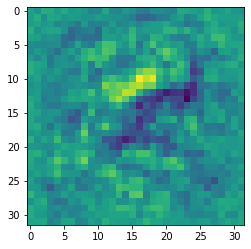

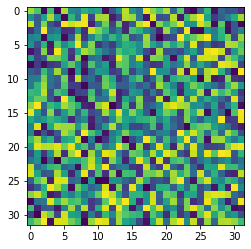

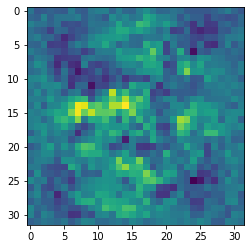

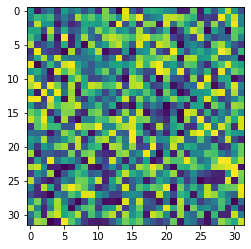

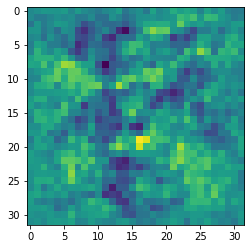

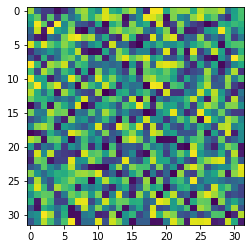

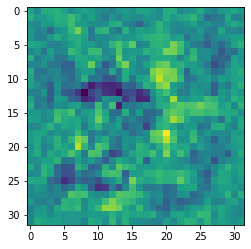

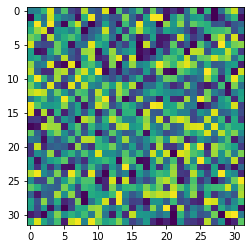

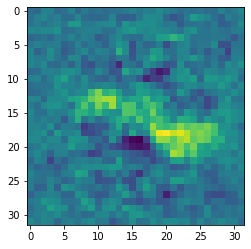

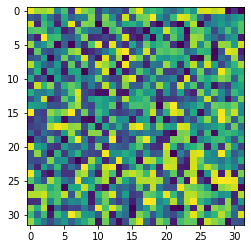

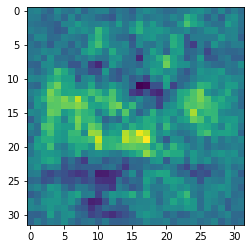

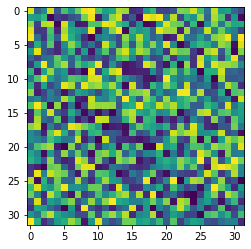

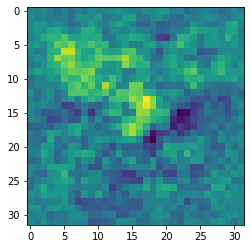

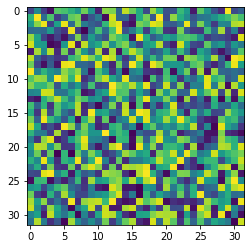

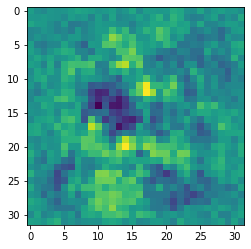

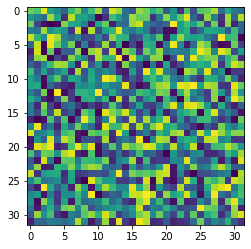

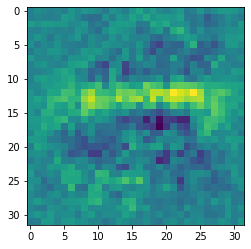

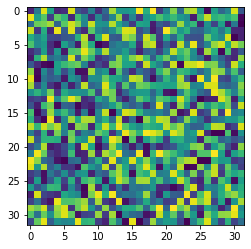

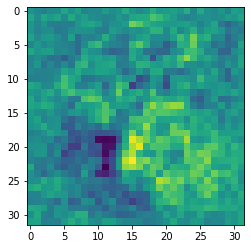

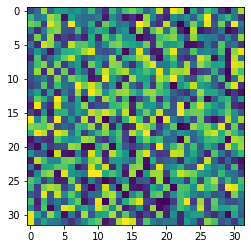

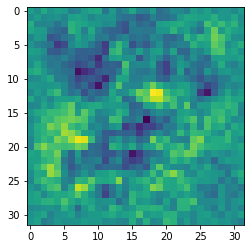

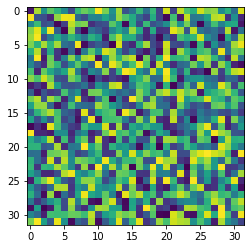

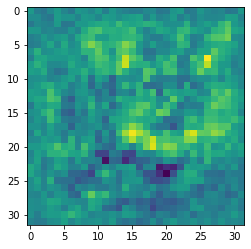

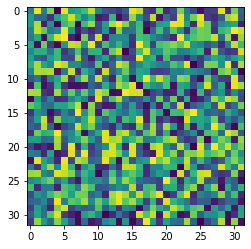

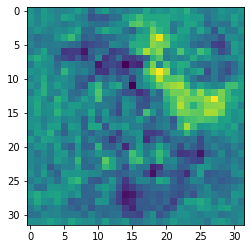

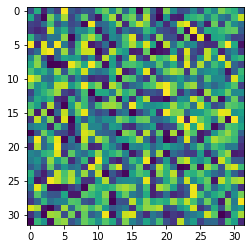

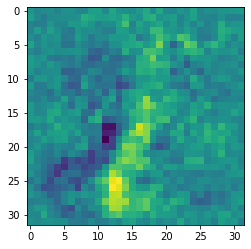

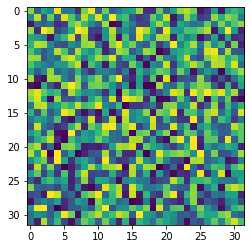

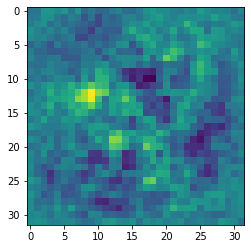

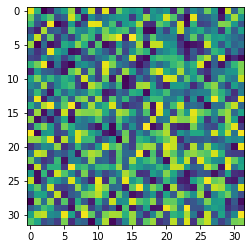

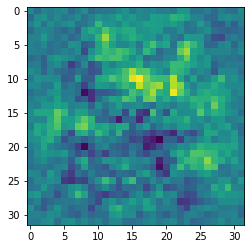

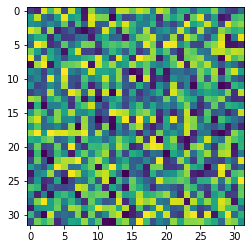

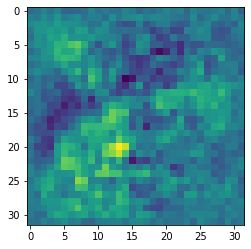

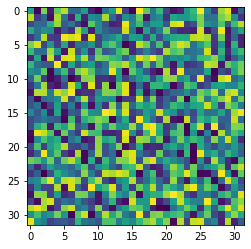

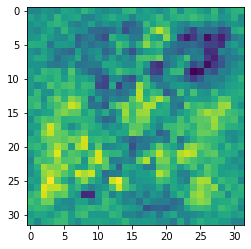

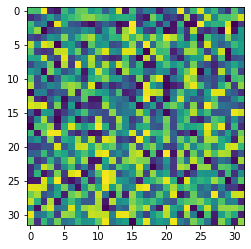

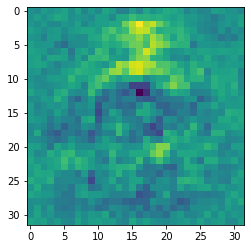

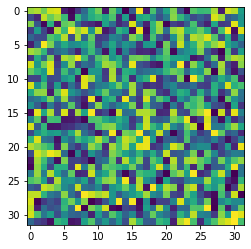

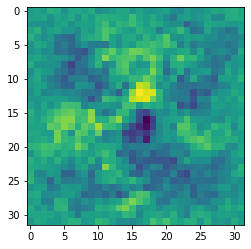

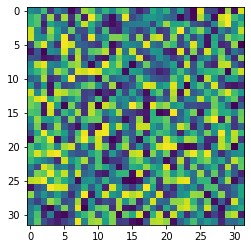

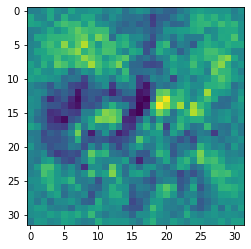

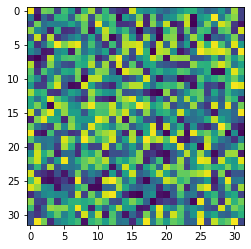

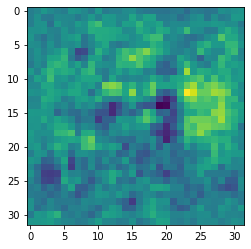

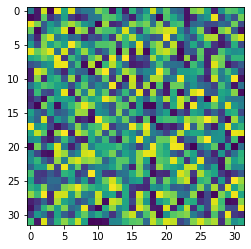

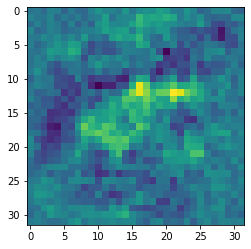

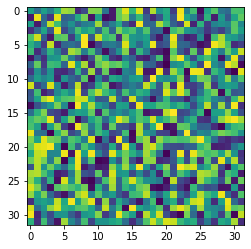

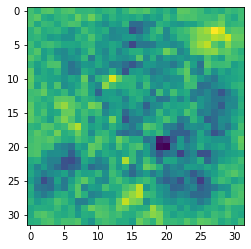

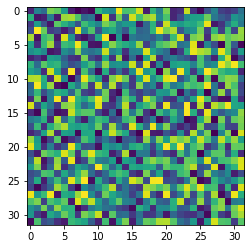

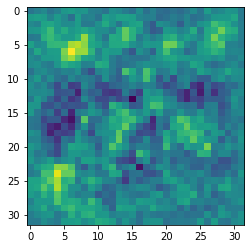

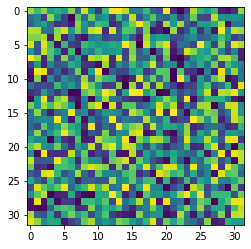

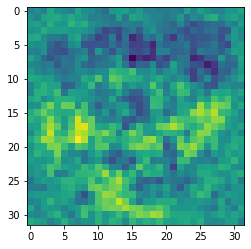

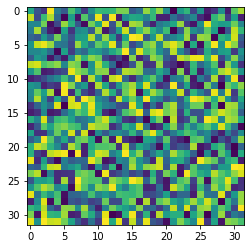

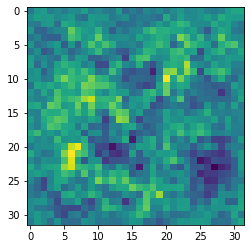

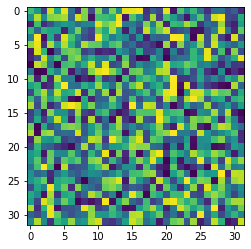

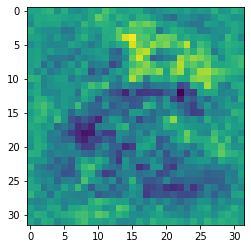

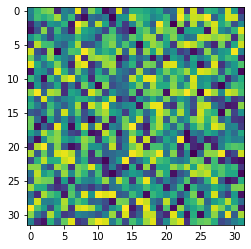

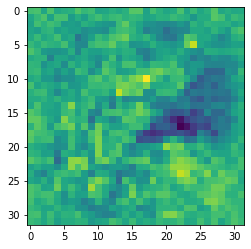

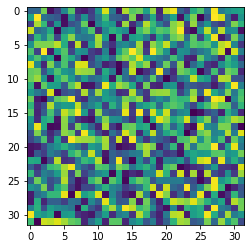

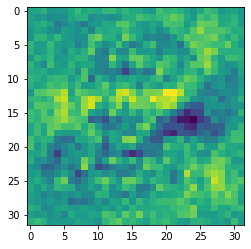

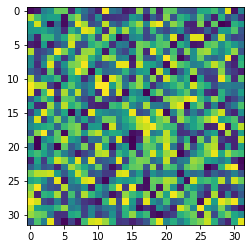

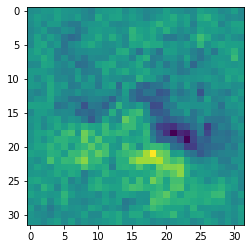

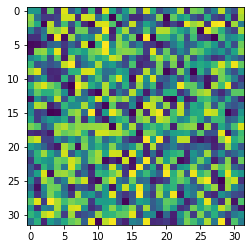

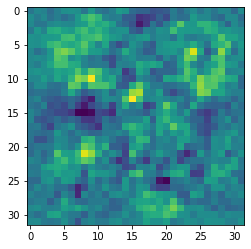

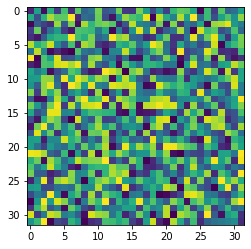

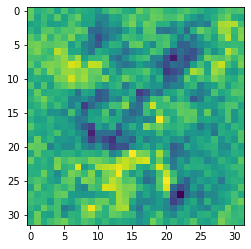

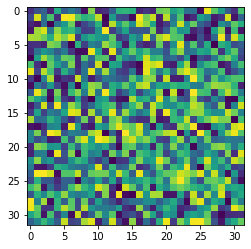

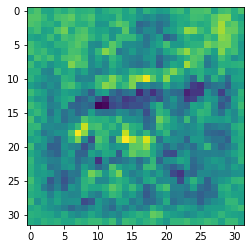

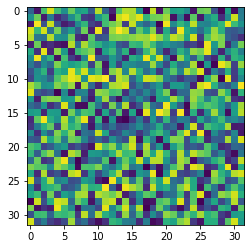

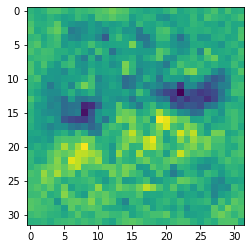

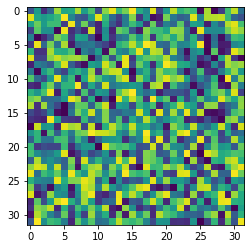

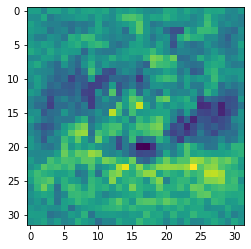

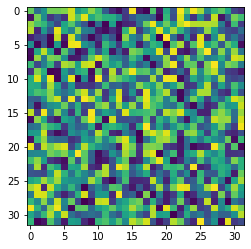

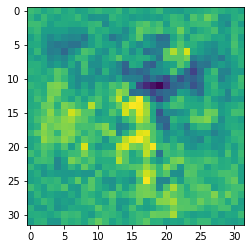

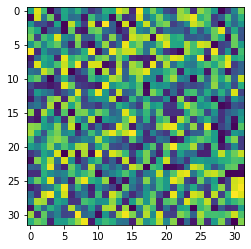

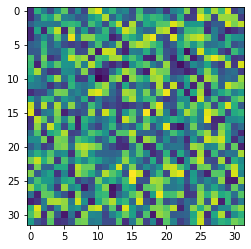

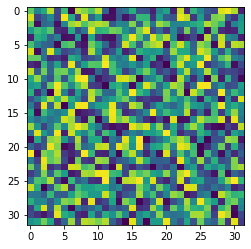

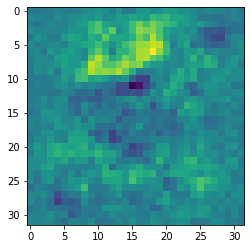

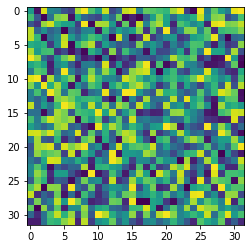

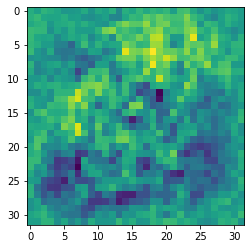

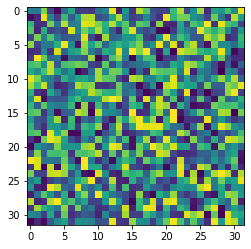

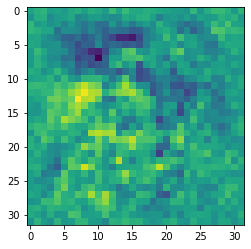

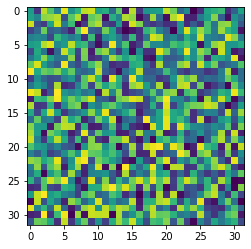

In [2]:
params = np.load("params.npy", allow_pickle=True)[()]

init_params = {}
initialize_weights(1024,64,init_params,'layer1')
initialize_weights(64,36,init_params,'output')

W = params["Wlayer1"]
W_init = init_params["Wlayer1"]
for i in range(64):
    row = W.T[i]
    plt.figure()
    plt.imshow(row.reshape((32, 32)).T)
    plt.figure()
    plt.imshow(W_init.T[i].reshape((32, 32)).T)

Compared to right after random initialization, the trained weights display smoothness in their values. Some of the trained weights even exhibit recognizable shapes. I noticed one that looks like a 2 and another that looks like a 5 in my trained weights.

### Q3.4 (3 points Code+WriteUp)

/home/thomaswei/miniconda3/envs/vision/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


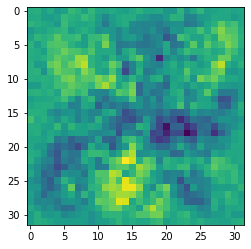

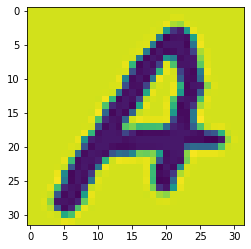

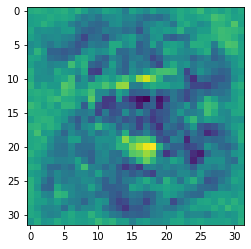

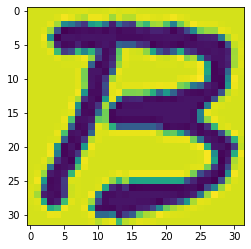

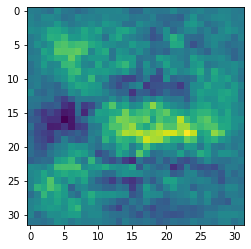

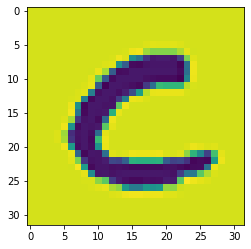

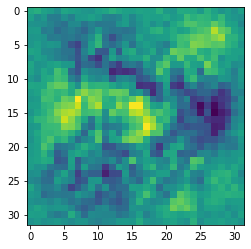

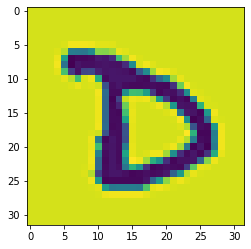

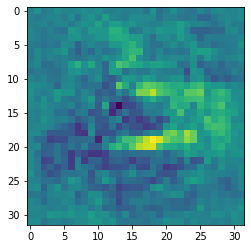

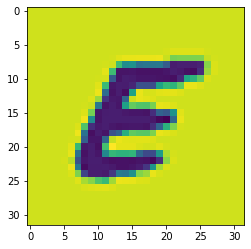

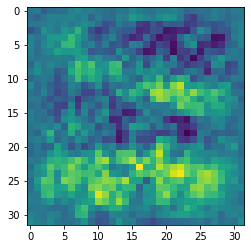

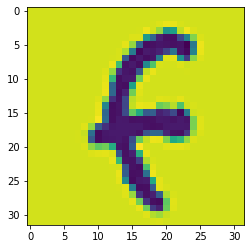

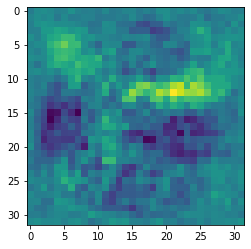

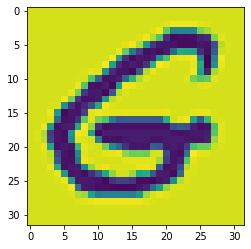

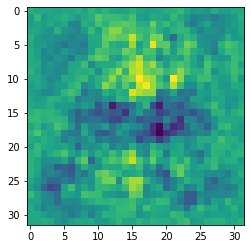

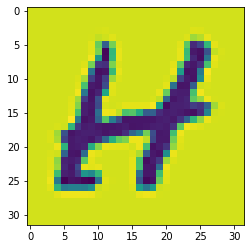

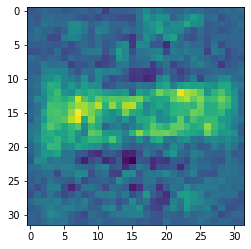

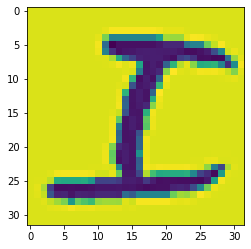

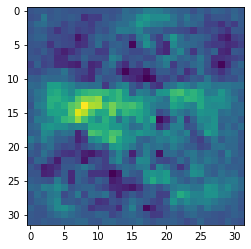

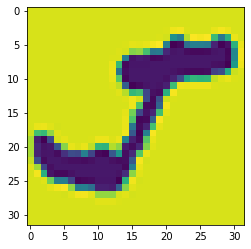

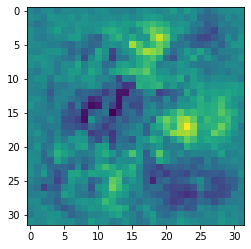

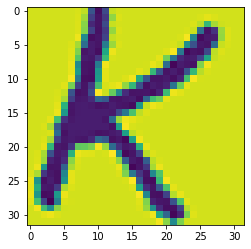

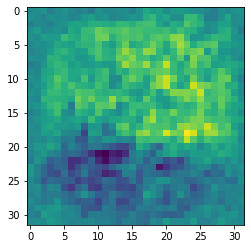

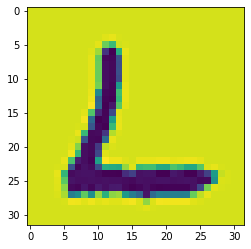

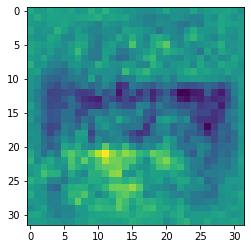

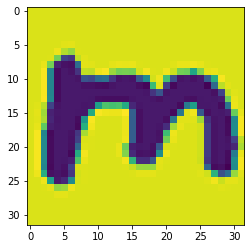

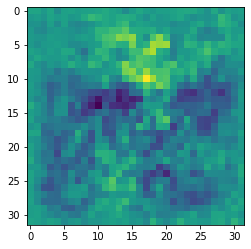

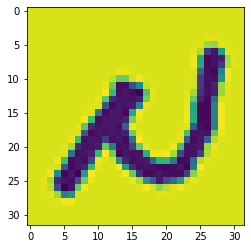

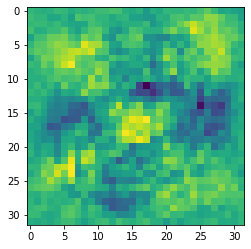

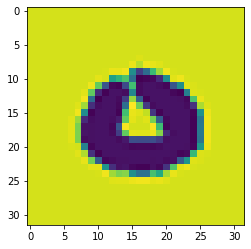

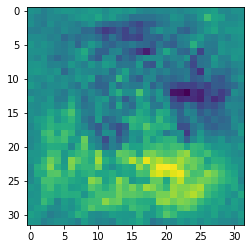

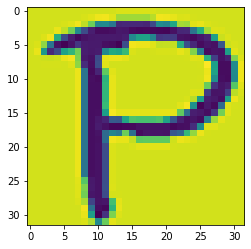

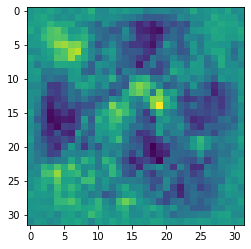

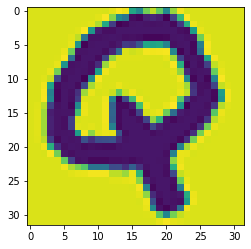

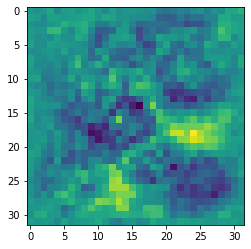

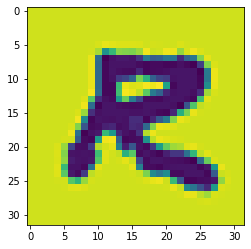

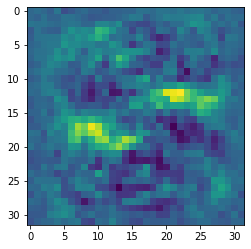

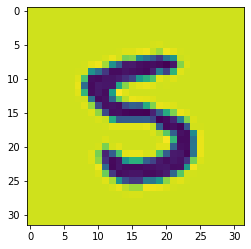

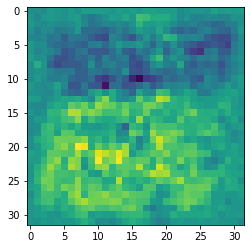

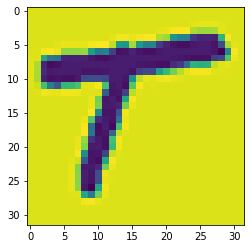

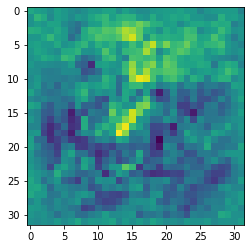

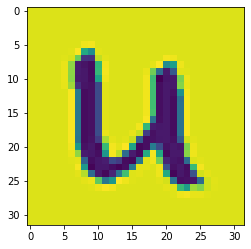

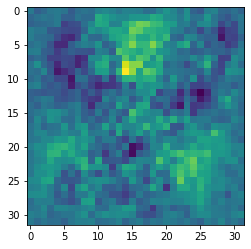

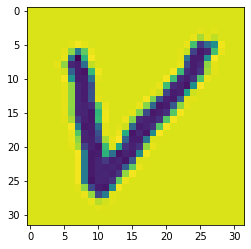

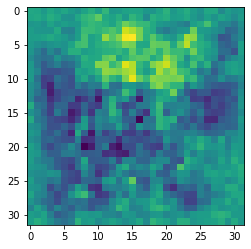

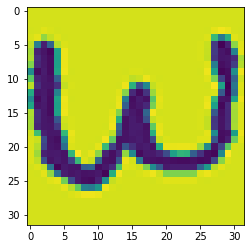

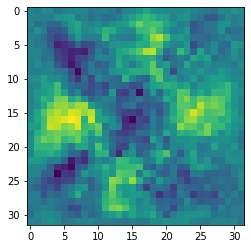

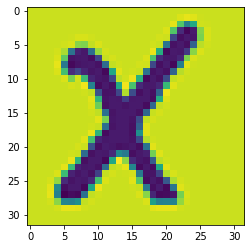

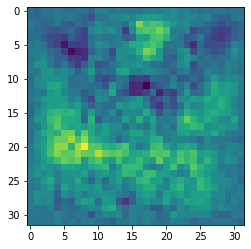

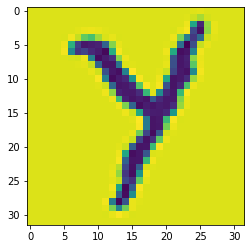

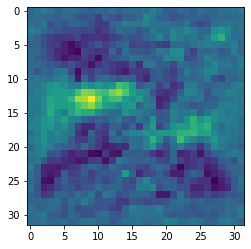

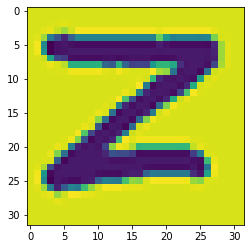

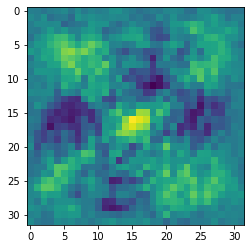

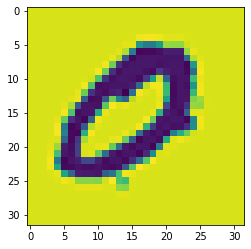

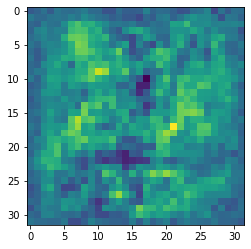

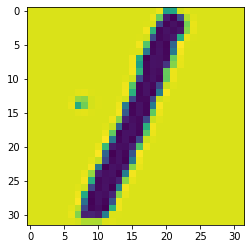

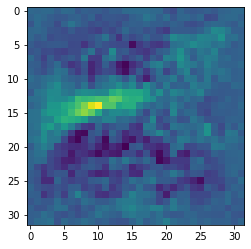

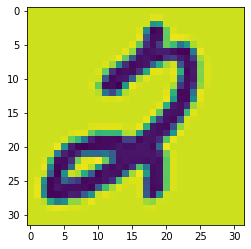

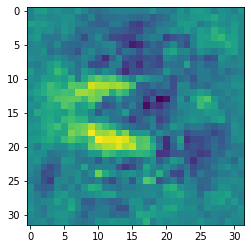

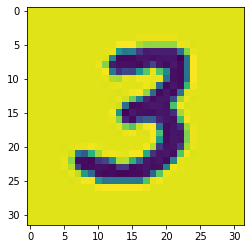

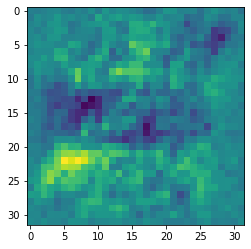

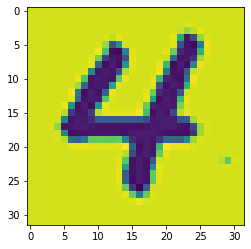

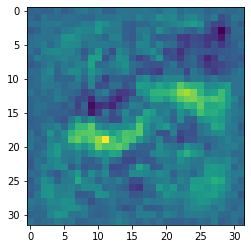

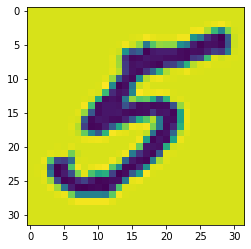

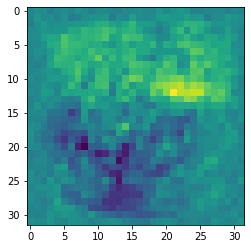

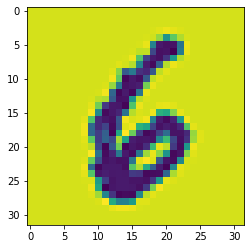

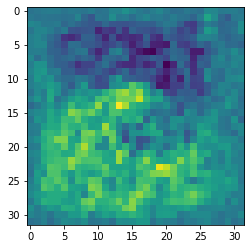

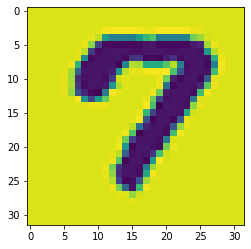

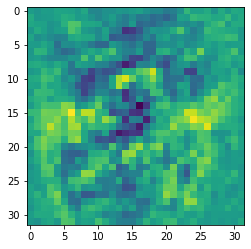

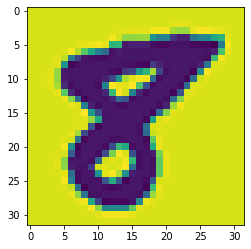

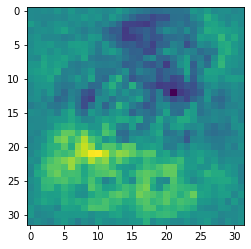

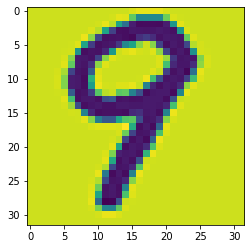

In [11]:
W_1 = params["Wlayer1"]
W_2 = params["Woutput"]

valid_data = scipy.io.loadmat('data/nist36_valid.mat')
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

z1 = forward(valid_x, params, "layer1", activation=sigmoid)
z2 = forward(z1, params, "output", activation=softmax)

for i in range(36):
    one_hot = np.zeros((1, 36))
    one_hot[0, i] = 1
    y_1 = one_hot @ W_2.T
    y_0 = y_1 @ W_1.T
    plt.figure()
    plt.imshow(y_0.reshape((32, 32)).T)
    plt.imsave("figures/layer_2_activation_{}.png".format(i), y_0.reshape((32, 32)).T)
    max_idx = np.argmax(z2[:, i].flatten())
    plt.figure()
    image = valid_x[max_idx].reshape(32, 32).T
    plt.imshow(image)
    plt.imsave("figures/max_activation_{}.png".format(i), image)

### Q3.5 (4 points Code+WriteUp)

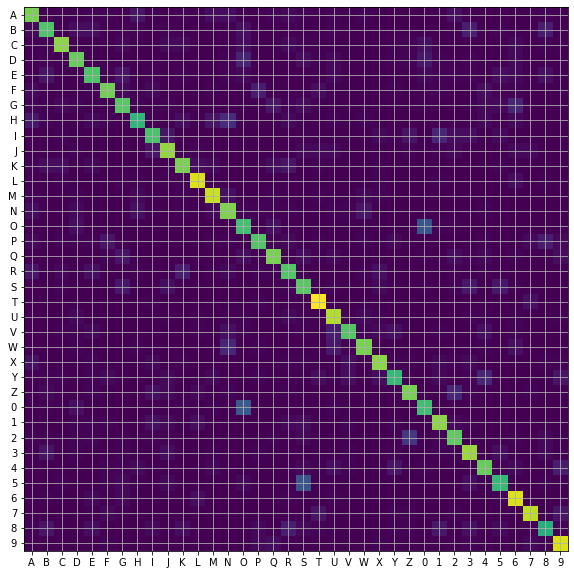

In [4]:
confusion_matrix = np.zeros((valid_y.shape[1],valid_y.shape[1]))
# YOUR CODE HERE
z1 = forward(valid_x, params, "layer1", activation=sigmoid)
z2 = forward(z1, params, "output", activation=softmax)
for i, probs in enumerate(z2):
    true_label = np.argmax(valid_y[i])
    assigned_label = np.argmax(probs)
    confusion_matrix[true_label, assigned_label] += 1

import string
plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix,interpolation='nearest')
plt.imsave("figures/confusion_matrix.png", confusion_matrix)
plt.grid(True)
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.show()

We can see that '0' and 'O' are confused for each other quite often which makes sense. Similarly, '2' and 'Z' are also confused for each other fairly often. We see that '5' is confused for 'S' quite often but the reverse is not as common.

## Q4 Extract Text from Images (35 points)

### Q4.1 (3 points WriteUp)

The given method makes the assumption that every connected group of dark pixels is a character. There could very easily be clusters of dark pixels (a dark shadow for instance) that are not text but would be detected as characters anyways.

Another assumption that the method makes (implicitly) is that all the character's that you want to detect are of a similar scale. Consider an image with a large 'E' and a very small 'E', the large E was written so it is not completely connected (before the opening morphology). After an appropriately scaled opening morphology, the large 'E' may be connected but the small 'E' may be unrecognizable as an 'E'.

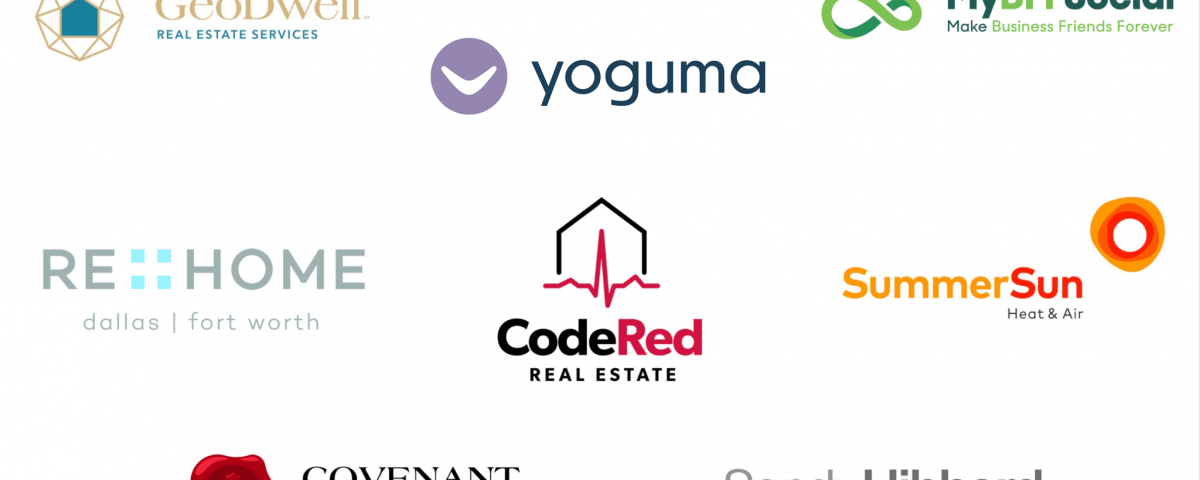

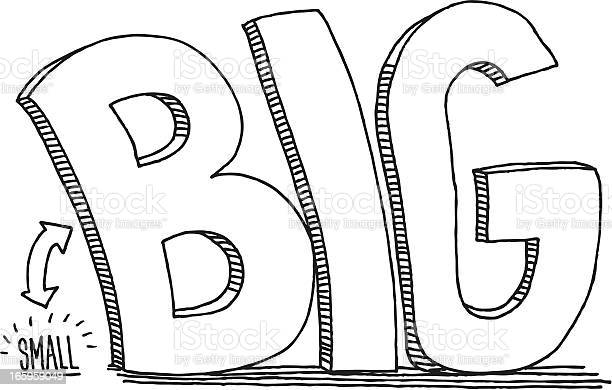

### Q4.2 (13 points Code+WriteUp)

In [12]:
import numpy as np

import skimage
import skimage.measure
import skimage.color
import skimage.restoration
import skimage.io
import skimage.filters
import skimage.morphology
import skimage.segmentation

# takes a color image
# returns a list of bounding boxes and black_and_white image
def findLetters(image):
    bboxes = []
    bw = None
    # insert processing in here
    # one idea estimate noise -> denoise -> greyscale -> threshold -> morphology -> label -> skip small boxes 
    # this can be 10 to 15 lines of code using skimage functions
    # YOUR CODE HERE
    blurred = skimage.filters.gaussian(image)
    gray = skimage.color.rgb2gray(blurred)
    threshold = skimage.filters.threshold_otsu(gray)  
    bw_pre_open = (gray > threshold) * 1
    bw = skimage.morphology.opening(bw_pre_open, skimage.morphology.square(9))
    #plt.hist(gray.ravel(), bins=256)
    #plt.show()
    #print(threshold)
    
    labeled, num_labels = skimage.measure.label(np.ones_like(bw) - bw, return_num=True)
    for i in range(1, num_labels + 1):
        bool_array = labeled == i
        y_array = np.logical_or.reduce(bool_array, axis=1).flatten()
        x_array = np.logical_or.reduce(bool_array, axis=0).flatten()
        min_y = 0
        max_y = y_array.shape[0] - 1
        while not y_array[min_y]:
            min_y += 1
        while not y_array[max_y]:
            max_y -= 1
        min_x = 0
        max_x = x_array.shape[0] - 1
        while not x_array[min_x]:
            min_x += 1
        while not x_array[max_x]:
            max_x -= 1
        bboxes.append([min_y, min_x, max_y, max_x])
        
    bboxes = np.array(bboxes)
    areas = (bboxes[:, 2] - bboxes[:, 0]) * (bboxes[:, 3] - bboxes[:, 1])
    median = np.median(areas)
    indices = areas > (median / 5)
    bboxes = bboxes[indices]
    
    return bboxes, bw

To eliminate small bounding boxes here I required that the area of each bounding box be at least greater than $\frac{1}{5}$ of the median area of all the bounding boxes in the image.

### Q4.3 (6 points WriteUp)

/home/thomaswei/miniconda3/envs/vision/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


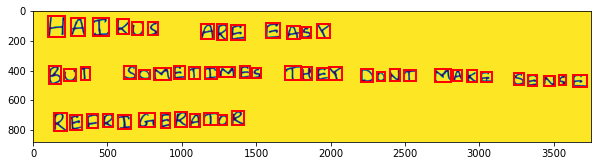

/home/thomaswei/miniconda3/envs/vision/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


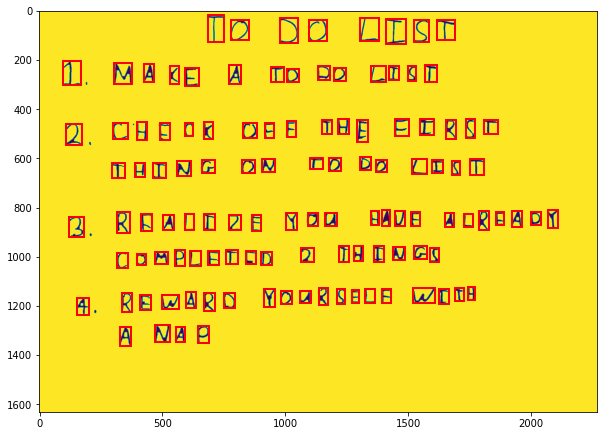

/home/thomaswei/miniconda3/envs/vision/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


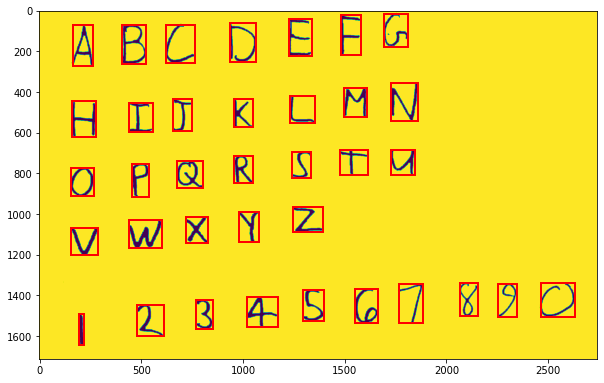

/home/thomaswei/miniconda3/envs/vision/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


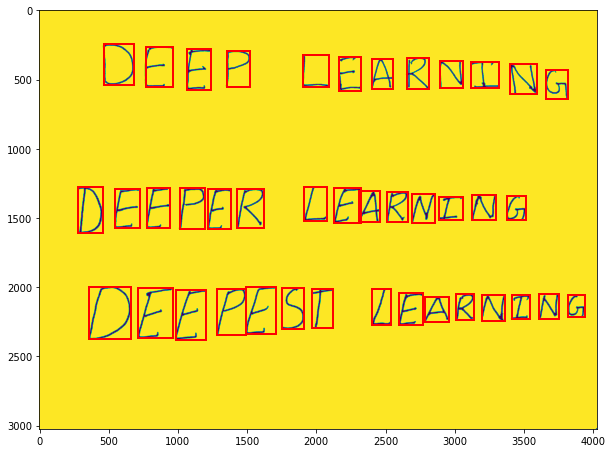

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches
import sklearn.cluster

from ipynb.fs.defs.q2 import *

# do not include any more libraries here!
# no opencv, no sklearn, etc!
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

def get(x):
    return(x[0])

def get2(x):
    return(x[1])

def get3(x):
    return(x[1][1])

all_images = []

img_cropped_images = []
img_sorted = []
for img in os.listdir('images'):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('images',img)))
    bboxes, bw = findLetters(im1)

    plt.figure(figsize=(10,10))
    plt.imshow(bw)
    for bbox in bboxes:
        minr, minc, maxr, maxc = bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    plt.show()
    # find the rows using..RANSAC, counting, clustering, etc.
    # YOUR CODE HERE
    model = sklearn.cluster.MeanShift(bandwidth=100)
    y_vals = bboxes[:, 2].reshape((-1, 1))
    model.fit(y_vals)
    labels = model.labels_
    centers = sorted([(c, i) for i, c in enumerate(model.cluster_centers_)], key=get)
    bbox_array = [[] for i in range(len(centers))]
    for i, cluster in enumerate(labels):
        bbox_array[cluster].append(bboxes[i])
    sorted_bbox_array = [bbox_array[i] for c, i in centers]
    sorted_bbox_array = [sorted(array, key=get2) for array in sorted_bbox_array]
    
    # crop the bounding boxes
    # note.. before you flatten, transpose the image (that's how the dataset is!)
    # consider doing a square crop, and even using np.pad() to get your images looking more like the dataset
    # YOUR CODE HERE
    cropped_images = []
    for row in sorted_bbox_array:
        cropped_images.append([])
        for i, bbox in enumerate(row):
            dy = (bbox[2] - bbox[0]) // 2
            dx = (bbox[3] - bbox[1]) // 2
            center_y = bbox[0] + dy
            center_x = bbox[1] + dx
            max_d = max(dy, dx)
            if i == 0:
                square_crop = bw[center_y - max_d:center_y + max_d, center_x - max_d:min(center_x + max_d, row[i+1][1])]
            elif i == len(row) - 1:
                square_crop = bw[center_y - max_d:center_y + max_d, max(center_x - max_d, row[i-1][3]):center_x + max_d]
            else:
                square_crop = bw[center_y - max_d:center_y + max_d, max(center_x - max_d, row[i-1][3]):min(center_x + max_d, row[i+1][1])]
            padded_image = np.pad(square_crop, pad_width=max_d // 4, constant_values=1)
            # plt.imshow(square_crop)
            # plt.show()
            resized_image = skimage.transform.resize(padded_image * 1.0, (32, 32))
            # plt.imshow(resized_image)
            # plt.show()
            cropped_images[-1].append(resized_image)
            all_images.append(resized_image.T.reshape((-1,)))
    img_sorted.append(sorted_bbox_array)
    img_cropped_images.append(cropped_images)


I used Mean Shift clustering to find the rows and tried to take as square crops as possible without infringing on the adjacent character's bounding boxes. I also added padding that was related to the crop size before resizing to the 32x32 network input size.

### Q4.4 (13 points Code+WriteUp)

Result: H


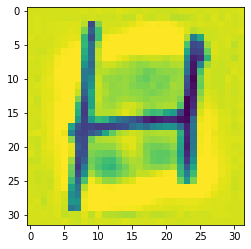

Result: A


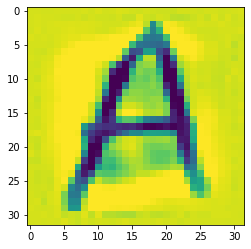

Result: I


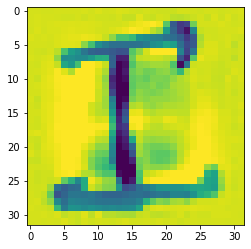

Result: K


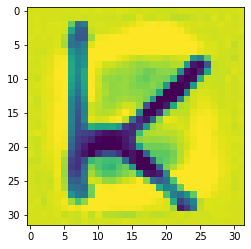

Result: U


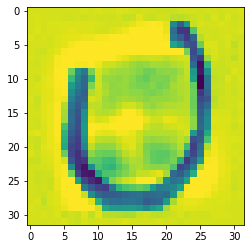

Result: S


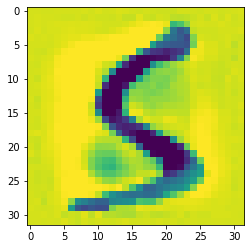

Result: A


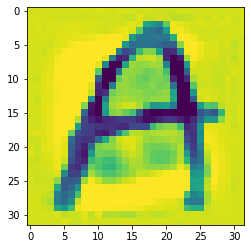

Result: R


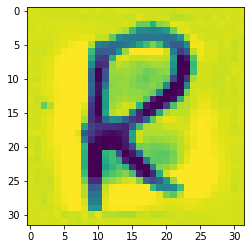

Result: 6


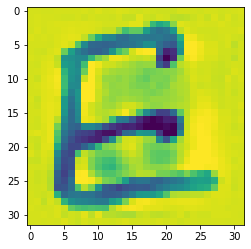

Result: H


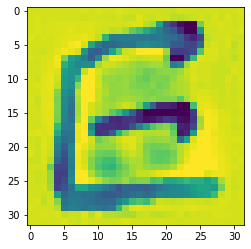

Result: A


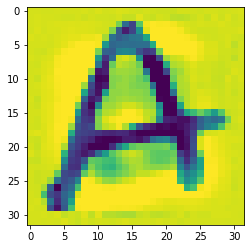

Result: S


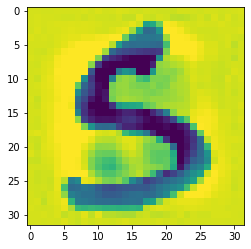

Result: Y


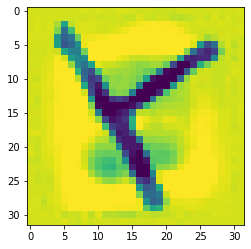

Result: B


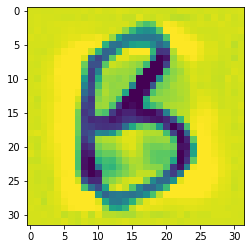

Result: C


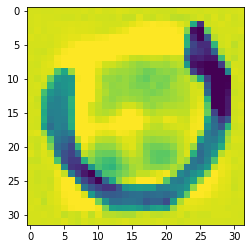

Result: T


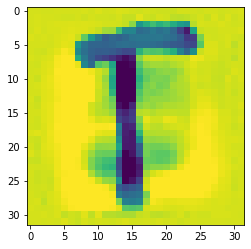

Result: S


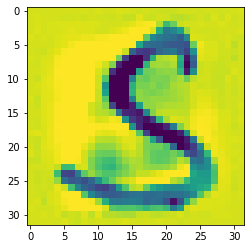

Result: D


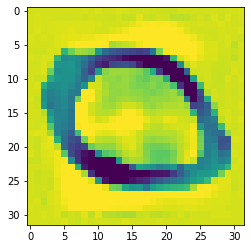

Result: M


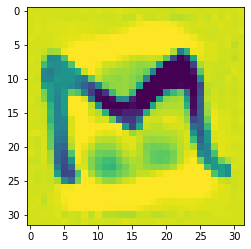

Result: E


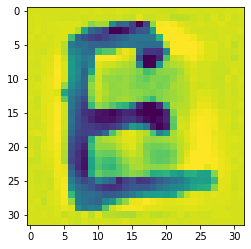

Result: T


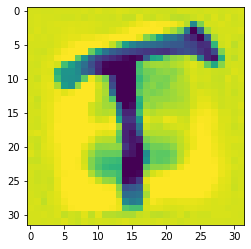

Result: I


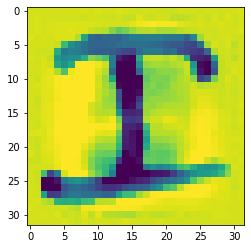

Result: M


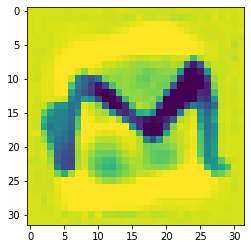

Result: E


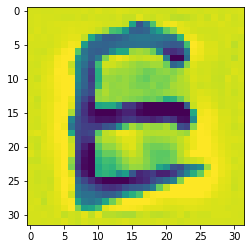

Result: S


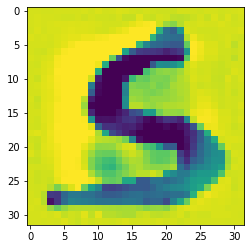

Result: T


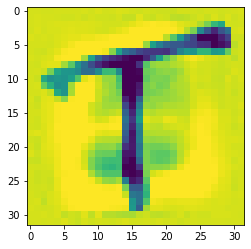

Result: A


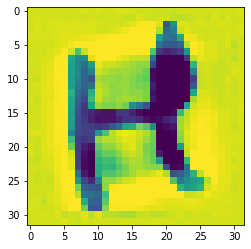

Result: E


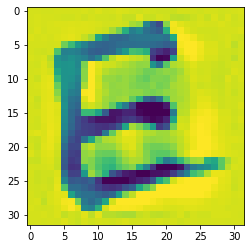

Result: Y


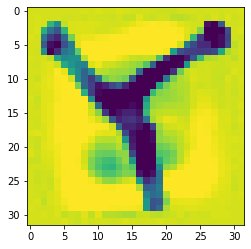

Result: D


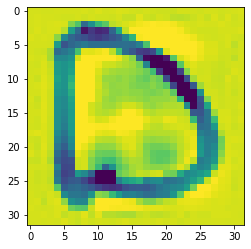

Result: D


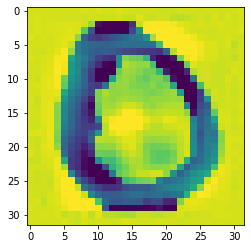

Result: N


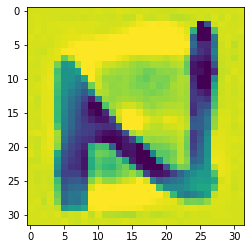

Result: T


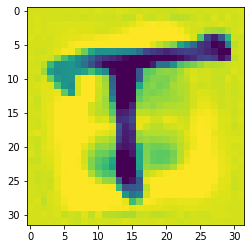

Result: M


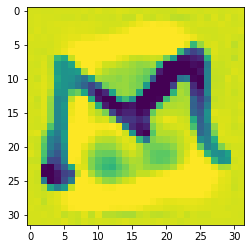

Result: A


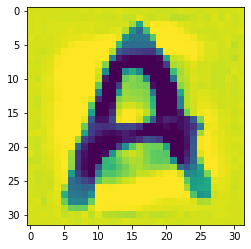

Result: K


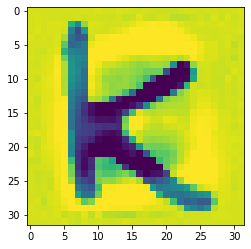

Result: 6


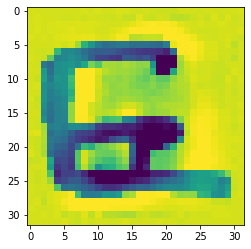

Result: S


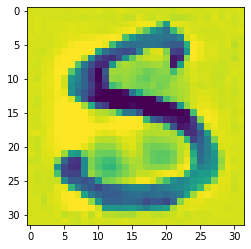

Result: 6


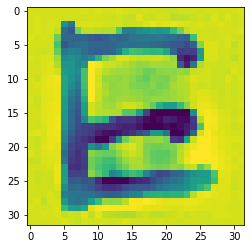

Result: N


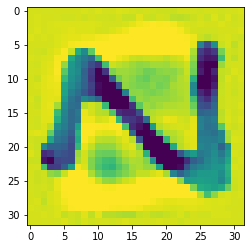

Result: Q


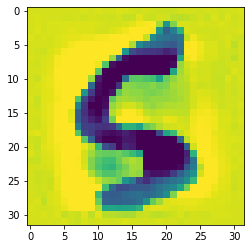

Result: E


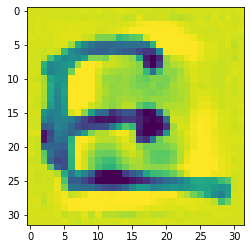

Result: R


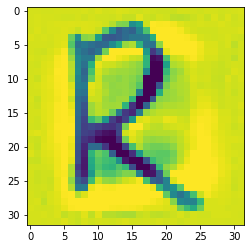

Result: B


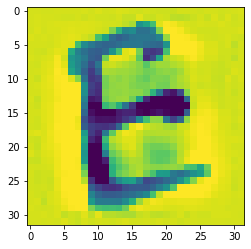

Result: F


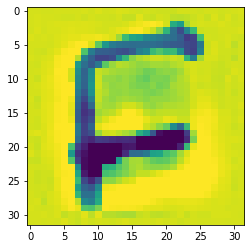

Result: R


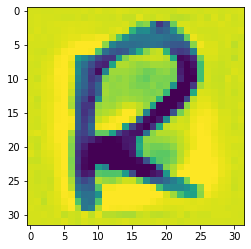

Result: I


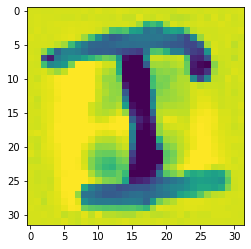

Result: G


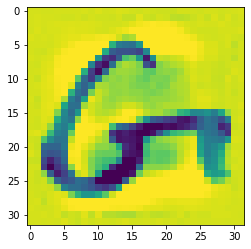

Result: E


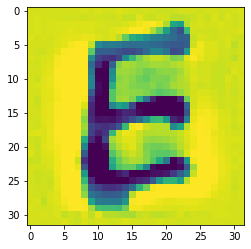

Result: R


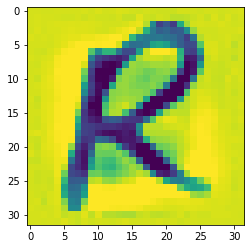

Result: A


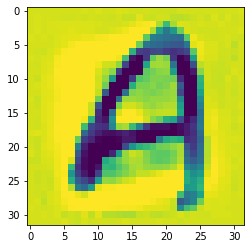

Result: T


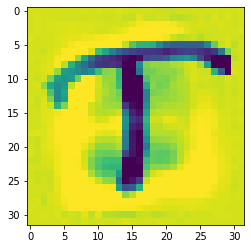

Result: O


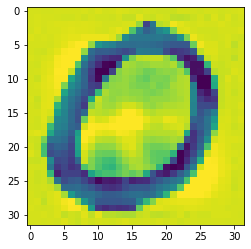

Result: R


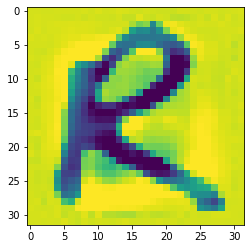

HAIKUS AR6 HASY
BCT SDMETIMES TAEY DDNT MAK6 S6NQE
RBFRIGERATOR

Result: 1


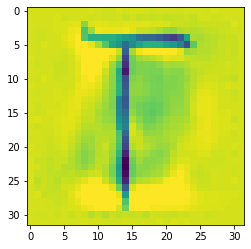

Result: S


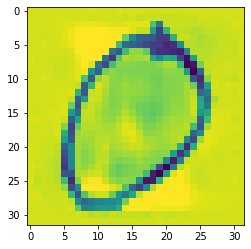

Result: D


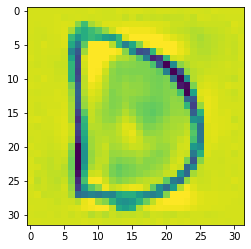

Result: 0


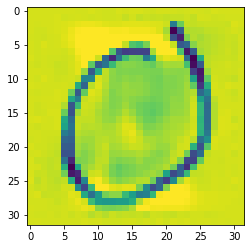

Result: L


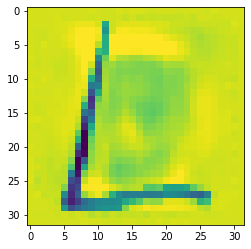

Result: I


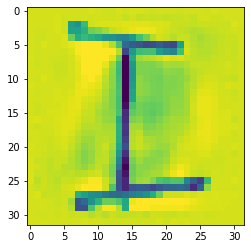

Result: 5


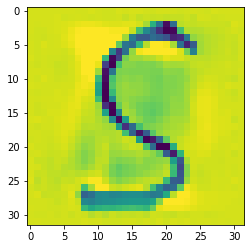

Result: T


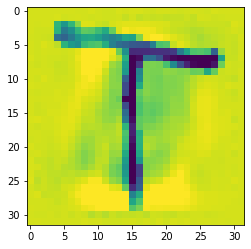

Result: I


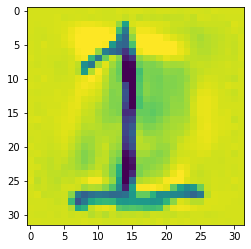

Result: N


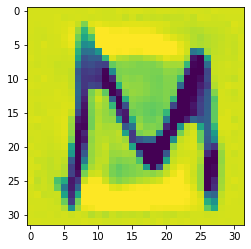

Result: A


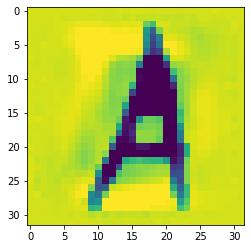

Result: K


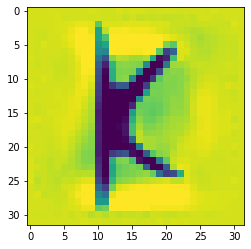

Result: E


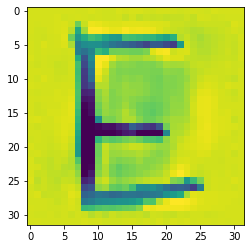

Result: A


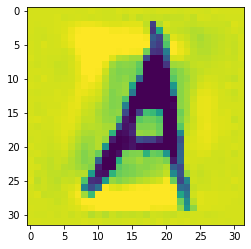

Result: T


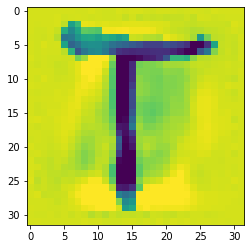

Result: O


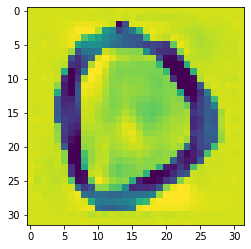

Result: D


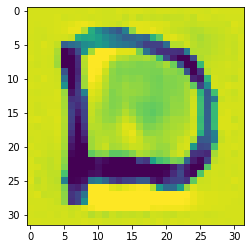

Result: O


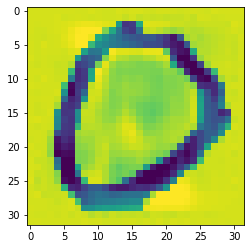

Result: L


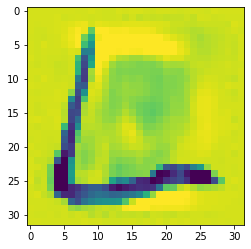

Result: I


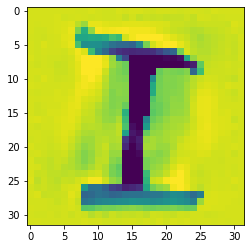

Result: S


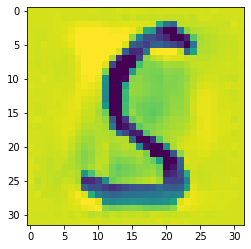

Result: T


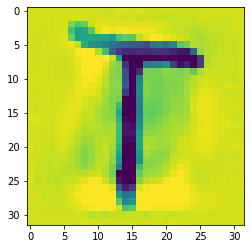

Result: I


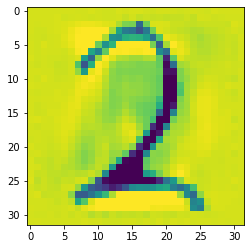

Result: C


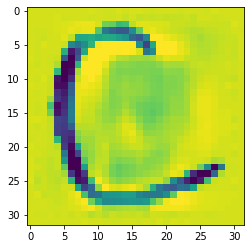

Result: H


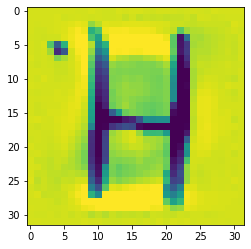

Result: V


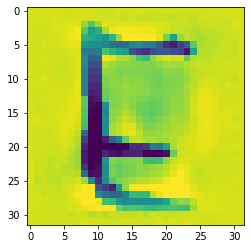

Result: C


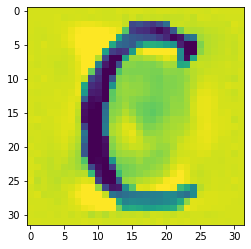

Result: K


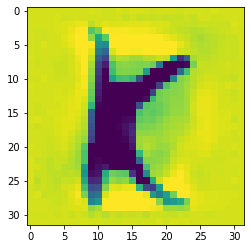

Result: U


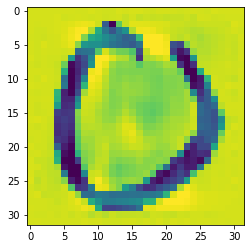

Result: F


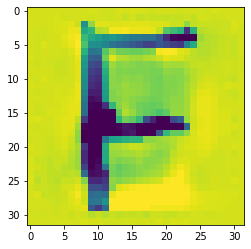

Result: E


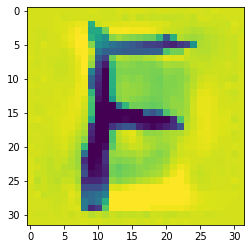

Result: T


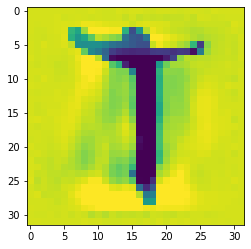

Result: H


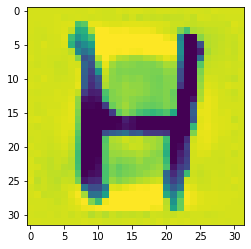

Result: E


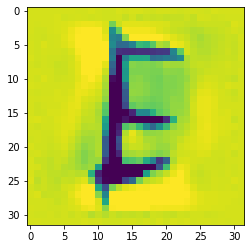

Result: F


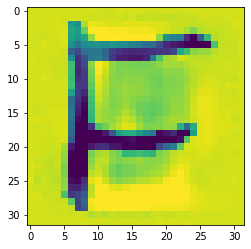

Result: I


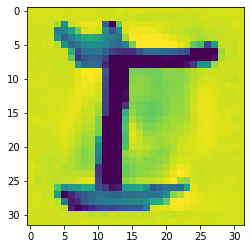

Result: R


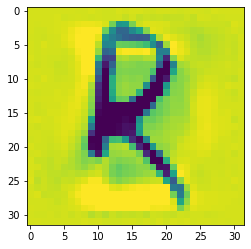

Result: S


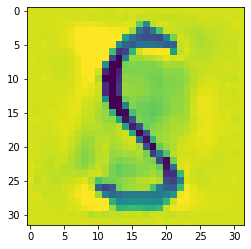

Result: T


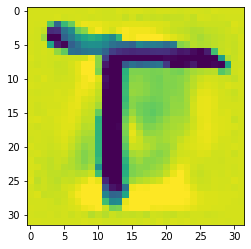

Result: T


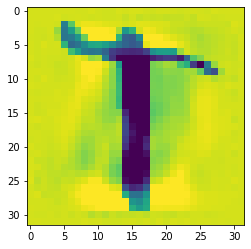

Result: H


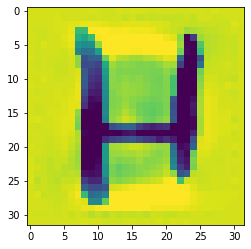

Result: I


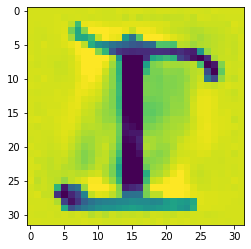

Result: N


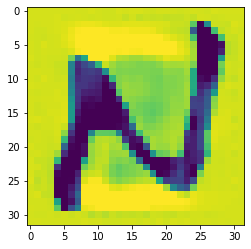

Result: G


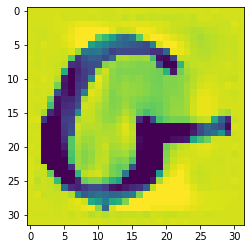

Result: Q


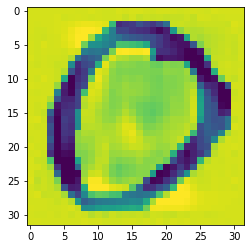

Result: N


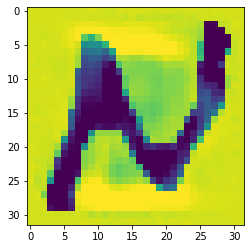

Result: T


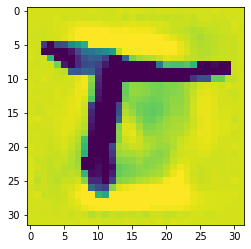

Result: O


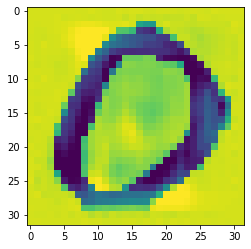

Result: D


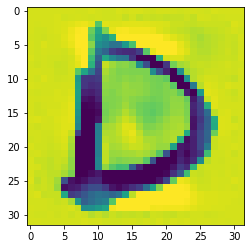

Result: O


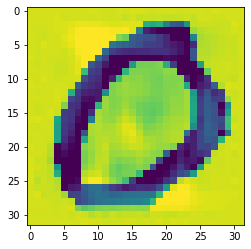

Result: L


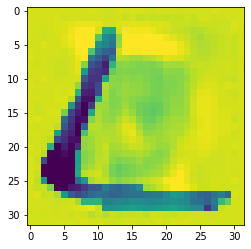

Result: I


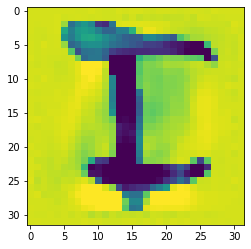

Result: S


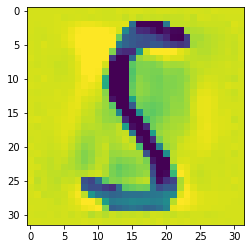

Result: T


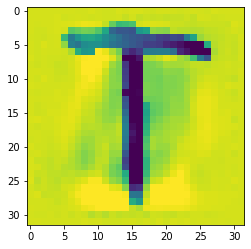

Result: 3


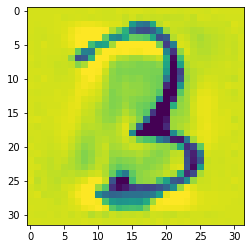

Result: R


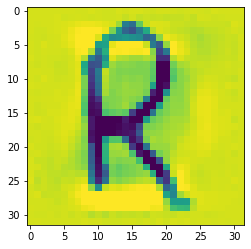

Result: I


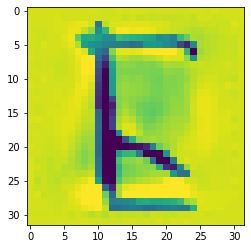

Result: A


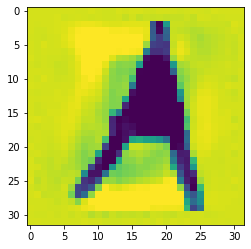

Result: L


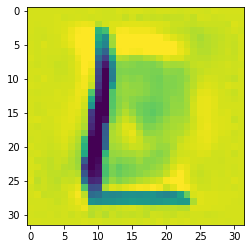

Result: I


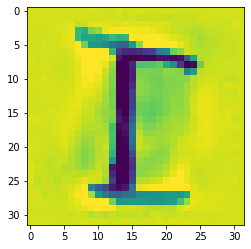

Result: Z


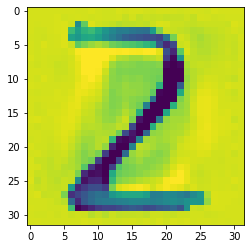

Result: E


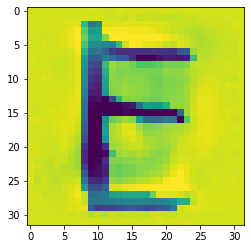

Result: Y


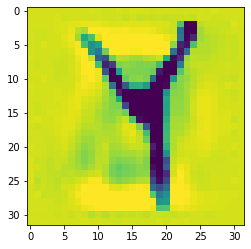

Result: 0


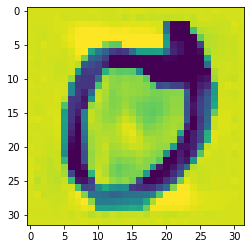

Result: U


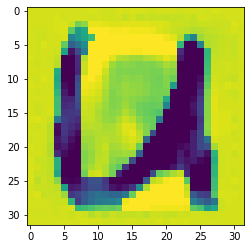

Result: 4


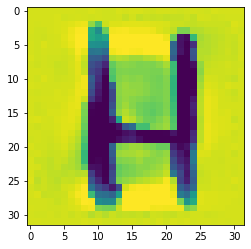

Result: A


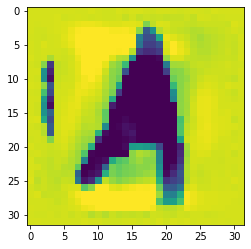

Result: V


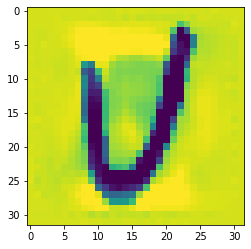

Result: E


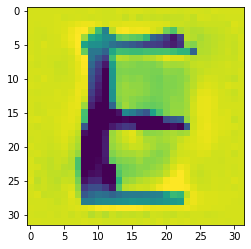

Result: A


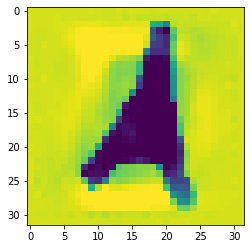

Result: L


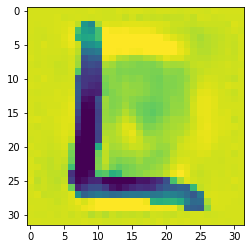

Result: R


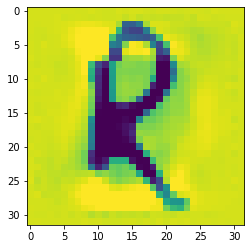

Result: 6


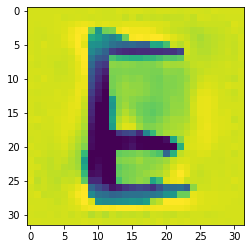

Result: A


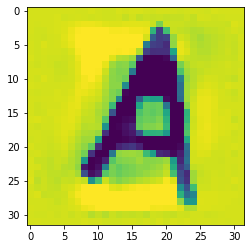

Result: D


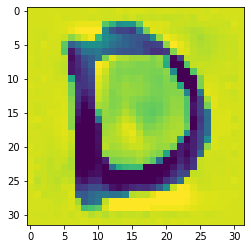

Result: T


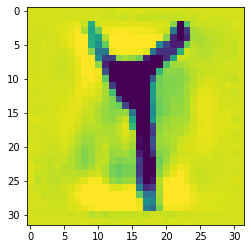

Result: C


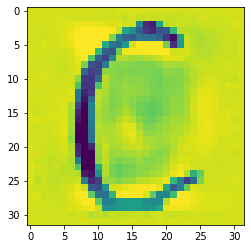

Result: Q


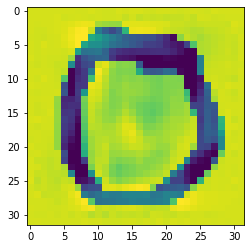

Result: M


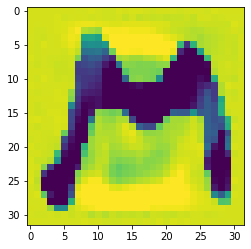

Result: P


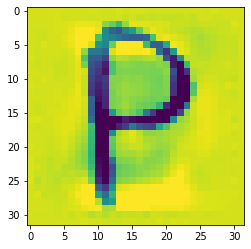

Result: L


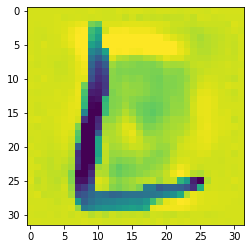

Result: F


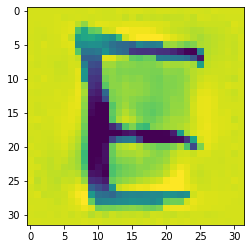

Result: T


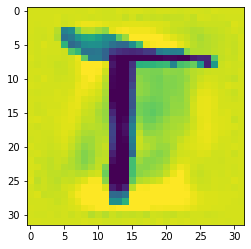

Result: 6


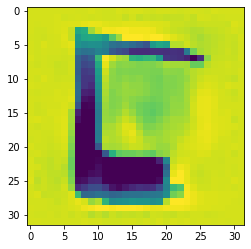

Result: D


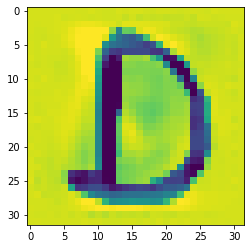

Result: Z


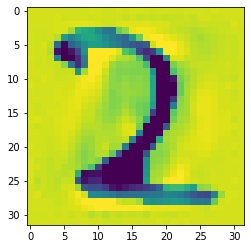

Result: 1


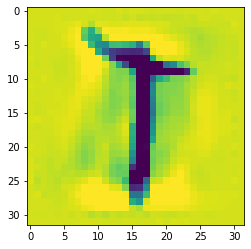

Result: H


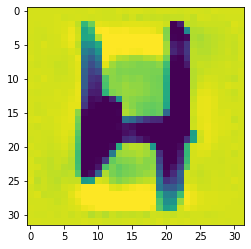

Result: I


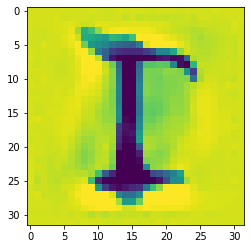

Result: N


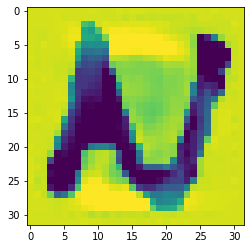

Result: G


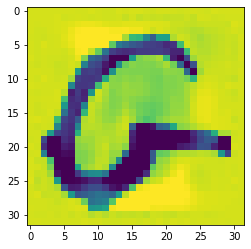

Result: S


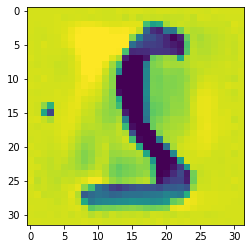

Result: F


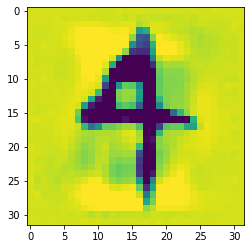

Result: R


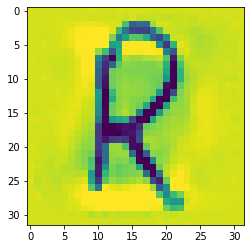

Result: F


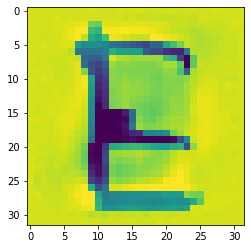

Result: W


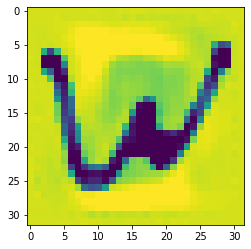

Result: A


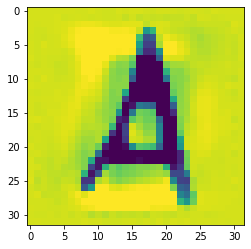

Result: R


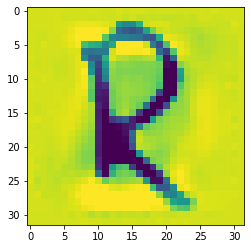

Result: D


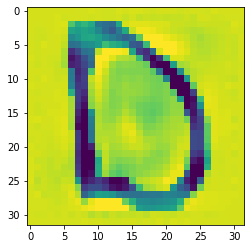

Result: Y


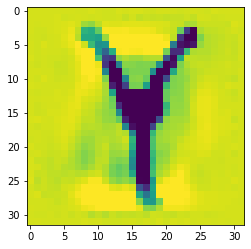

Result: O


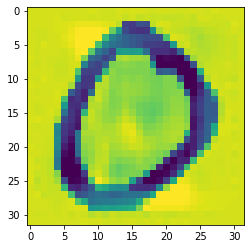

Result: U


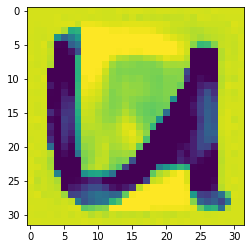

Result: R


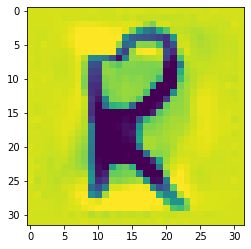

Result: S


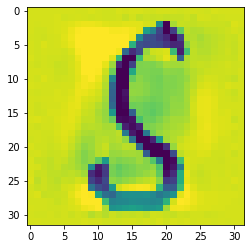

Result: E


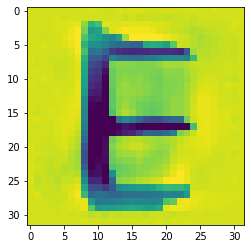

Result: L


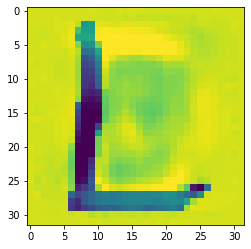

Result: F


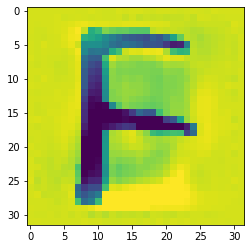

Result: W


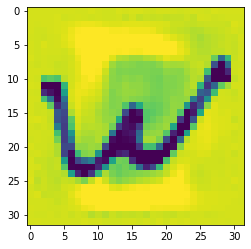

Result: I


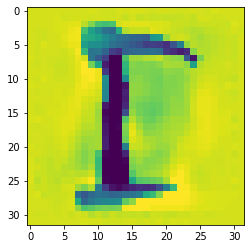

Result: T


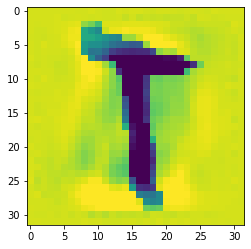

Result: H


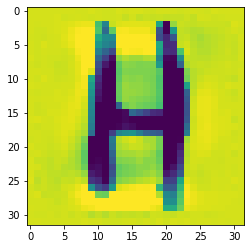

Result: A


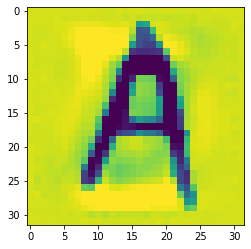

Result: N


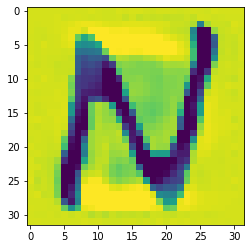

Result: A


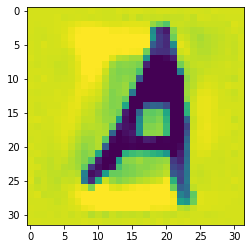

Result: P


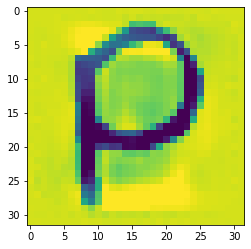

1S D0 LI5T
I NA KE A TO DO LIST
I CH V CK UF E THE F I RST
THING QN TO DO LIST
3 R I A LI Z E Y 0U 4AVE ALR6ADT
CQMPLFT6D Z 1HINGS
F RFWARD YOURSELF WITH
A NA P

Result: 2


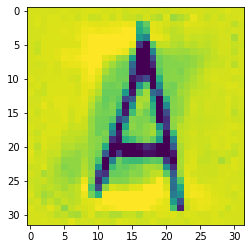

Result: B


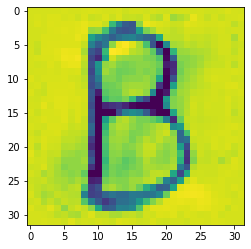

Result: L


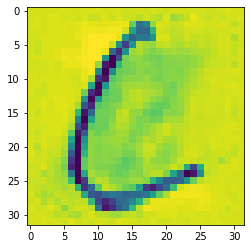

Result: D


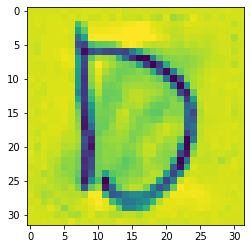

Result: E


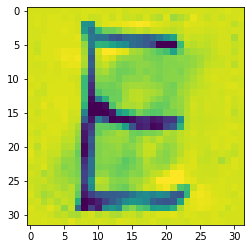

Result: F


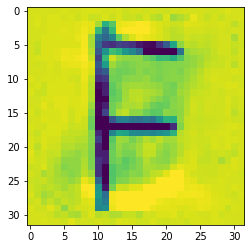

Result: G


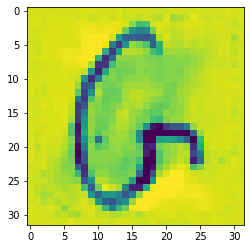

Result: H


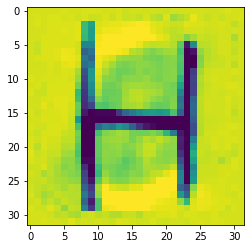

Result: I


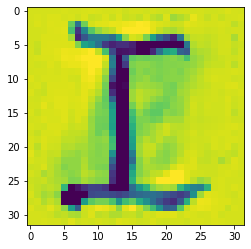

Result: 1


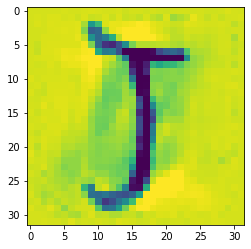

Result: K


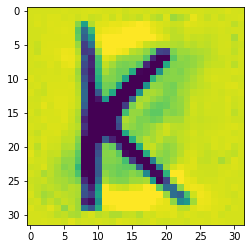

Result: L


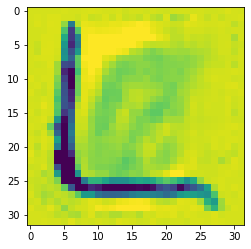

Result: M


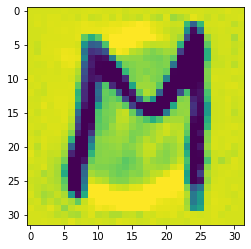

Result: N


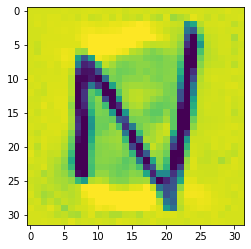

Result: O


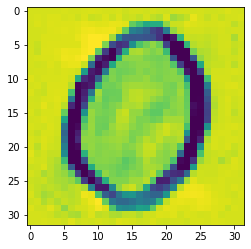

Result: P


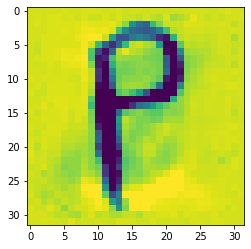

Result: Q


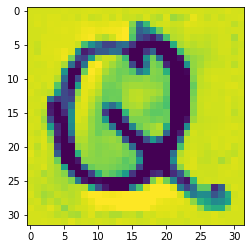

Result: R


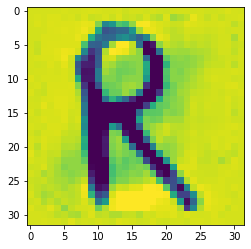

Result: Q


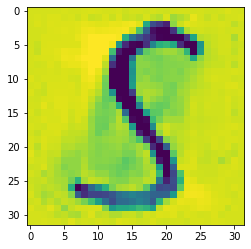

Result: T


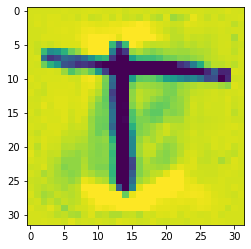

Result: U


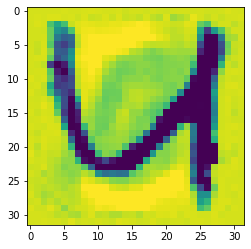

Result: V


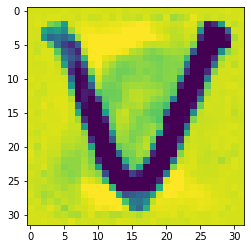

Result: W


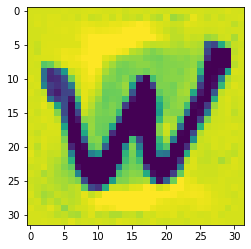

Result: X


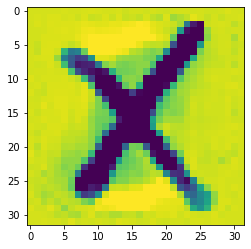

Result: Y


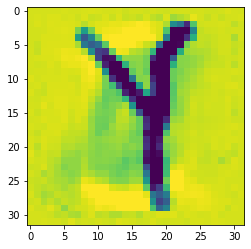

Result: Z


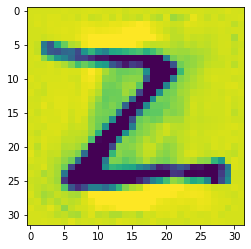

Result: 1


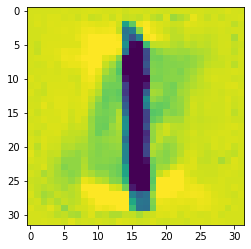

Result: Z


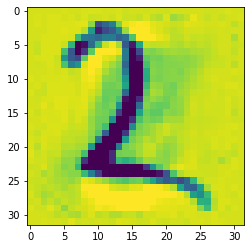

Result: 3


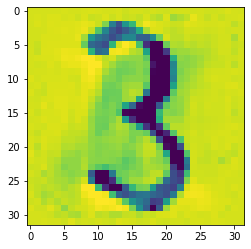

Result: 4


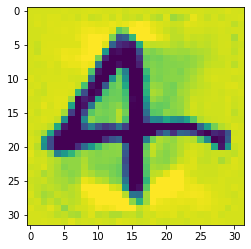

Result: S


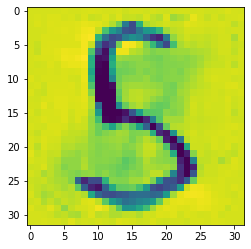

Result: G


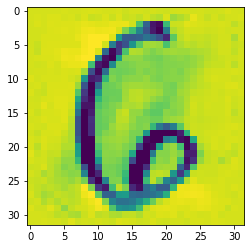

Result: 7


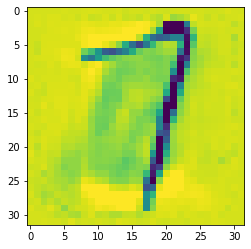

Result: 8


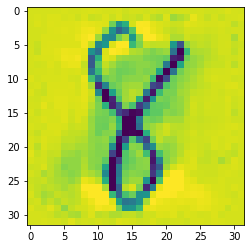

Result: 0


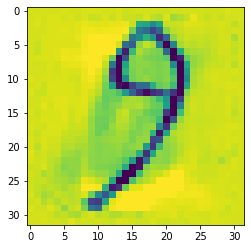

Result: O


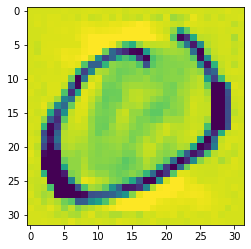

2 BL D E FG
H I1 K L M N
O P Q R Q T U
V WX Y Z
1 Z 3 4 S G7 80 O

Result: D


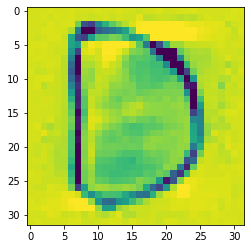

Result: E


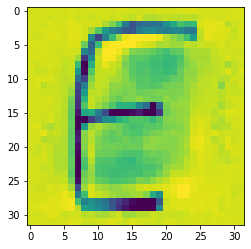

Result: E


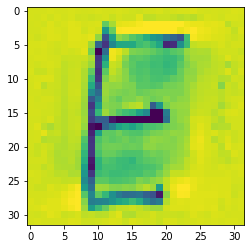

Result: P


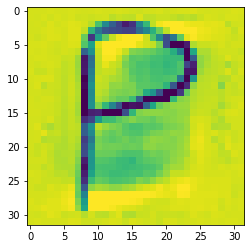

Result: L


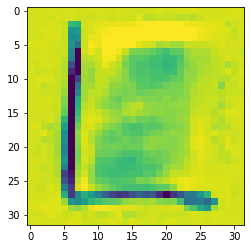

Result: E


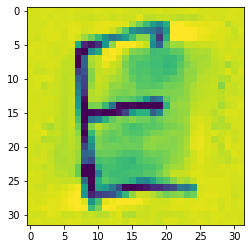

Result: A


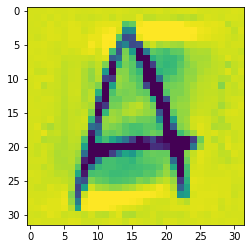

Result: R


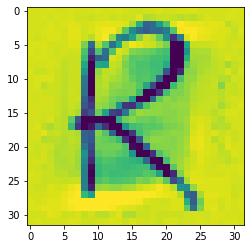

Result: M


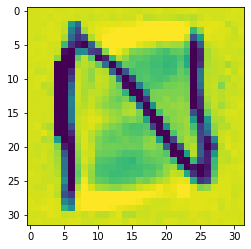

Result: I


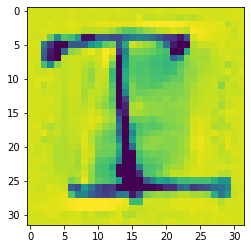

Result: N


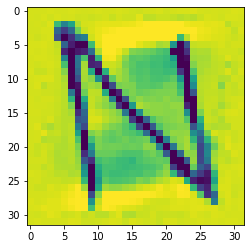

Result: G


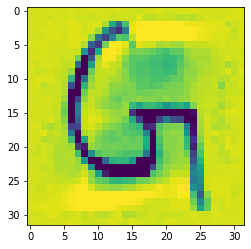

Result: O


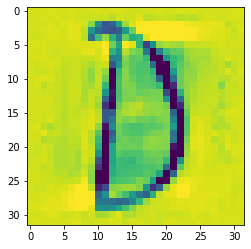

Result: F


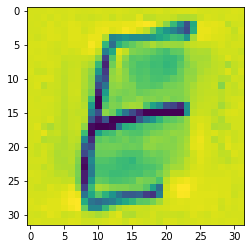

Result: E


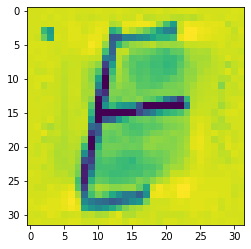

Result: P


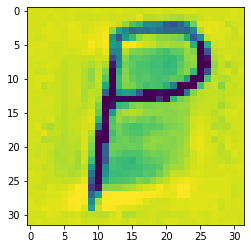

Result: E


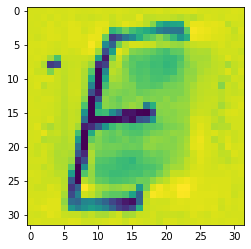

Result: R


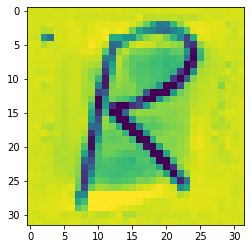

Result: L


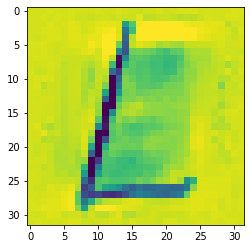

Result: E


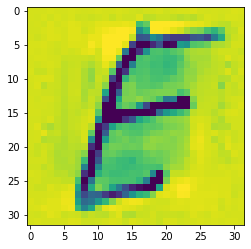

Result: A


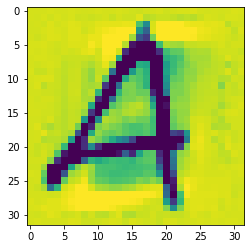

Result: R


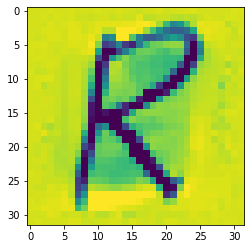

Result: N


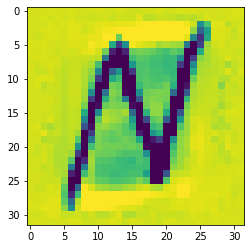

Result: I


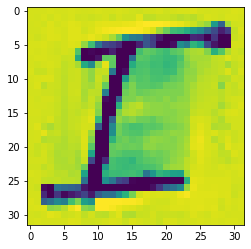

Result: M


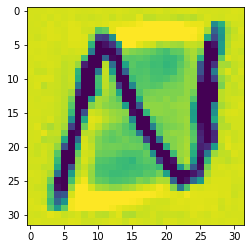

Result: G


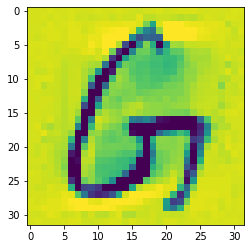

Result: D


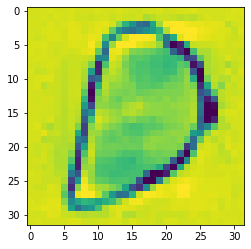

Result: E


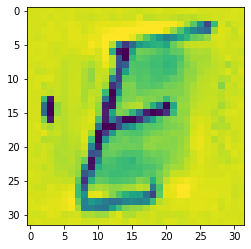

Result: E


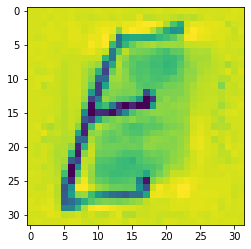

Result: P


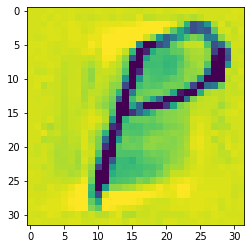

Result: E


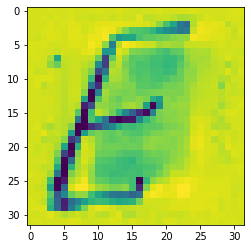

Result: S


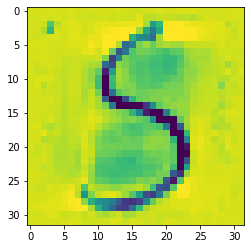

Result: F


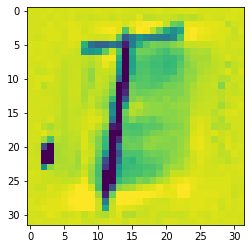

Result: L


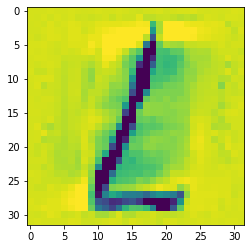

Result: E


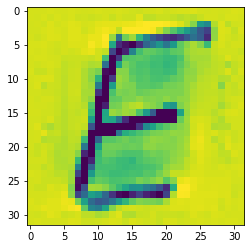

Result: A


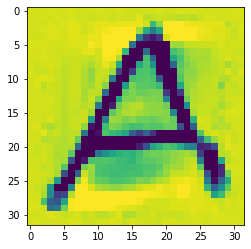

Result: R


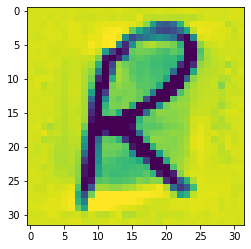

Result: N


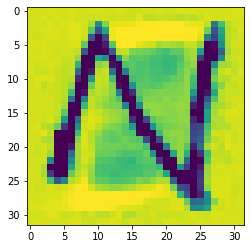

Result: I


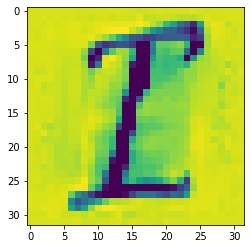

Result: N


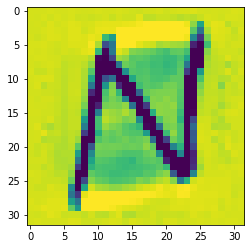

Result: G


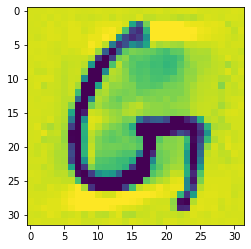

DEEP LEARMING
OFEPER LEARNIMG
DEEPESF LEARNING



In [16]:
# load the weights
# run the crops through your neural network and print them out
import pickle
import string
import scipy.io
import numpy as np

train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')
train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

train_mean = np.mean(train_x, axis=0)
train_std = np.std(train_x, axis=0)

letters = np.array([_ for _ in string.ascii_uppercase[:26]] + [str(_) for _ in range(10)])
params = np.load("params.npy", allow_pickle=True)[()]
# YOUR CODE HERE
for k, cropped_images in enumerate(img_cropped_images):
    out_string = ""
    
    all_images = np.array([image.T.reshape((1, -1)) for image in np.concatenate(cropped_images)])
    all_images += np.random.normal(loc=0.0, scale=0.0005, size=all_images.shape)
    
    batch_mean = np.mean(all_images, axis=0)
    batch_std = np.std(all_images, axis=0)
    
    for i, row in enumerate(cropped_images):
        bboxes = np.array(img_sorted[k][i])
        avg_width = np.mean(bboxes[:,3] - bboxes[:,1])

        for j, image in enumerate(row):     
            x = image.T.reshape((1, -1))
            x = (x - batch_mean) / batch_std * train_std + train_mean
            x = np.clip(x, 0, 1)
            normalized_image = x.reshape((32, 32)).T
            z1 = forward(x, params, "layer1", activation=sigmoid)
            z2 = forward(z1, params, "output", activation=softmax)
            output = letters[np.argmax(z2)]
            print("Result: {}".format(output))
            plt.imshow(normalized_image)
            plt.show()
            out_string += output

            if j < len(row) - 1 and bboxes[j][3] + avg_width < bboxes[j + 1][1]:
                out_string += ' '
        out_string += '\n'

    print("===================================")
    print(out_string)
    print("===================================")
    

A couple things that helped me get better accuracy was shifting the batch of letters so its distribution more closely resembles the training distribution in mean and variance. Each of the source images is different so I did this per batch of letters from an image as opposed to all of the images together. I also added some noise so the standard deviation calculation is numerically, even for very consistent background images. To get the spaces, I just checked the distance between a letter and the next letter in its row. If this space was more than the average letter width I added a space in the output. This didn't work perfectly for all of the images but it was an okay heuristic.

## Q5 Image Compression with Autoencoders [Extra Credit](25 points)

#### Q5.1.1 [Extra Credit](10 points Code)

YOUR ANSWER HERE

### Q5.2 [Extra Credit](3 points Code+WriteUp)

YOUR ANSWER HERE

#### Q5.3.1 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

#### Q5.3.2 [Extra Credit](3 points Code+WriteUp)

YOUR ANSWER HERE

## Q6 Comparing against PCA [Extra Credit](15 Points)

### Q6.1 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

### Q6.2 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

### Q6.3 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

### Q6.4 [Extra Credit](3 points Code+WriteUp)

YOUR ANSWER HERE

## Q7 PyTorch (40 points)

#### Q7.1.1 (10 points Code+WriteUp)

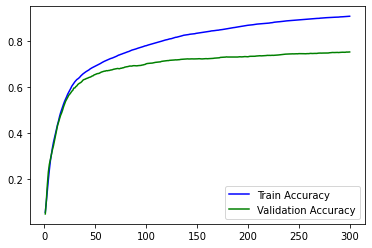

<Figure size 432x288 with 0 Axes>

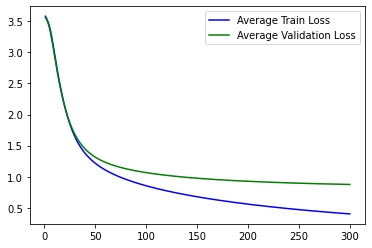

Validation accuracy:  0.7516666666666667
Max validation accuracy:  0.7516666666666667
Max validation accuracy index:  299


In [17]:
import numpy as np
import scipy.io
from ipynb.fs.defs.q2 import *
import torch
import torchvision.datasets
import matplotlib.pyplot as plt

# YOUR CODE HERE
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']
max_iters = 300
batch_size = 256
learning_rate = 0.1
input_dim = 1024
output_dim = 36
hidden_size = 64

model = torch.nn.Sequential(torch.nn.Linear(1024, 64), torch.nn.Sigmoid(), torch.nn.Linear(64, 36), torch.nn.Softmax(dim=1)).to(torch.float)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_function = torch.nn.NLLLoss()

batches = get_random_batches(train_x,train_y,batch_size)
batch_num = len(batches)

train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for itr in range(max_iters):
    total_loss = 0
    total_acc = 0
    
    for xb,yb in batches:
        probs = model.forward(torch.tensor(xb).to(torch.float))
        loss, acc = compute_loss_and_acc(yb, probs.detach().numpy())
        total_loss += loss
        total_acc += acc
        
        pt_loss = loss_function(torch.log(probs), torch.argmax(torch.tensor(yb), dim=1))
        optimizer.zero_grad()
        pt_loss.backward()
        optimizer.step()
        
    acc = total_acc / len(batches)
    train_loss.append(total_loss / (batch_size * len(batches)))
    train_acc.append(acc)
    
    with torch.no_grad():
        probs = model.forward(torch.tensor(valid_x).to(torch.float))
    loss, acc = compute_loss_and_acc(valid_y, probs.numpy())
    valid_loss.append(loss / valid_y.shape[0])
    valid_acc.append(acc)
        
# run on validation set and report accuracy! should be above 75%
# YOUR CODE HERE
epochs = [i + 1 for i in range(max_iters)]
plt.figure()
plt.plot(epochs, train_acc, label="Train Accuracy", c='b')
plt.plot(epochs, valid_acc, label="Validation Accuracy", c='g')
plt.legend()
plt.show()
plt.clf()
plt.figure()
plt.plot(epochs, train_loss, label="Average Train Loss", c='b')
plt.plot(epochs, valid_loss, label="Average Validation Loss", c='g')
plt.legend()
plt.show()

print('Validation accuracy: ', valid_acc[-1])
print('Max validation accuracy: ', np.max(valid_acc))
print('Max validation accuracy index: ', np.argmax(valid_acc))
valid_acc = valid_acc[-1]

#### Q7.1.2 (3 points Code+WriteUp)

device = cpu
Get dataset
dataset size train, test
torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
0 2.3401986932754517 0.09863333333333334
0 1.0643455379659479 0.0958
100 2.317939209540685 0.09915
100 1.0532834484360434 0.1009
200 1.867047427892685 0.39731666666666665
200 0.8418048803372816 0.4047
300 0.697309499780337 0.8149166666666666
300 0.30845248604362663 0.8193
400 0.3786179829388857 0.9041833333333333
400 0.16289126007394358 0.9115
500 0.2617439863582452 0.9356166666666667
500 0.1133342956006527 0.9393
600 0.28871008461962144 0.9189833333333334
600 0.12665017301386053 0.9254
700 0.19404958302776018 0.9488666666666666
700 0.08333952652629126 0.9518
800 0.195785192300876 0.9441166666666667
800 0.0835832849805328 0.9486
900 0.16568511297305424 0.954
900 0.07130316011099652 0.9539
1000 0.17134317299971977 0.95445
1000 0.07591313496232033 0.9541
1100 0.1340418063228329 0.9615333333333334
1100 0.05579152467914603 0.9654
1200 0.13747390031193693 0.9593166666666667
1200 0.05700

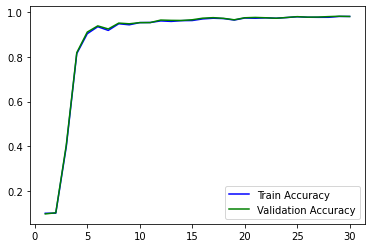

<Figure size 432x288 with 0 Axes>

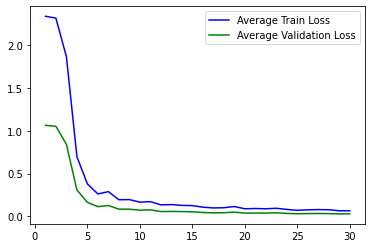

In [18]:
import numpy as np
import scipy.io
import torch
import torchvision
from torch import nn, optim
import torch.nn.functional as F  # a lower level (compared to torch.nn) interface
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from time import time

# Use GPU if available, otherwise stick with cpu
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cuda" if use_cuda else "cpu")
print("device = {}".format(device))

print("Get dataset")
mnist_train = MNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
trainset_loader = DataLoader(mnist_train, batch_size=20, shuffle=True, num_workers=1)

mnist_test = MNIST(root="data", train=False, download=True, transform=transforms.ToTensor())
testset_loader = DataLoader(mnist_test, batch_size=20, shuffle=True, num_workers=1)

print("dataset size train, test")
print(trainset_loader.dataset.data.shape)
print(testset_loader.dataset.data.shape)

# YOUR CODE HERE
max_iter = 1
learning_rate = 0.1
model = torch.nn.Sequential(torch.nn.Conv2d(1, 32, 3, stride=1), torch.nn.ReLU(), torch.nn.Conv2d(32, 32, 3, stride=1),
                         torch.nn.ReLU(), torch.nn.MaxPool2d(2), torch.nn.Conv2d(32, 64, 3, stride=1), torch.nn.ReLU(), 
                         torch.nn.Conv2d(64, 64, 3, stride=1), torch.nn.ReLU(), torch.nn.MaxPool2d(2), torch.nn.Flatten(),
                         torch.nn.Linear(1024, 64), torch.nn.Sigmoid(), torch.nn.Linear(64, 10), torch.nn.Softmax(dim=1))
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_function = torch.nn.NLLLoss()

valid_loss = []
valid_acc = []
train_loss = []
train_acc = []

all_features = mnist_train.train_data.unsqueeze(1).to(torch.float)
all_labels = mnist_train.train_labels

eval_loader = DataLoader(mnist_train, batch_size=100, shuffle=True, num_workers=1)

i = 0
for itr in range(max_iter):
    for train_features, train_labels in iter(trainset_loader):
        probs = model.forward(train_features)
        pt_loss = loss_function(torch.log(probs), train_labels)
        #print(np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), train_labels.numpy())) / train_features.size()[0])
        optimizer.zero_grad()
        pt_loss.backward()
        optimizer.step()
        if i % 100 == 0:
            total_loss = 0
            total_correct = 0
            total = 0
            n = 0
            for eval_features, eval_labels in iter(eval_loader):
                with torch.no_grad():
                    probs = model.forward(eval_features)
                pt_loss = loss_function(torch.log(probs), eval_labels)
                total_correct += np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), eval_labels.numpy()))
                total_loss += pt_loss.item()
                total += eval_features.size()[0]
                n += 1

            avg_loss = total_loss / n
            acc = total_correct / total
            train_loss.append(avg_loss)
            train_acc.append(acc)
            print(i, avg_loss, acc)
            
            total_loss = 0
            total_correct = 0
            total = 0
            n
            for eval_features, eval_labels in iter(testset_loader):
                with torch.no_grad():
                    probs = model.forward(eval_features)
                pt_loss = loss_function(torch.log(probs), eval_labels)
                total_correct += np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), eval_labels.numpy()))
                total_loss += pt_loss.item()
                total += eval_labels.size()[0]
                n += 1
            avg_loss = total_loss / n
            acc = total_correct / total
            valid_loss.append(avg_loss)
            valid_acc.append(acc)
            print(i, avg_loss, acc)
        i += 1

epochs = [i + 1 for i in range(len(train_acc))]
plt.figure()
plt.plot(epochs, train_acc, label="Train Accuracy", c='b')
plt.plot(epochs, valid_acc, label="Validation Accuracy", c='g')
plt.legend()
plt.show()
plt.clf()
plt.figure()
plt.plot(epochs, train_loss, label="Average Train Loss", c='b')
plt.plot(epochs, valid_loss, label="Average Validation Loss", c='g')
plt.legend()
plt.show()

#### Q7.1.3 (2 points Code+WriteUp)

device = cpu
Get dataset
itr: 00 	 loss: 3.612181 	 acc : 0.024275
0 3.612046718597412 0.027777777777777776
itr: 100 	 loss: 3.583306 	 acc : 0.032366
100 3.587311029434204 0.027777777777777776
itr: 200 	 loss: 3.581895 	 acc : 0.032366
200 3.587054967880249 0.027777777777777776
itr: 300 	 loss: 3.581199 	 acc : 0.030785
300 3.586430549621582 0.027777777777777776
itr: 400 	 loss: 3.578050 	 acc : 0.050781
400 3.582984209060669 0.04777777777777778
itr: 500 	 loss: 3.549908 	 acc : 0.113932
500 3.554382085800171 0.10583333333333333
itr: 600 	 loss: 2.722713 	 acc : 0.401786
600 2.746211290359497 0.3902777777777778
itr: 700 	 loss: 1.975810 	 acc : 0.640160
700 2.024092674255371 0.6175
itr: 800 	 loss: 1.480639 	 acc : 0.718471
800 1.5602680444717407 0.6783333333333333
itr: 900 	 loss: 1.062802 	 acc : 0.818266
900 1.1741414070129395 0.7677777777777778
itr: 1000 	 loss: 0.786371 	 acc : 0.865141
1000 0.9241204857826233 0.8055555555555556
itr: 1100 	 loss: 0.624381 	 acc : 0.888951
1100 0.

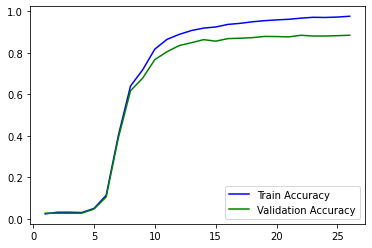

<Figure size 432x288 with 0 Axes>

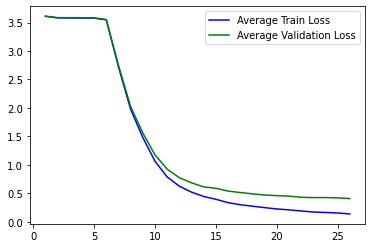

In [19]:
import numpy as np
import scipy.io
import torch
from torch import nn, optim
import torch.nn.functional as F  # a lower level (compared to torch.nn) interface
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from time import time
import matplotlib.pyplot as plt

# Use GPU if available, otherwise stick with cpu
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cuda" if use_cuda else "cpu")
print("device = {}".format(device))

print("Get dataset")
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'].astype(np.float32), train_data['train_labels'].astype(np.int)
valid_x, valid_y = valid_data['valid_data'].astype(np.float32), valid_data['valid_labels'].astype(np.int)

# YOUR CODE HERE
batch_size = 128
learning_rate = 0.1
max_iters = 30
batches = get_random_batches(train_x,train_y,batch_size)
model = torch.nn.Sequential(torch.nn.Conv2d(1, 32, 3, stride=1), torch.nn.ReLU(), torch.nn.Conv2d(32, 32, 3, stride=1),
                         torch.nn.ReLU(), torch.nn.MaxPool2d(2), torch.nn.Conv2d(32, 64, 3, stride=1), torch.nn.ReLU(), 
                         torch.nn.Conv2d(64, 64, 3, stride=1), torch.nn.ReLU(), torch.nn.MaxPool2d(2), torch.nn.Flatten(),
                         torch.nn.Linear(1600, 64), torch.nn.Sigmoid(), torch.nn.Linear(64, 36), torch.nn.Softmax(dim=1))
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_function = torch.nn.NLLLoss()

i = 0
valid_loss = []
valid_acc = []
train_loss = []
train_acc = []
for itr in range(max_iters):
    total_loss = 0
    total_acc = 0
    
    for xb,yb in batches:
        probs = model.forward(torch.tensor(xb.reshape((-1, 1, 32, 32))))
        pt_loss = loss_function(torch.log(probs), torch.argmax(torch.tensor(yb), dim=1))
        optimizer.zero_grad()
        pt_loss.backward()
        optimizer.step()
        if i % 100 == 0:
            total_loss = 0
            total_correct = 0
            total = 0
            n = 0
            for xb, yb in batches:
                with torch.no_grad():
                    probs = model.forward(torch.tensor(xb.reshape((-1, 1, 32, 32))))
                pt_loss = loss_function(torch.log(probs), torch.argmax(torch.tensor(yb), dim=1))
                total_correct += np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), np.argmax(yb, axis=1)))
                total_loss += pt_loss.item()
                total += yb.shape[0]
                n += 1

            avg_loss = total_loss / n
            acc = total_correct / total
            print("itr: {:02d} \t loss: {:.6f} \t acc : {:.6f}".format(i, avg_loss, acc))
            train_loss.append(avg_loss)
            train_acc.append(acc)
            
            with torch.no_grad():
                probs = model.forward(torch.tensor(valid_x.reshape((-1, 1, 32, 32))))
            pt_loss = loss_function(torch.log(probs), torch.argmax(torch.tensor(valid_y), dim=1))
            total_correct = np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), np.argmax(valid_y, axis=1)))
            total_loss = pt_loss.item()
            total = valid_y.shape[0]
            
            avg_loss = total_loss
            acc = total_correct / total
            valid_loss.append(avg_loss)
            valid_acc.append(acc)
            print(i, avg_loss, acc)
        i += 1
        
epochs = [i + 1 for i in range(len(train_acc))]
plt.figure()
plt.plot(epochs, train_acc, label="Train Accuracy", c='b')
plt.plot(epochs, valid_acc, label="Validation Accuracy", c='g')
plt.legend()
plt.show()
plt.clf()
plt.figure()
plt.plot(epochs, train_loss, label="Average Train Loss", c='b')
plt.plot(epochs, valid_loss, label="Average Validation Loss", c='g')
plt.legend()
plt.show()

#### Q7.1.4 (15 points Code+WriteUp)

device = cpu
Get dataset
torch.Size([112800, 28, 28])
torch.Size([18800, 28, 28])
0 3.8941912386857025 0.02127659574468085
0 3.894192248785577 0.02127659574468085
100 3.7835922794984587 0.0874113475177305
100 3.7842425383678098 0.0873404255319149
200 3.419053799505775 0.22993794326241135
200 3.421460746096916 0.22946808510638297
300 3.2575899007472584 0.33995567375886526
300 3.260866096230591 0.3382978723404255
400 3.123398131935309 0.4134131205673759
400 3.127132719876815 0.4096808510638298
500 3.011424300095714 0.45657801418439714
500 3.0151988121928 0.4570744680851064
600 2.910830725380715 0.5040514184397163
600 2.916212329248182 0.5025
700 2.805425430865998 0.543590425531915
700 2.811207495579103 0.5411170212765958
800 2.7088894294508807 0.5614007092198582
800 2.714851971386241 0.5581914893617022
900 2.6094592703995128 0.5825620567375887
900 2.617045755289039 0.5780851063829787
1000 2.5283874960233135 0.5998847517730497
1000 2.535975224306794 0.5958510638297873
1100 2.4458086947177

9600 0.5698827504054874 0.8398404255319148
9600 0.6088475916458636 0.8283510638297872
9700 0.5644234865375445 0.8414982269503546
9700 0.6033793792229931 0.8306382978723404
9800 0.5597487434427789 0.8409485815602837
9800 0.5994067665468268 0.829627659574468
9900 0.5594702217437274 0.8427482269503546
9900 0.5988735688381455 0.8294680851063829
10000 0.5542345561139973 0.8420124113475177
10000 0.5936292189927328 0.83
10100 0.5487526013179028 0.8439893617021277
10100 0.5894627296397476 0.8317021276595745
10200 0.5460233740931284 0.8433599290780142
10200 0.5858164618209917 0.8321276595744681
10300 0.5405866194859887 0.8447783687943262
10300 0.5798305179797062 0.8317021276595745
10400 0.5385669281455219 0.846436170212766
10400 0.5786028795299076 0.8351063829787234
10500 0.5344714928709023 0.8468085106382979
10500 0.5757207558268592 0.8362765957446808
10600 0.5312618512581003 0.8460460992907801
10600 0.5718964621120569 0.834627659574468
10700 0.5276157151088647 0.8476507092198582
10700 0.56763

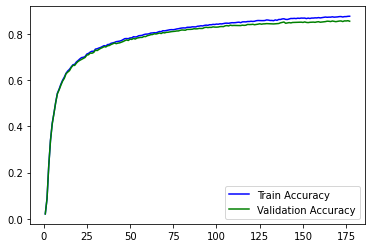

<Figure size 432x288 with 0 Axes>

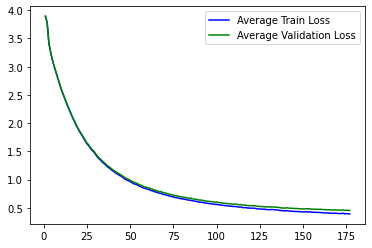

In [25]:
import numpy as np
import scipy.io
import torch
from torch import nn, optim
import torchvision
import torch.nn.functional as F  # a lower level (compared to torch.nn) interface
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import EMNIST
import torchvision.transforms as transforms
from time import time

# Use GPU if available, otherwise stick with cpu
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cuda" if use_cuda else "cpu")
print("device = {}".format(device))

print("Get dataset")

EMNIST.url = 'http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip'
# Reference for transform function
# https://stackoverflow.com/a/54513835
transform=torchvision.transforms.Compose([
    lambda img: torchvision.transforms.functional.rotate(img, -90),
    lambda img: torchvision.transforms.functional.hflip(img),
    torchvision.transforms.ToTensor()
])
emnist_train = EMNIST(root="data", split='balanced', train=True, download=True, transform=transform)
trainset_loader = DataLoader(emnist_train, batch_size=64, shuffle=True, num_workers=1)

emnist_test = EMNIST(root="data", split='balanced', train=False, download=True, transform=transform)
testset_loader = DataLoader(emnist_test, batch_size=64, shuffle=True, num_workers=1)

# Ref: https://github.com/gaurav0651/emnist/blob/master/train_emnist.ipynb
label_map = ['0','1','2','3','4','5','6','7','8','9',
       'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
       'a','b','d','e','f','g','h','n','q','r','t']

print(trainset_loader.dataset.data.shape)
print(testset_loader.dataset.data.shape)

# YOUR CODE HERE
max_iter = 10
learning_rate = 0.0001
model = torch.nn.Sequential(torch.nn.Conv2d(1, 32, 3, stride=1), torch.nn.ReLU(), torch.nn.Conv2d(32, 32, 3, stride=1),
                         torch.nn.ReLU(), torch.nn.MaxPool2d(2), torch.nn.Conv2d(32, 64, 3, stride=1), torch.nn.ReLU(), 
                         torch.nn.Conv2d(64, 64, 3, stride=1), torch.nn.ReLU(), torch.nn.MaxPool2d(2), torch.nn.Flatten(),
                         torch.nn.Linear(1024, 64), torch.nn.Sigmoid(), torch.nn.Linear(64, len(label_map)), torch.nn.Softmax(dim=1))
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_function = torch.nn.NLLLoss()

valid_loss = []
valid_acc = []
train_loss = []
train_acc = []

all_features = mnist_train.train_data.unsqueeze(1).to(torch.float)
all_labels = mnist_train.train_labels

eval_loader = DataLoader(emnist_train, batch_size=100, shuffle=True, num_workers=1)

i = 0
for itr in range(max_iter):
    for train_features, train_labels in iter(trainset_loader):
        probs = model.forward(train_features)
        pt_loss = loss_function(torch.log(probs), train_labels)
        #print(np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), train_labels.numpy())) / train_features.size()[0])
        optimizer.zero_grad()
        pt_loss.backward()
        optimizer.step()
        if i % 100 == 0:
            total_loss = 0
            total_correct = 0
            total = 0
            n = 0
            for eval_features, eval_labels in iter(eval_loader):
                with torch.no_grad():
                    probs = model.forward(eval_features)
                pt_loss = loss_function(torch.log(probs), eval_labels)
                total_correct += np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), eval_labels.numpy()))
                total_loss += pt_loss.item()
                total += eval_features.size()[0]
                n += 1

            avg_loss = total_loss / n
            acc = total_correct / total
            train_loss.append(avg_loss)
            train_acc.append(acc)
            print(i, avg_loss, acc)
            
            total_loss = 0
            total_correct = 0
            total = 0
            n = 0
            for eval_features, eval_labels in iter(testset_loader):
                with torch.no_grad():
                    probs = model.forward(eval_features)
                pt_loss = loss_function(torch.log(probs), eval_labels)
                total_correct += np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), eval_labels.numpy()))
                total_loss += pt_loss.item()
                total += eval_labels.size()[0]
                n += 1
            avg_loss = total_loss / n
            acc = total_correct / total
            valid_loss.append(avg_loss)
            valid_acc.append(acc)
            print(i, avg_loss, acc)
        i += 1

emnist_model2 = model
epochs = [i + 1 for i in range(len(train_acc))]
plt.figure()
plt.plot(epochs, train_acc, label="Train Accuracy", c='b')
plt.plot(epochs, valid_acc, label="Validation Accuracy", c='g')
plt.legend()
plt.show()
plt.clf()
plt.figure()
plt.plot(epochs, train_loss, label="Average Train Loss", c='b')
plt.plot(epochs, valid_loss, label="Average Validation Loss", c='g')
plt.legend()
plt.show()

ipynb.fs.defs.q4:63: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


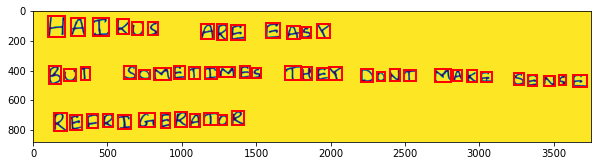

ipynb.fs.defs.q4:63: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


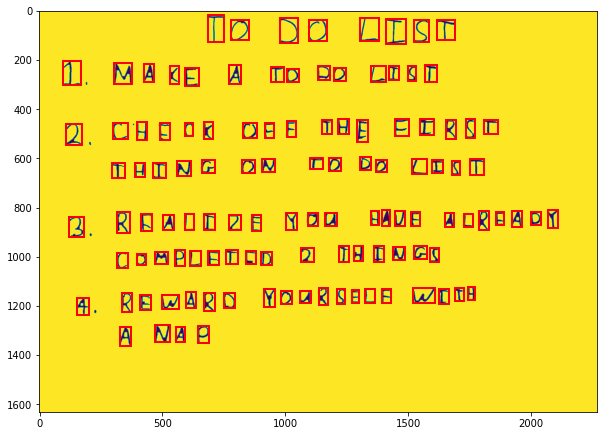

ipynb.fs.defs.q4:63: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


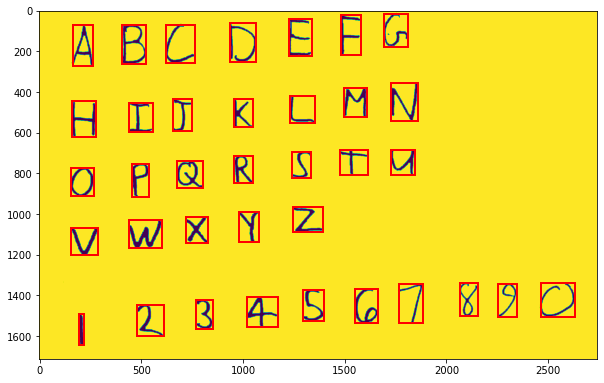

ipynb.fs.defs.q4:63: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


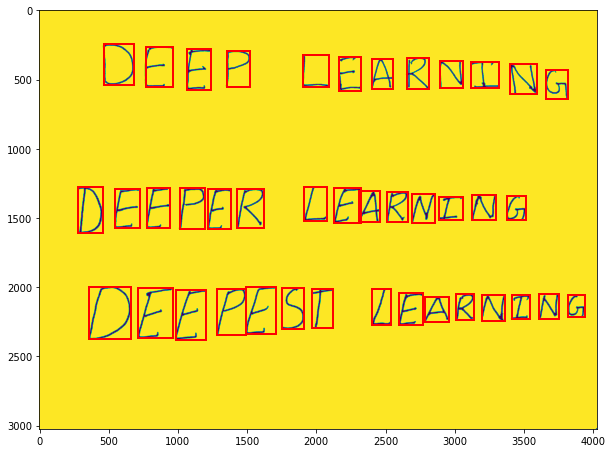

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches
import sklearn.cluster
import skimage.io
import skimage
import os

from ipynb.fs.defs.q4 import *

# do not include any more libraries here!
# no opencv, no sklearn, etc!
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

def get(x):
    return(x[0])

def get2(x):
    return(x[1])

def get3(x):
    return(x[1][1])

img_cropped_images = []

for img in os.listdir('images'):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('images',img)))
    bboxes, bw = findLetters(im1)

    plt.figure(figsize=(10,10))
    plt.imshow(bw)
    for bbox in bboxes:
        minr, minc, maxr, maxc = bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    plt.show()
    # find the rows using..RANSAC, counting, clustering, etc.
    # YOUR CODE HERE
    cluster_model = sklearn.cluster.MeanShift(bandwidth=100)
    y_vals = bboxes[:, 2].reshape((-1, 1))
    cluster_model.fit(y_vals)
    labels = cluster_model.labels_
    centers = sorted([(c, i) for i, c in enumerate(cluster_model.cluster_centers_)], key=get)
    bbox_array = [[] for i in range(len(centers))]
    for i, cluster in enumerate(labels):
        bbox_array[cluster].append(bboxes[i])
    sorted_bbox_array = [bbox_array[i] for c, i in centers]
    sorted_bbox_array = [sorted(array, key=get2) for array in sorted_bbox_array]
    
    # crop the bounding boxes
    # note.. before you flatten, transpose the image (that's how the dataset is!)
    # consider doing a square crop, and even using np.pad() to get your images looking more like the dataset
    # YOUR CODE HERE
    cropped_images = []
    for row in sorted_bbox_array:
        cropped_images.append([])
        for i, bbox in enumerate(row):
            dy = (bbox[2] - bbox[0]) // 2
            dx = (bbox[3] - bbox[1]) // 2
            center_y = bbox[0] + dy
            center_x = bbox[1] + dx
            max_d = max(dy, dx)
            if i == 0:
                square_crop = bw[center_y - max_d:center_y + max_d, center_x - max_d:min(center_x + max_d, row[i+1][1])]
            elif i == len(row) - 1:
                square_crop = bw[center_y - max_d:center_y + max_d, max(center_x - max_d, row[i-1][3]):center_x + max_d]
            else:
                square_crop = bw[center_y - max_d:center_y + max_d, max(center_x - max_d, row[i-1][3]):min(center_x + max_d, row[i+1][1])]
            padded_image = np.pad(square_crop, pad_width=max_d // 4, constant_values=1)
            # plt.imshow(square_crop)
            # plt.show()
            resized_image = skimage.transform.resize(padded_image * 1.0, (28, 28))
            # plt.imshow(resized_image)
            # plt.show()
            cropped_images[-1].append(resized_image)
            
    img_cropped_images.append(cropped_images)

Result: H


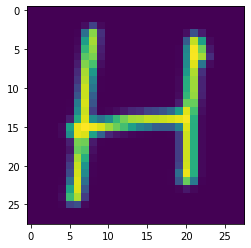

Result: H


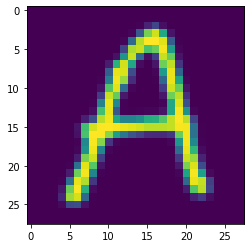

Result: I


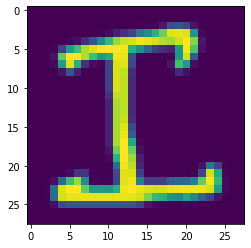

Result: K


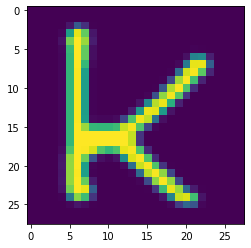

Result: U


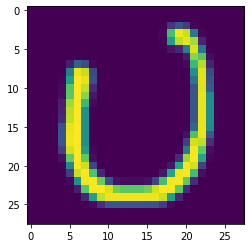

Result: R


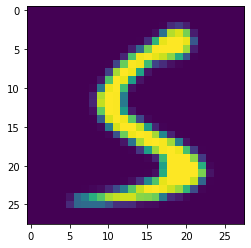

Result: H


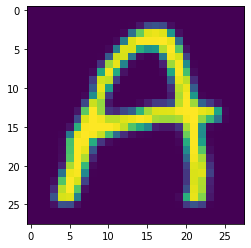

Result: K


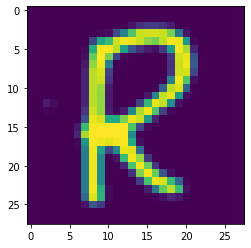

Result: B


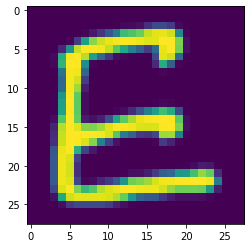

Result: G


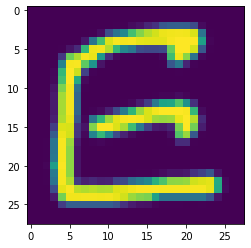

Result: A


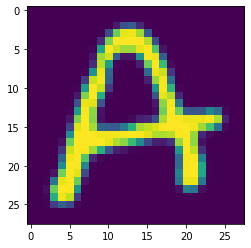

Result: S


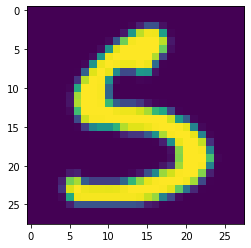

Result: r


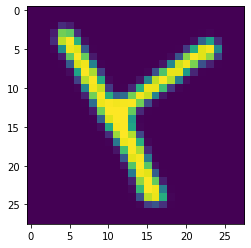

Result: W


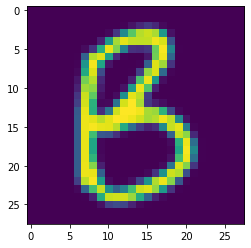

Result: U


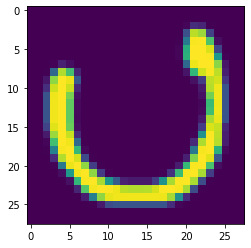

Result: T


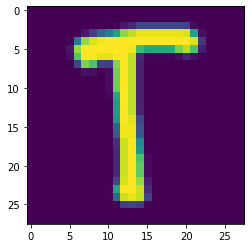

Result: S


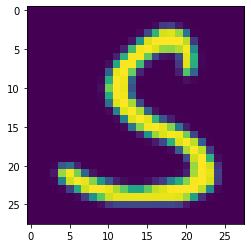

Result: O


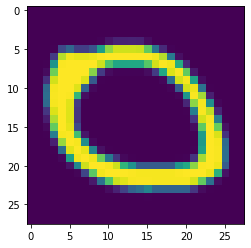

Result: M


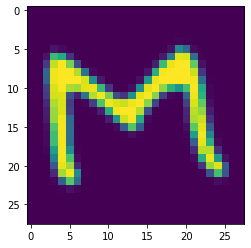

Result: E


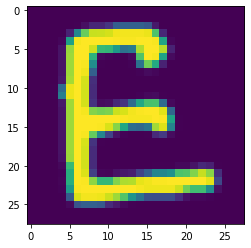

Result: T


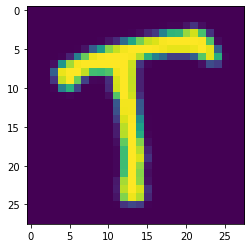

Result: I


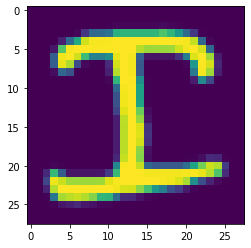

Result: M


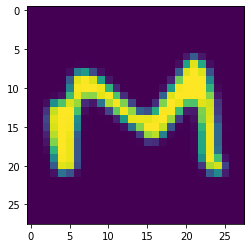

Result: E


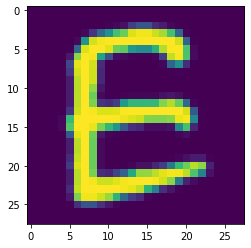

Result: S


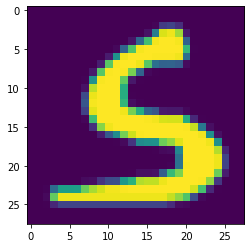

Result: T


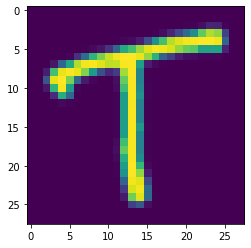

Result: K


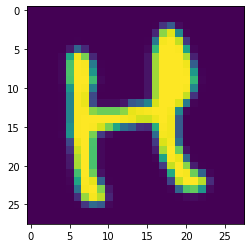

Result: E


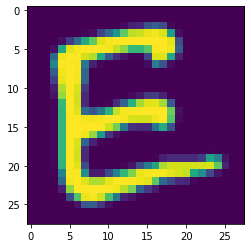

Result: Y


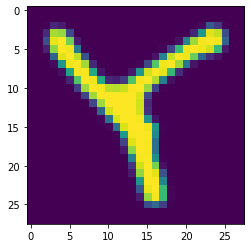

Result: D


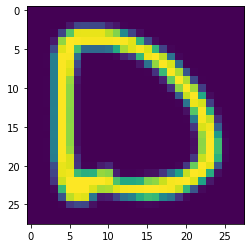

Result: 0


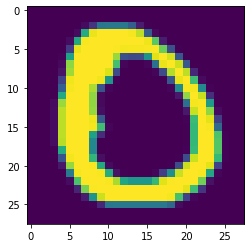

Result: N


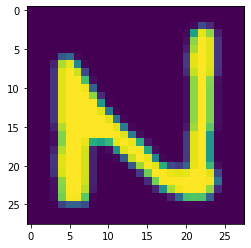

Result: T


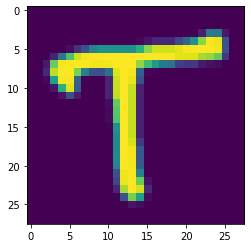

Result: M


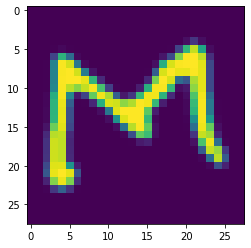

Result: A


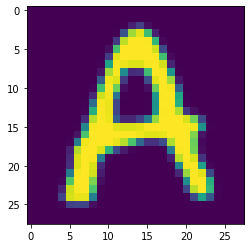

Result: K


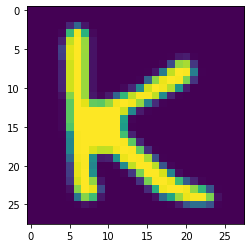

Result: G


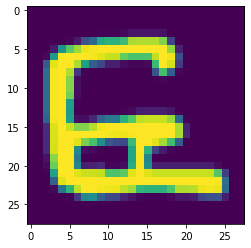

Result: S


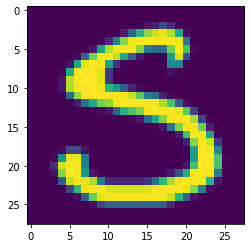

Result: E


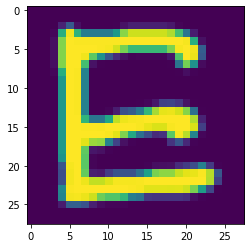

Result: N


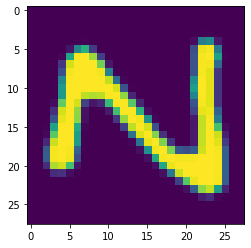

Result: G


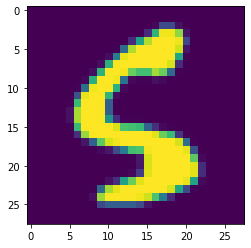

Result: E


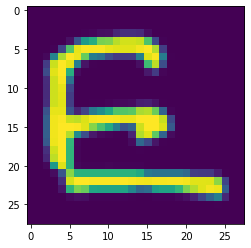

Result: K


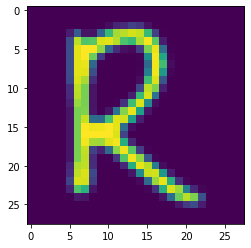

Result: t


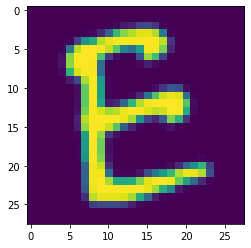

Result: F


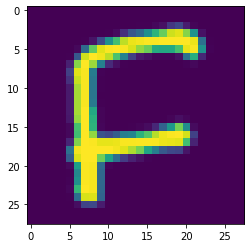

Result: e


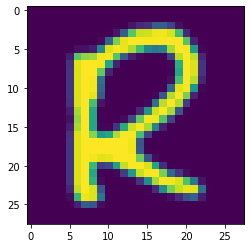

Result: I


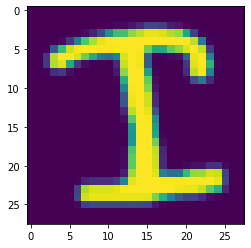

Result: G


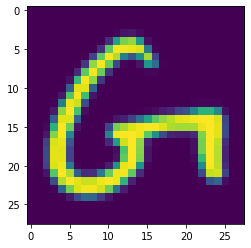

Result: E


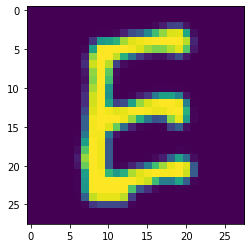

Result: R


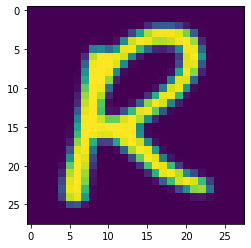

Result: A


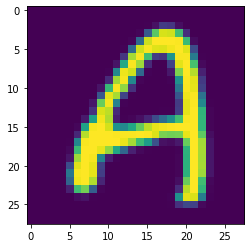

Result: T


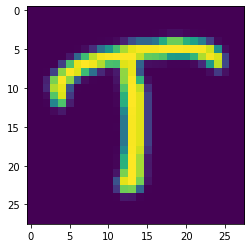

Result: O


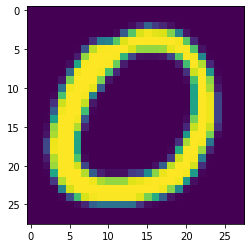

Result: K


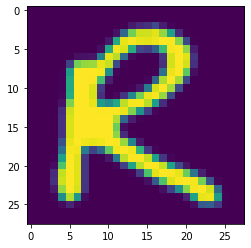

Result: P


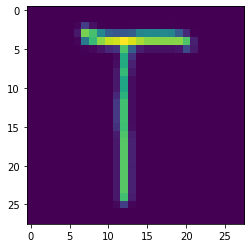

Result: O


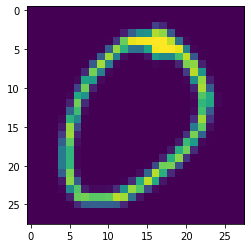

Result: n


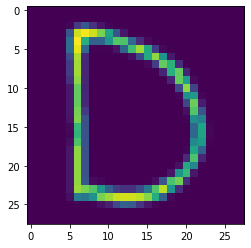

Result: n


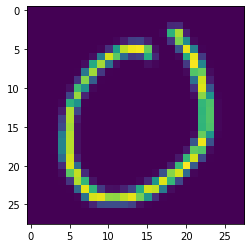

Result: r


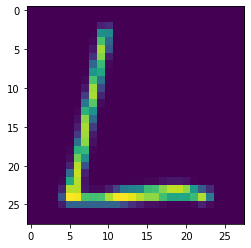

Result: R


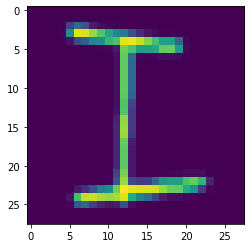

Result: 8


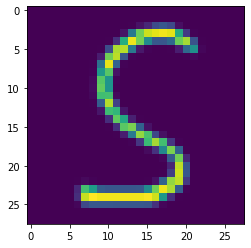

Result: F


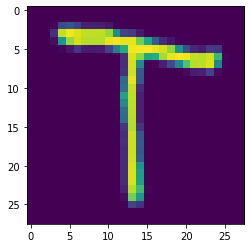

Result: L


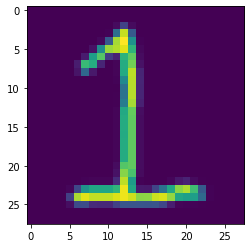

Result: M


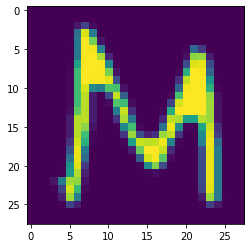

Result: A


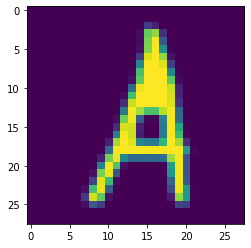

Result: K


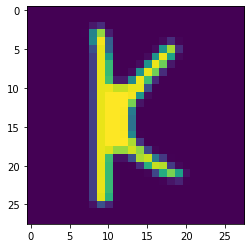

Result: K


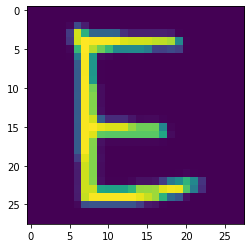

Result: A


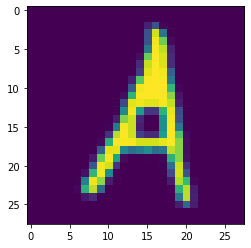

Result: T


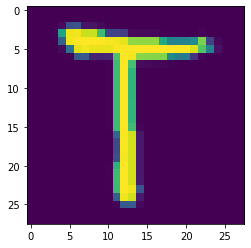

Result: U


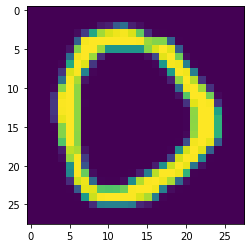

Result: W


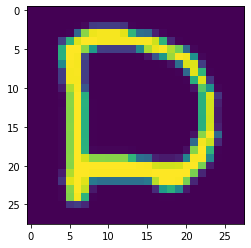

Result: U


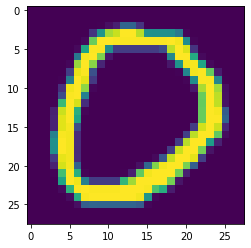

Result: U


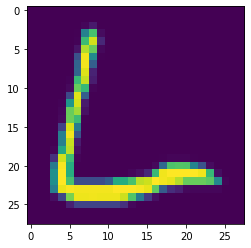

Result: I


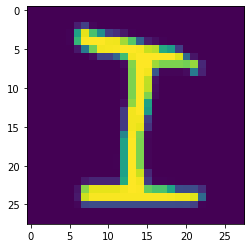

Result: S


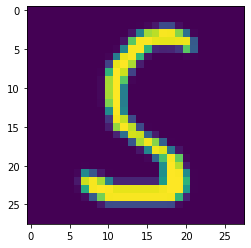

Result: r


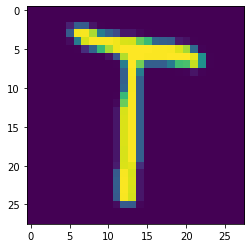

Result: a


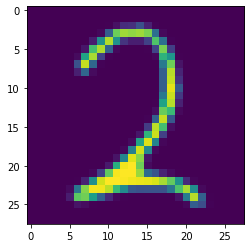

Result: W


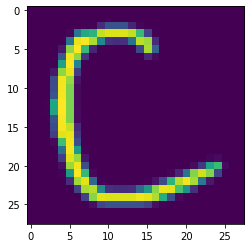

Result: H


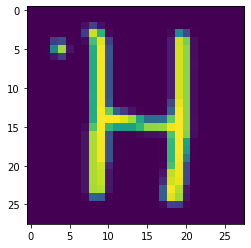

Result: F


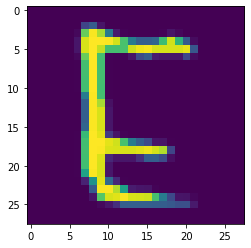

Result: r


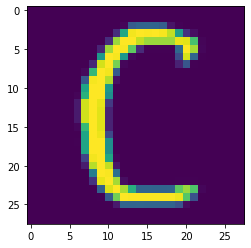

Result: r


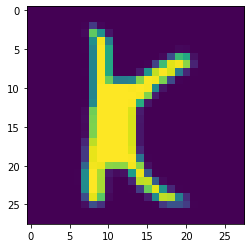

Result: U


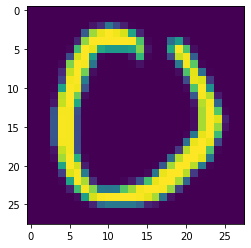

Result: F


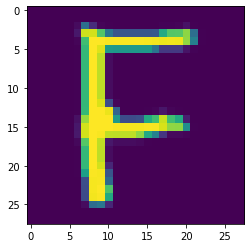

Result: F


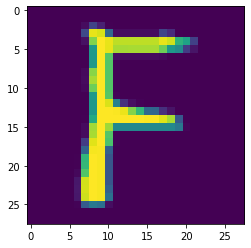

Result: L


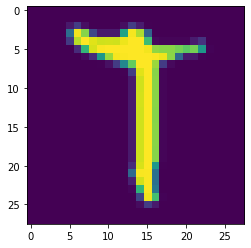

Result: H


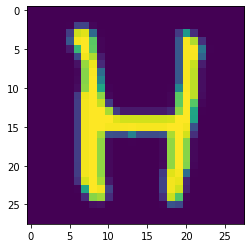

Result: E


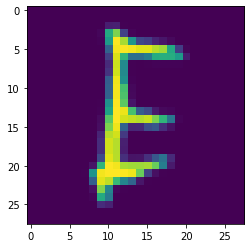

Result: F


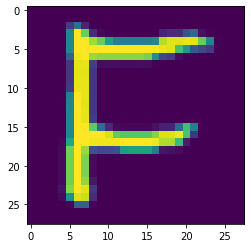

Result: T


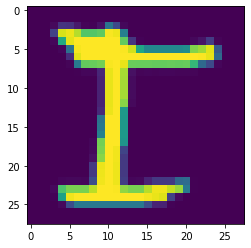

Result: K


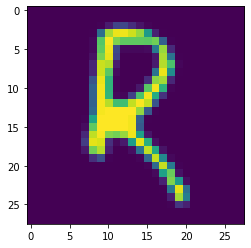

Result: 8


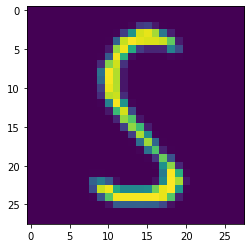

Result: T


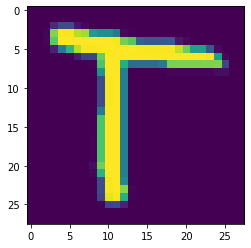

Result: I


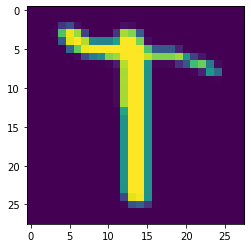

Result: H


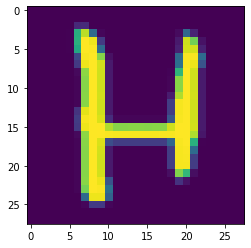

Result: r


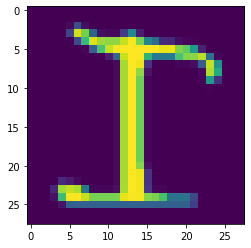

Result: N


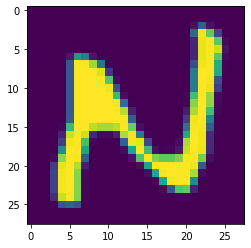

Result: G


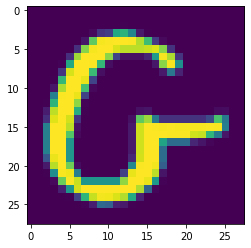

Result: n


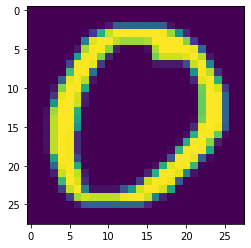

Result: N


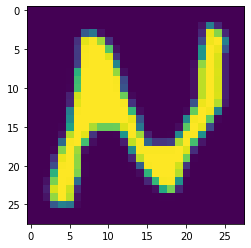

Result: T


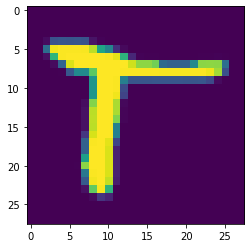

Result: n


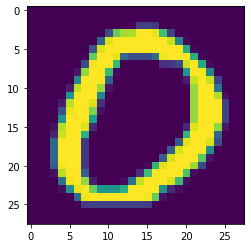

Result: D


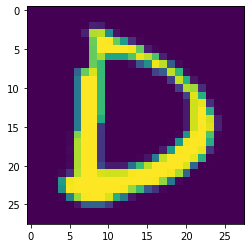

Result: O


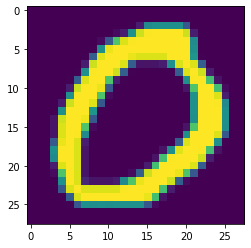

Result: r


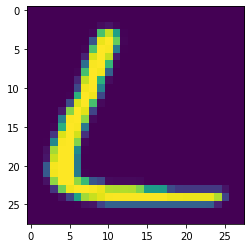

Result: I


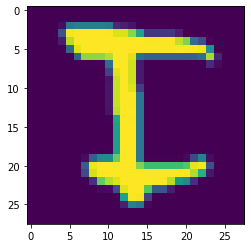

Result: 8


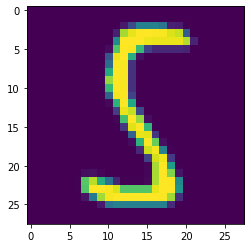

Result: T


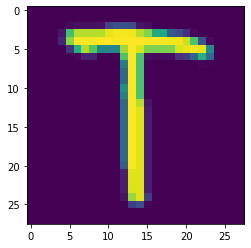

Result: B


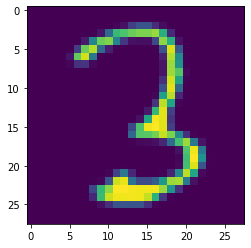

Result: K


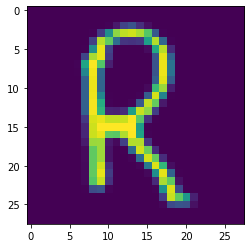

Result: A


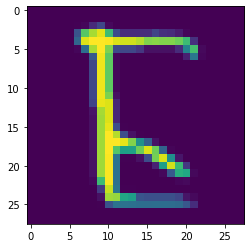

Result: A


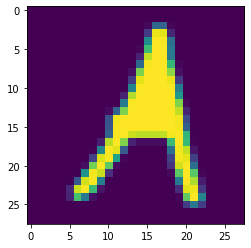

Result: r


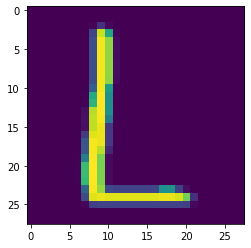

Result: r


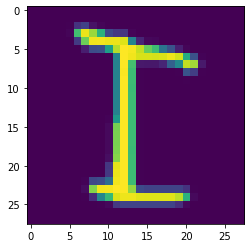

Result: 7


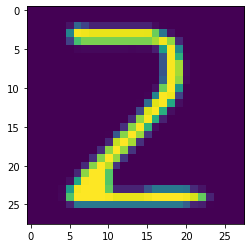

Result: F


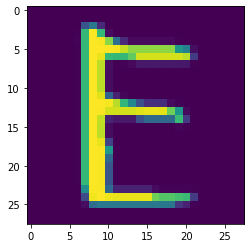

Result: Y


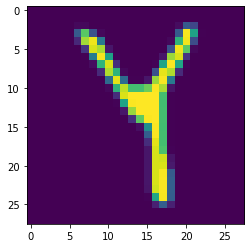

Result: O


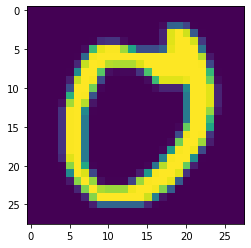

Result: U


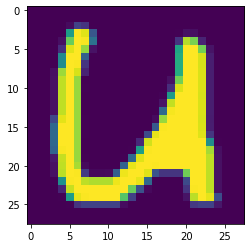

Result: H


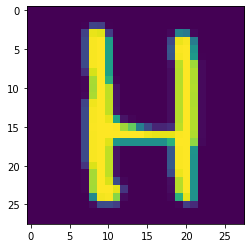

Result: M


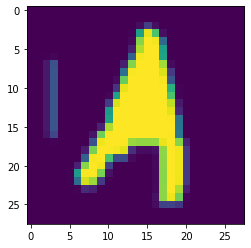

Result: U


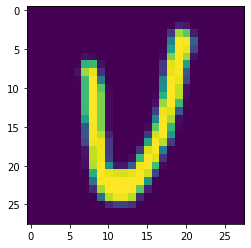

Result: F


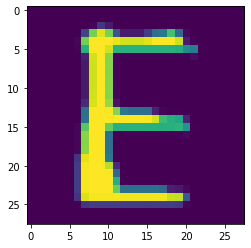

Result: A


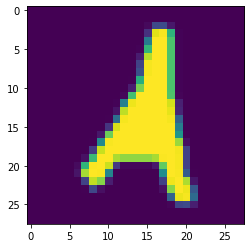

Result: L


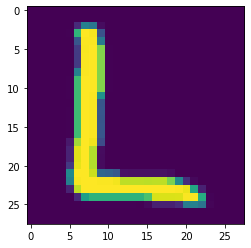

Result: K


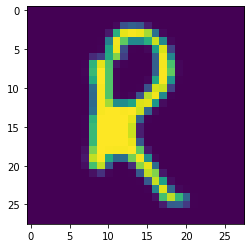

Result: E


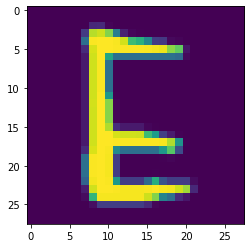

Result: A


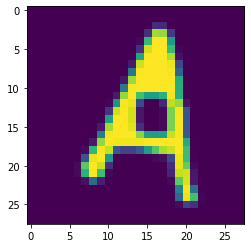

Result: D


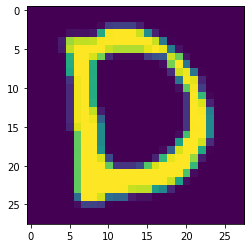

Result: Y


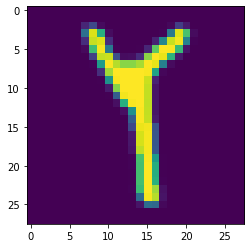

Result: N


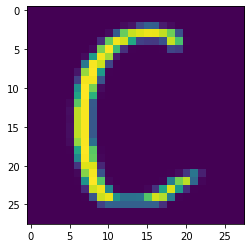

Result: n


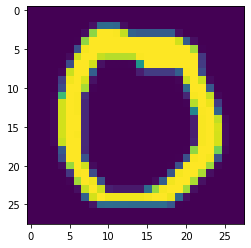

Result: M


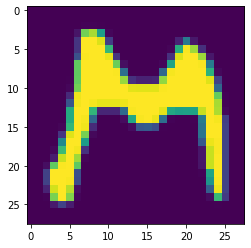

Result: P


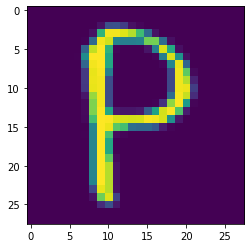

Result: n


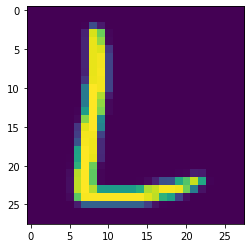

Result: F


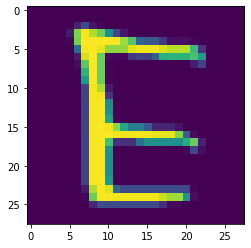

Result: T


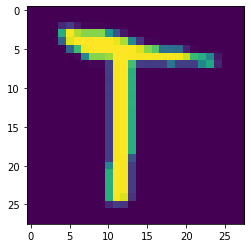

Result: C


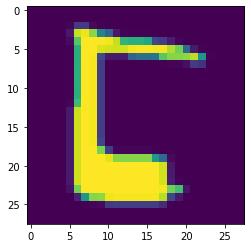

Result: D


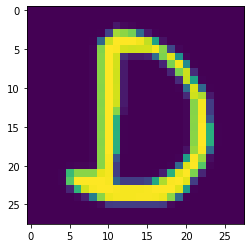

Result: 2


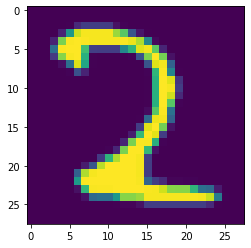

Result: L


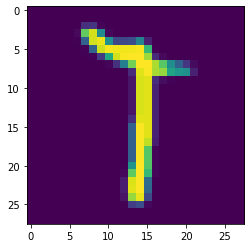

Result: H


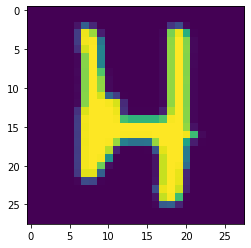

Result: I


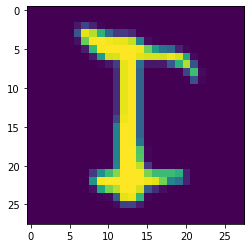

Result: N


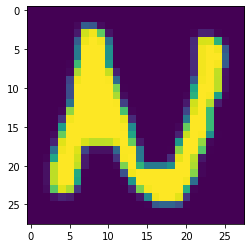

Result: G


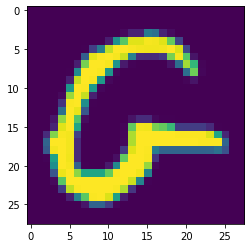

Result: I


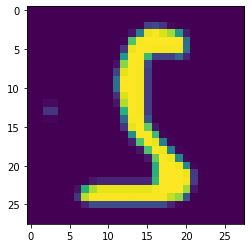

Result: 4


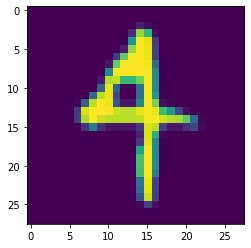

Result: K


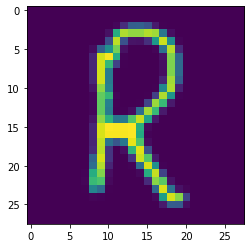

Result: f


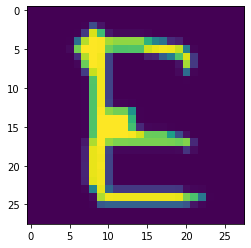

Result: W


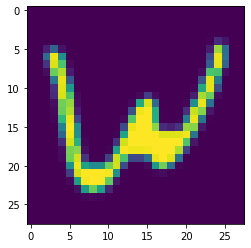

Result: A


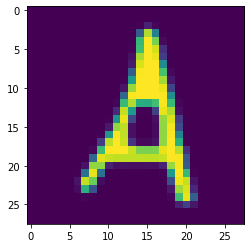

Result: K


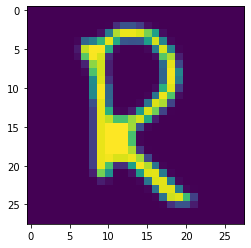

Result: n


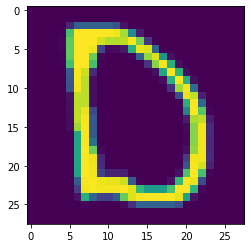

Result: Y


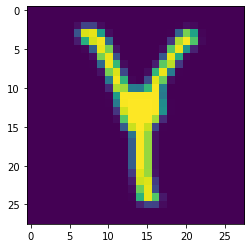

Result: 0


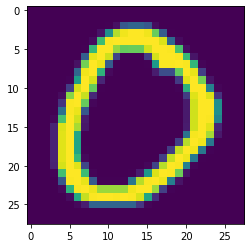

Result: U


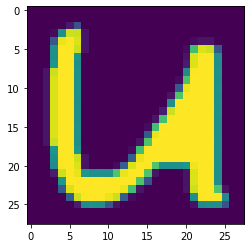

Result: K


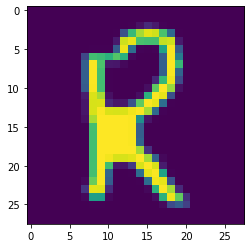

Result: R


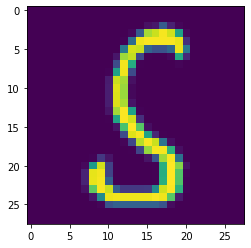

Result: F


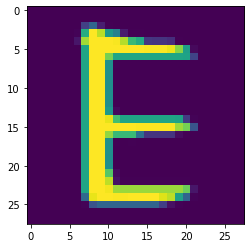

Result: N


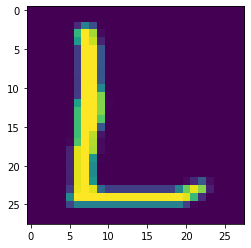

Result: A


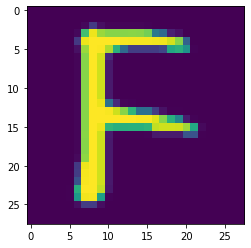

Result: W


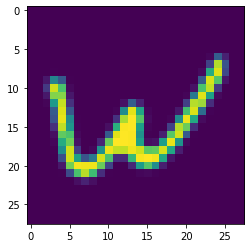

Result: P


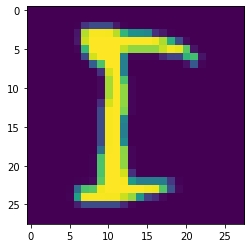

Result: T


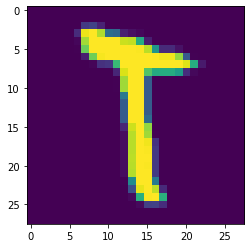

Result: H


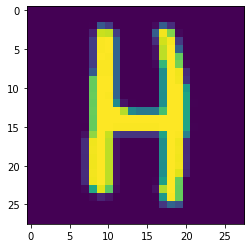

Result: A


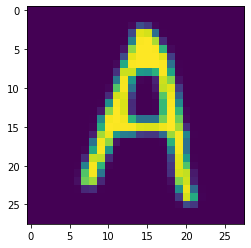

Result: N


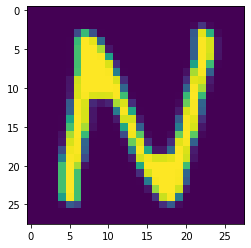

Result: A


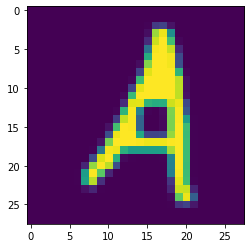

Result: P


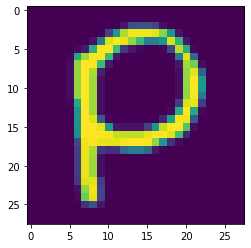

Result: A


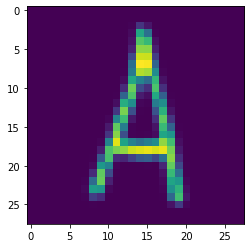

Result: B


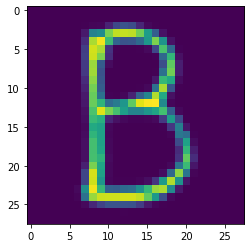

Result: L


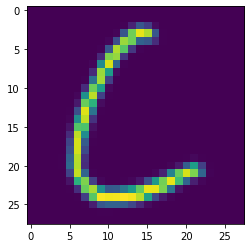

Result: n


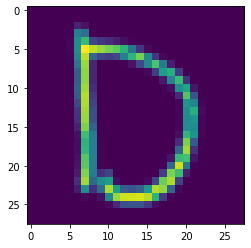

Result: B


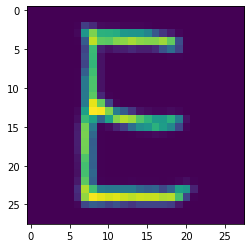

Result: F


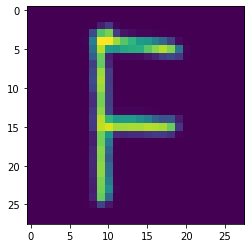

Result: G


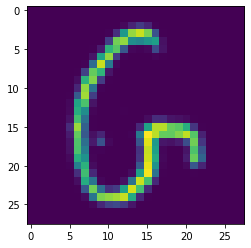

Result: H


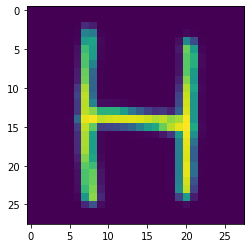

Result: I


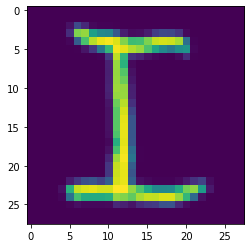

Result: T


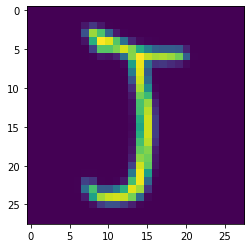

Result: K


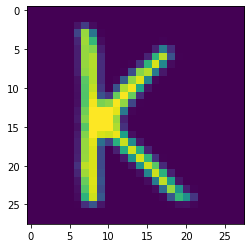

Result: U


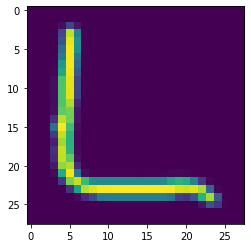

Result: M


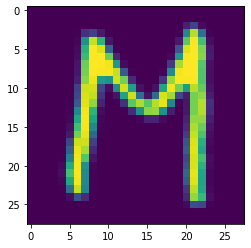

Result: N


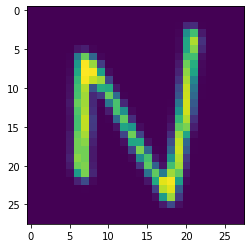

Result: U


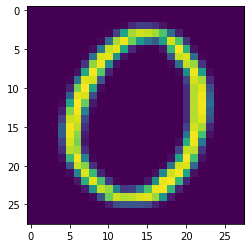

Result: P


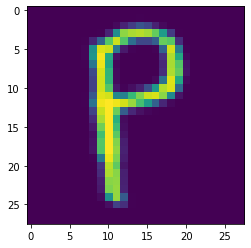

Result: Q


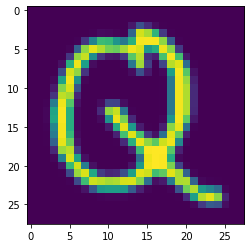

Result: K


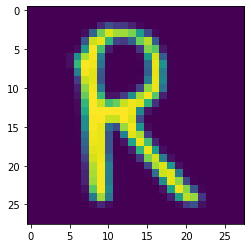

Result: g


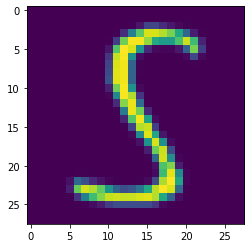

Result: T


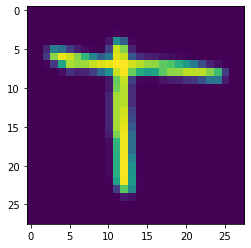

Result: M


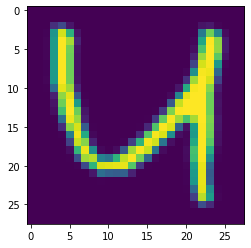

Result: V


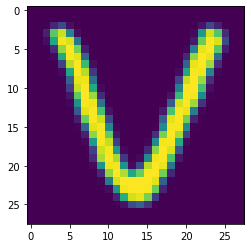

Result: W


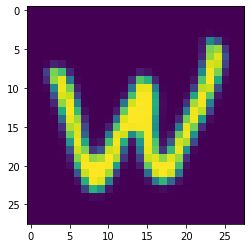

Result: X


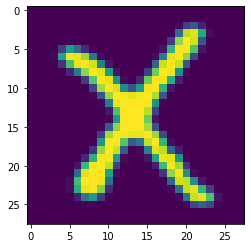

Result: Y


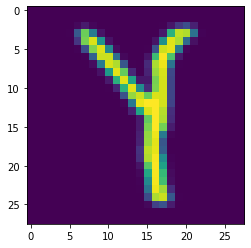

Result: Z


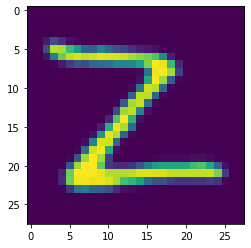

Result: 1


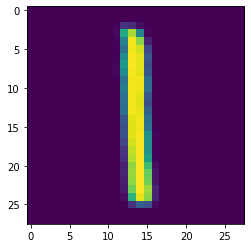

Result: 2


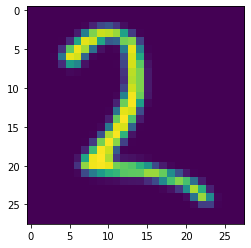

Result: 3


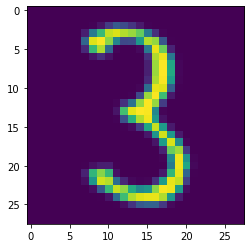

Result: a


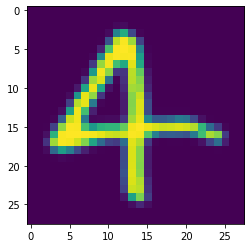

Result: g


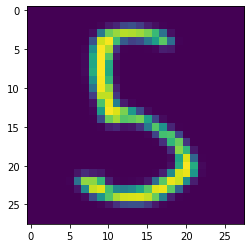

Result: h


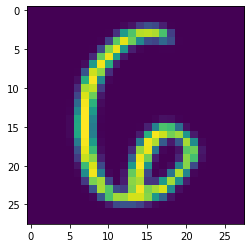

Result: 7


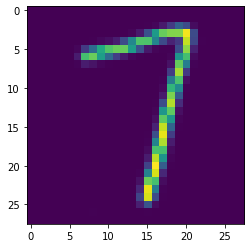

Result: X


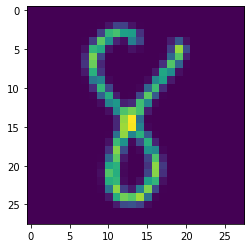

Result: 9


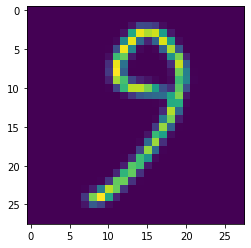

Result: D


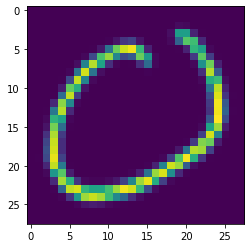

Result: U


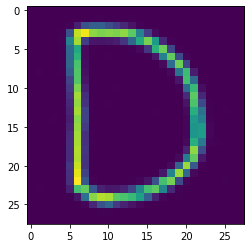

Result: H


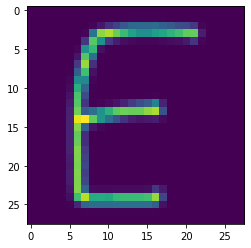

Result: H


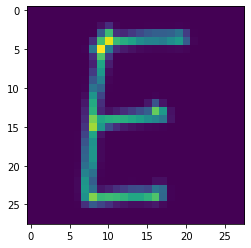

Result: P


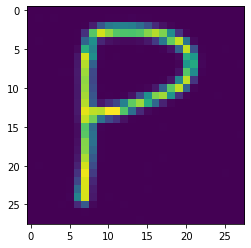

Result: W


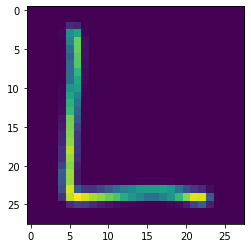

Result: H


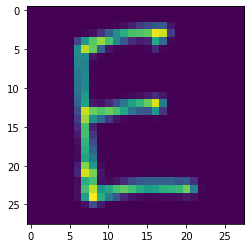

Result: a


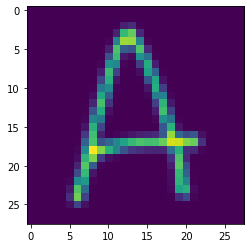

Result: K


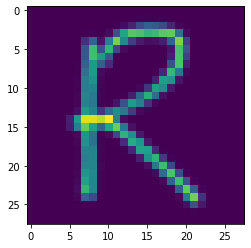

Result: N


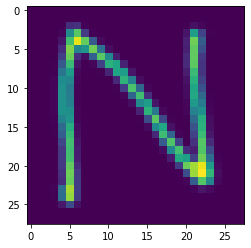

Result: I


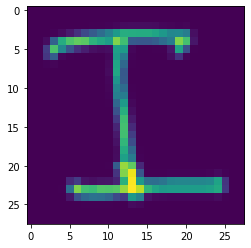

Result: N


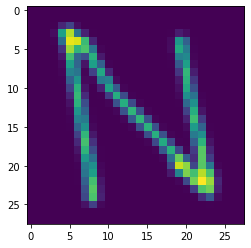

Result: 6


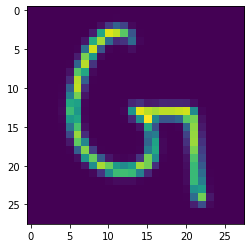

Result: n


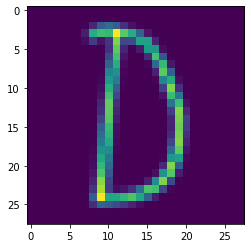

Result: H


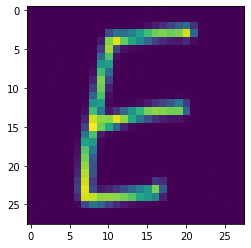

Result: 4


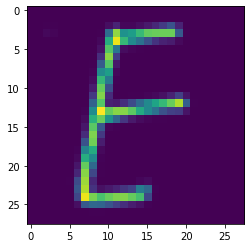

Result: P


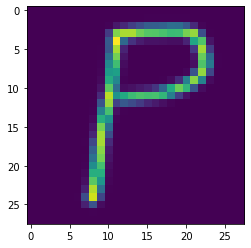

Result: H


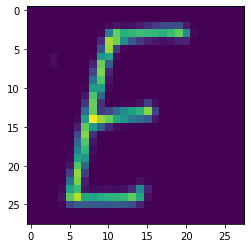

Result: K


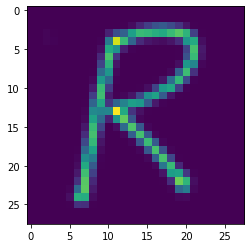

Result: r


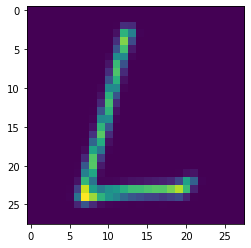

Result: E


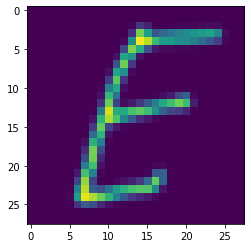

Result: 4


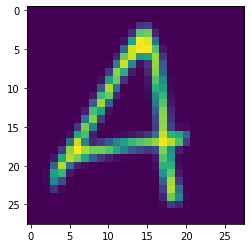

Result: K


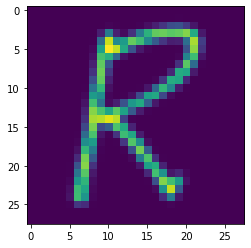

Result: N


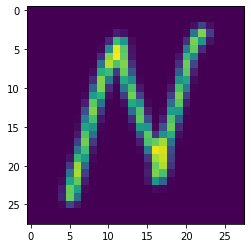

Result: L


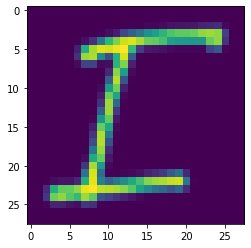

Result: N


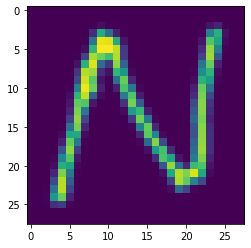

Result: G


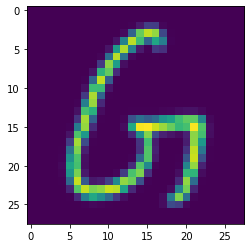

Result: D


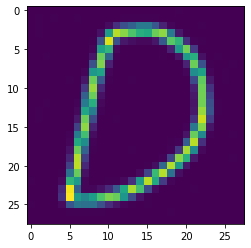

Result: H


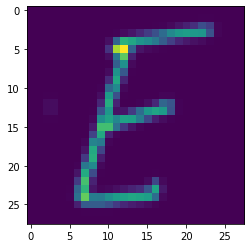

Result: H


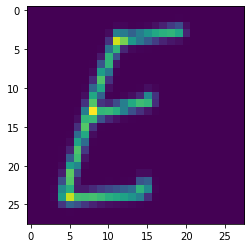

Result: W


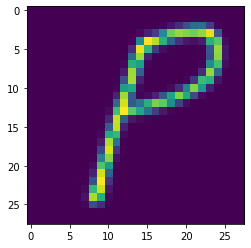

Result: H


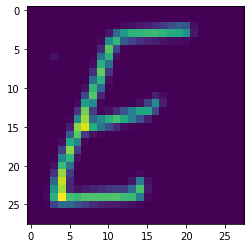

Result: g


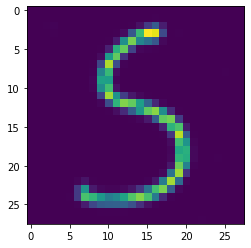

Result: H


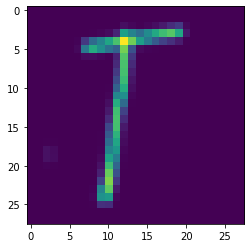

Result: L


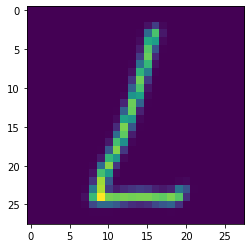

Result: f


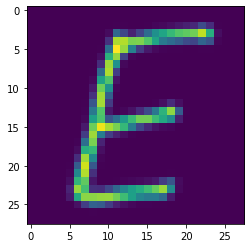

Result: A


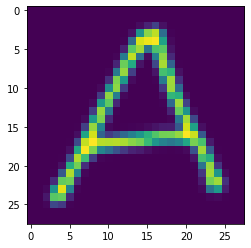

Result: K


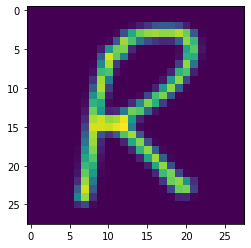

Result: N


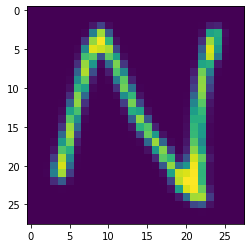

Result: L


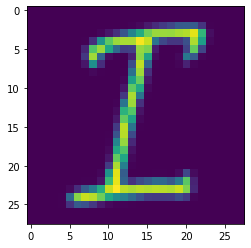

Result: N


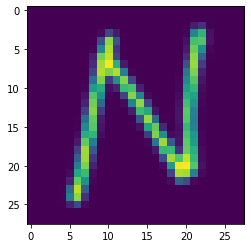

Result: G


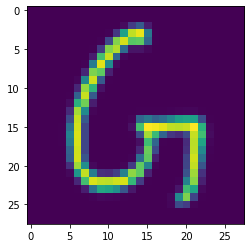

In [28]:
train_mean = np.mean(trainset_loader.dataset.data.numpy(), axis=0)
train_std = np.std(testset_loader.dataset.data.numpy(), axis=0)
#print(train_mean, train_std)

model = emnist_model2

for k, cropped_images in enumerate(img_cropped_images):    
    all_images = -1 * np.array(np.concatenate(cropped_images))
    all_images += np.random.normal(loc=0.0, scale=0.0005, size=all_images.shape)
    
    batch_mean = np.mean(all_images, axis=0)
    batch_std = np.std(all_images, axis=0)
    
    for row in cropped_images:
        for image in row:
            image = image * -1
            image += np.random.normal(loc=0.0, scale=0.0005, size=image.shape)
            normalized_image = (image - batch_mean) / batch_std * train_std + train_mean

            torch_image = torch.tensor(normalized_image).reshape((1, 1, 28, 28))

            with torch.no_grad():
                output = model.forward(torch_image.to(torch.float))
                output = label_map[np.argmax(output)]
                print("Result: {}".format(output))
                plt.imshow(normalized_image)
                plt.imshow(image)
                plt.show()

#### Q7.2.1 (10 points WriteUp)

Datasets Formed
Dataloaders Formed


Using cache found in /home/thomaswei/.cache/torch/hub/pytorch_vision_v0.10.0


0 5.5561391657049 0.041176470588235294
0 5.605306386947632 0.026470588235294117
5 5.174752625552091 0.08970588235294118
5 5.2085957527160645 0.1
10 4.568421840667725 0.07205882352941176
10 4.703663984934489 0.08529411764705883
15 3.805570537393743 0.14411764705882352
15 3.9921968380610147 0.1323529411764706
20 3.2261153784665195 0.17941176470588235
20 3.2465304931004844 0.1588235294117647
25 2.731849020177668 0.24558823529411763
25 3.0020699501037598 0.2323529411764706
30 2.534144314852628 0.27941176470588236
30 2.5867573817571006 0.22647058823529412
35 2.1322728395462036 0.31470588235294117
35 2.3079726298650107 0.27941176470588236
40 2.04914729161696 0.3926470588235294
40 2.214839975039164 0.3264705882352941
45 1.6352475448088213 0.5044117647058823
45 1.8033711711565654 0.4235294117647059
50 1.6077086492018267 0.4764705882352941
50 1.75285404920578 0.40588235294117647
55 1.4326889623295178 0.5617647058823529
55 1.6208596229553223 0.47352941176470587
60 1.211347688328136 0.68529411764

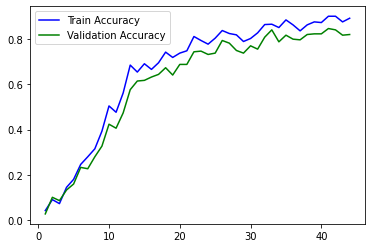

<Figure size 432x288 with 0 Axes>

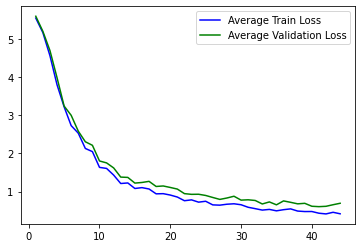

In [23]:
# Code for fine-tune squeezenet1_1
# YOUR CODE HERE

from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

pretrained_model = torch.hub.load('pytorch/vision:v0.10.0', 'squeezenet1_1', pretrained=True)

max_iter = 20
learning_rate = 0.0005
classifier = torch.nn.Sequential(torch.nn.Linear(1000, 17))
optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

train_dataset = torchvision.datasets.ImageFolder(root='data/oxford-flowers17/train', transform=preprocess)
test_dataset = torchvision.datasets.ImageFolder(root='data/oxford-flowers17/test', transform=preprocess)
print("Datasets Formed")

trainset_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=1)
eval_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=1)
testset_loader = DataLoader(test_dataset, batch_size=64, shuffle=True, num_workers=1)
print("Dataloaders Formed")

valid_loss = []
valid_acc = []
train_loss = []
train_acc = []

i = 0
for itr in range(max_iter):
    for train_features, train_labels in iter(trainset_loader):
        with torch.no_grad():
            features = pretrained_model.forward(train_features)
        probs = classifier.forward(features)
        pt_loss = loss_function(probs, train_labels)
        #print(np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), train_labels.numpy())) / train_features.size()[0])
        optimizer.zero_grad()
        pt_loss.backward()
        optimizer.step()
        if i % 5 == 0:
            total_loss = 0
            total_correct = 0
            total = 0
            n = 0
            for eval_features, eval_labels in iter(eval_loader):
                with torch.no_grad():
                    features = pretrained_model.forward(eval_features)
                    probs = classifier.forward(features)
                    pt_loss = loss_function(probs, eval_labels)
                    total_correct += np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), eval_labels.numpy()))
                    total_loss += pt_loss.item()
                    total += eval_features.size()[0]
                    n += 1

            avg_loss = total_loss / n
            acc = total_correct / total
            train_loss.append(avg_loss)
            train_acc.append(acc)
            print(i, avg_loss, acc)
            
            total_loss = 0
            total_correct = 0
            total = 0
            n = 0
            for eval_features, eval_labels in iter(testset_loader):
                with torch.no_grad():
                    features = pretrained_model.forward(eval_features)
                    probs = classifier.forward(features)
                    pt_loss = loss_function(probs, eval_labels)
                    total_correct += np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), eval_labels.numpy()))
                    total_loss += pt_loss.item()
                    total += eval_labels.size()[0]
                    n += 1
            avg_loss = total_loss / n
            acc = total_correct / total
            valid_loss.append(avg_loss)
            valid_acc.append(acc)
            print(i, avg_loss, acc)
        i += 1

epochs = [i + 1 for i in range(len(train_acc))]
plt.figure()
plt.plot(epochs, train_acc, label="Train Accuracy", c='b')
plt.plot(epochs, valid_acc, label="Validation Accuracy", c='g')
plt.legend()
plt.show()
plt.clf()
plt.figure()
plt.plot(epochs, train_loss, label="Average Train Loss", c='b')
plt.plot(epochs, valid_loss, label="Average Validation Loss", c='g')
plt.legend()
plt.show()

0 2.889888503334739 0.058823529411764705
0 2.892459432284037 0.058823529411764705
5 2.7838771126487036 0.175
5 2.7900267442067466 0.18823529411764706
10 2.718936421654441 0.2647058823529412
10 2.740229288736979 0.20294117647058824
15 2.652000839060003 0.2485294117647059
15 2.680067539215088 0.19117647058823528
20 2.592794981869784 0.2735294117647059
20 2.6413822571436563 0.19411764705882353
25 2.5457752401178535 0.23676470588235293
25 2.6114209493001304 0.18235294117647058
30 2.494922724637118 0.2514705882352941
30 2.586049238840739 0.19411764705882353
35 2.4468229683962734 0.2926470588235294
35 2.5770876010258994 0.22058823529411764
40 2.4032724553888496 0.33676470588235297
40 2.5106104214986167 0.22941176470588234
45 2.355076724832708 0.3220588235294118
45 2.478120525677999 0.22647058823529412
50 2.3172151175412266 0.3558823529411765
50 2.471701463063558 0.24705882352941178
55 2.2748408751054243 0.40441176470588236
55 2.4286230405171714 0.2529411764705882
60 2.2358574000271885 0.4264

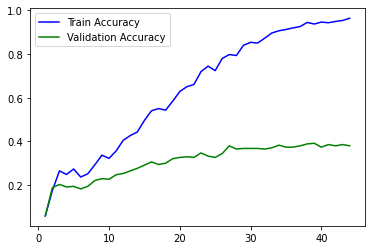

<Figure size 432x288 with 0 Axes>

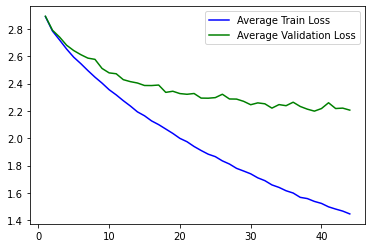

In [24]:
# Code for fine-tune the network you designed
# YOUR CODE HERE

model = torch.nn.Sequential(torch.nn.Conv2d(3, 6, 5, stride=1), torch.nn.ReLU(), 
                            torch.nn.MaxPool2d(2), torch.nn.Conv2d(6, 16, 5, stride=1), 
                            torch.nn.ReLU(), torch.nn.MaxPool2d(2), torch.nn.Flatten(), 
                            torch.nn.Linear(44944, 64), torch.nn.Sigmoid(), torch.nn.Linear(64, 17))

max_iter = 20
learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

valid_loss = []
valid_acc = []
train_loss = []
train_acc = []

i = 0
for itr in range(max_iter):
    for train_features, train_labels in iter(trainset_loader):
        probs = model.forward(train_features)
        pt_loss = loss_function(probs, train_labels)
        #print(np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), train_labels.numpy())) / train_features.size()[0])
        optimizer.zero_grad()
        pt_loss.backward()
        optimizer.step()
        if i % 5 == 0:
            total_loss = 0
            total_correct = 0
            total = 0
            n = 0
            for eval_features, eval_labels in iter(eval_loader):
                with torch.no_grad():
                    probs = model.forward(eval_features)
                    pt_loss = loss_function(probs, eval_labels)
                    total_correct += np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), eval_labels.numpy()))
                    total_loss += pt_loss.item()
                    total += eval_features.size()[0]
                    n += 1

            avg_loss = total_loss / n
            acc = total_correct / total
            train_loss.append(avg_loss)
            train_acc.append(acc)
            print(i, avg_loss, acc)
            
            total_loss = 0
            total_correct = 0
            total = 0
            n = 0
            for eval_features, eval_labels in iter(testset_loader):
                with torch.no_grad():
                    probs = model.forward(eval_features)
                    pt_loss = loss_function(probs, eval_labels)
                    total_correct += np.sum(np.equal(np.argmax(probs.detach().numpy(), axis=1), eval_labels.numpy()))
                    total_loss += pt_loss.item()
                    total += eval_labels.size()[0]
                    n += 1
            avg_loss = total_loss / n
            acc = total_correct / total
            valid_loss.append(avg_loss)
            valid_acc.append(acc)
            print(i, avg_loss, acc)
        i += 1

epochs = [i + 1 for i in range(len(train_acc))]
plt.figure()
plt.plot(epochs, train_acc, label="Train Accuracy", c='b')
plt.plot(epochs, valid_acc, label="Validation Accuracy", c='g')
plt.legend()
plt.show()
plt.clf()
plt.figure()
plt.plot(epochs, train_loss, label="Average Train Loss", c='b')
plt.plot(epochs, valid_loss, label="Average Validation Loss", c='g')
plt.legend()
plt.show()

When training from scratch, the training accuracy reaches close to 100%; however, the validation accuracy caps out at about 40%. However, when we see that when fine-tuning a pretrained squeezenet, the validation accuracy remains close to the training accuracy for far longer and reaches 80%+ at the end of the training.

## Appendix: Neural Network Overview
Deep learning has quickly become one of the most applied machine learning techniques in computer vision. Convolutional neural networks have been applied to many different computer vision problems such as image classification, recognition, and segmentation with great success. In this assignment, you will first implement a fully connected feed forward neural network for hand written character classification. Then in the second part, you will implement a system to locate characters in an image, which you can then classify with your deep network. The end result will be a system that, given an image of hand written text, will output the text contained in the image.

### Basic Use
Here we will give a brief overview of the math for a single hidden layer feed forward network. For a more detailed look at the math and derivation, please see the class slides.

A fully-connected network $\textbf{f}$, for classification, applies a series of linear and non-linear functions to an input data vector $\textbf{x}$ of size $N\times 1$ to produce an output vector $\textbf{f}(\textbf{x})$ of size $C\times 1$, where each element $i$ of the output vector represents the probability of $\textbf{x}$ belonging to the class $i$. Since the data samples are of dimensionality $N$, this means the input layer has $N$ input units. To compute the value of the output units, we must first compute the values of all the hidden layers. The first hidden layer *pre-activation* $\textbf{a}^{(1)}(\textbf{x})$ is given by

$$\textbf{a}^{(1)}(\textbf{x}) = \textbf{W}^{(1)}\textbf{x} + \textbf{b}^{(1)}$$

Then the *post-activation* values of the first hidden layer $\textbf{h}^{(1)}(\textbf{x})$ are computed by applying a non-linear activation function $\textbf{g}$ to the *pre-activation* values

$$\textbf{h}^{(1)}(\textbf{x}) = \textbf{g}(\textbf{a}^{(1)}(\textbf{x})) = \textbf{g}(\textbf{W}^{(1)}\textbf{x} + \textbf{b}^{(1)})$$

Subsequent hidden layer ($1 < t \leq T$) pre- and post activations are given by:

$$\textbf{a}^{(t)}(\textbf{x}) = \textbf{W}^{(t)}\textbf{h}^{(t-1)} + \textbf{b}^{(t)}$$

$$\textbf{h}^{(t)}(\textbf{x}) = \textbf{g}(\textbf{a}^{(t)}(\textbf{x}))$$

The output layer *pre-activations* $\textbf{a}^{(T)}(\textbf{x})$ are computed in a similar way

$$\textbf{a}^{(T)}(\textbf{x}) = \textbf{W}^{(T)}\textbf{h}^{(T-1)}(\textbf{x}) + \textbf{b}^{(T)}$$

and finally the \emph{post-activation} values of the output layer are computed with
$$\textbf{f}(\textbf{x}) = \textbf{o}(\textbf{a}^{(T)}(\textbf{x})) = \textbf{o}(\textbf{W}^{(T)}\textbf{h}^{(T-1)}(\textbf{x}) + \textbf{b}^{(T)})$$

where $\textbf{o}$ is the output activation function. Please note the difference between $\textbf{g}$ and $\textbf{o}$! 
For this assignment, we will be using the sigmoid activation function for the hidden layer, so:
$$\textbf{g}(y) = \frac{1}{1+\exp(-y)}$$
where when $\textbf{g}$ is applied to a vector, it is applied element wise across the vector.

Since we are using this deep network for classification, a common output activation function to use is the softmax function. This will allow us to turn the real value, possibly negative values of $\textbf{a}^{(T)}(\textbf{x})$ into a set of probabilities (vector of positive numbers that sum to 1). Letting $\textbf{x}_i$ denote the $i^{th}$ element of the vector $\textbf{x}$, the softmax function is defined as:
$$\textbf{o}_i(\textbf{y}) = \frac{\exp(\textbf{y}_i)}{\sum_j \exp(\textbf{y}_j)}$$

![](figures/letter_montage.jpg)
<center>Samples from NIST Special 19  dataset</center>


Gradient descent is an iterative optimisation algorithm, used to find the local optima. To find the local minima, we start at a point on the function and move in the direction of negative gradient (steepest descent) till some stopping criteria is met.

### Backprop
The update equation for a general weight $W^{(t)}_{ij}$ and bias $b^{(t)}_i$ is
$$
W^{(t)}_{ij} = W^{(t)}_{ij} - \alpha*\frac{\partial L_{\textbf{f}}}{\partial W^{(t)}_{ij}}(\textbf{x})\hspace{1cm}
b^{(t)}_{i} = b^{(t)}_{i} - \alpha*\frac{\partial L_{\textbf{f}}}{\partial b^{(t)}_{i}}(\textbf{x})
$$
$\alpha$ is the learning rate. Please refer to the back-propagation slides for more details on how to derive the gradients. Note that here we are using softmax loss (which is different from the least square loss in the slides).

## References

[1]  Xavier Glorot and Yoshua Bengio. Understanding the difficulty of training deep feedforward neural networks. 2010. http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf.

[2]  P. J. Grother. Nist special database 19 – handprinted forms and characters database. https://www.nist.gov/srd/nist-special-database-19, 1995.